<a href="https://colab.research.google.com/github/anderson02aa/IME-Ciencia_de_Dados-junho_2025/blob/main/%5BSbSeg%5D_Trabalho_CD_IME_2025_01_versao_20250607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><center><b>** Instituição IME **</b></center></H1>
<p>
* Disciplina: Ciência de dados<br>
* Nome: Anderson Alves de Albuquerque<br>
* Professor: Ronaldo G.<br>
* Data: semestre 01-2025<br>
</p>

<br>
<p>
Endereço deste projeto no Github: <a href="https://github.com/anderson02aa/IME-Ciencia_de_Dados-junho_2025">https://github.com/anderson02aa/IME-Ciencia_de_Dados-junho_2025</a> (ou <a href=https://abre.ai/andersontrabcd>https://abre.ai/andersontrabcd</a>)

</p>


##<b>Verificar informações da CPU/GPU e memória RAM para saber se está utilizando recursos do Colab Pro+</b>

In [74]:
# Para saber se está usando GPU com PyTorch
import torch
!nvidia-smi
print("Usando GPU?", torch.cuda.is_available())

# Ou com TensorFlow
import tensorflow as tf
print("Dispositivos disponíveis:", tf.config.list_physical_devices())

# Se o resultado da execução da célula de código abaixo for "Not connected to a GPU", mude o ambiente. Acesse Runtime > Change runtime type no menu para ativar um acelerador de GPU, depois execute novamente a célula de código. Ref.: https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=65MSuHKqNeBZ
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# OBS.: Se o resultado da execução da célula de código abaixo for Not using a high-RAM runtime, ative um ambiente com RAM alta. Acesse Runtime > Change runtime type no menu. Depois selecione RAM alta no botão ativar/desativar do menu Características do ambiente de execução. Por fim, execute a célula de código novamente. Ref.: https://colab.research.google.com/notebooks/pro.ipynb#scrollTo=65MSuHKqNeBZ

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')


/bin/bash: line 1: nvidia-smi: command not found
Usando GPU? False
Dispositivos disponíveis: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
/bin/bash: line 1: nvidia-smi: command not found
Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# <b>1. Definições do projeto:</b>


<b>Artigo utilizado neste projeto: </b>
<ul>- <b>Nome do artigo:</b> Detecção de Ataques de Negação de Serviço Distribuídos com Algoritmos de Aprendizado de Máquina.</ul>

<ul>- <b>Ano:</b> 2024;</ul>
<ul>- <b>Evento:</b> SBSeg 2024;</ul>
<ul>- <b>Detalhamento:</b> Artigos Completos - Anais do SBSeg 2024;</ul>

<ul>- <b>Página de apresentação do artigo:</b> "<a href="https://sol.sbc.org.br/index.php/sbseg/article/view/30028">Detecção de Ataques de Negação de Serviço Distribuídos com Algoritmos de Aprendizado de Máquina</a>" </ul>

<ul>
<ul>- Outra forma de acessar o artigo:
<a href="https://sol.sbc.org.br/index.php/sbseg/article/view/30028/29835">clique aqui</a> para acessar o arquivo PDF no site do SBSeg/SBC;</ul>

<ul>- Além disso, existe a possibilidade de <a href="https://drive.google.com/file/d/190T0ZRk73ucsUY-dvMfW7yIaPijHkeju/view?usp=sharing">Clicar aqui</a> para acessar via o Google Drive deste Projeto no Colab do Google.
</ul>
</ul>

<br><br>



<b>Qual a ideia geral do artigo?</b>

&nbsp;&nbsp;&nbsp;No segundo parágrafo da página 4 existe a ideia geral deste documento: "detecta e classifica ataques de DDoS usando o conjunto de dados CIC-DDoS2019".


<b>Quais são as Estapas?</b>

&nbsp;&nbsp;&nbsp; De acordo com o que está no início da página são 4 etapas, divididas da seguinte forma:
<ul>(i) Preparação dos Dados;</ul>
<ul>(ii) Préprocessamento;</ul>
<ul>(iii) Treinamento e Validação;</ul>
<ul>(iv) Testes;</ul>
<ul>(v) Avaliação do Modelo.</ul>

Obs.: Na Figura 1 do artigo o balanceamento não está entre estas 5 etapas, então <b>fiquei na dúvida em qual etapa o balancemaneto faz parte.</b>
<br>

<b>Qual é a descrição do problema?</b>




&nbsp;&nbsp;&nbsp;x

<b>Este é um problema de aprendizado supervisionado ou não supervisionado?</b>
supervisionado



&nbsp;&nbsp;&nbsp;x

<b>Que premissas ou hipóteses você tem sobre o problema?</b>

&nbsp;&nbsp;&nbsp;< PENDENTE >

<b>Introduçao ao Dataset:</b>

- O <i>dataset</i> CICDDoS2019 contém dados de ataque DDOS que se assemelham a dados reais do mundo real (PCAPs).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Locais para baixar o Dataset e scripts:</b>
<ul>
Endereço para encontrar o Dataset (5%): <a href="https://www.kaggle.com/datasets/manmandes/cicddos2019-5percent">https://www.kaggle.com/datasets/manmandes/cicddos2019-5percent</a>

Dataset completo (30 GB): https://www.kaggle.com/datasets/rodrigorosasilva/cic-ddos2019-30gb-full-dataset-csv-files

Scripts: https://github.com/rsrodrigo/SBSeg2024-deteccao-de-ataque-ddos-cic-ddos2019
</ul>


##<b>1.2. Esquema do Dataset (detalhes dos atributos do Dataset):</b>

&nbsp;&nbsp;&nbsp;Neste momento que os arquivos do <i>Dataset</i> ainda não foram carregados, os tipos dos 86 atributos foram deduzidos a partir de sua semântica. Posteriormente, quando os arquivos forem lidos essas tipagens serão comparadas com a dedução realizada neste subitem.

=> Atributo: <b>Unnamed</b><br>
<b>Tipo:</b> <i>Inteiro (int)</i><br>
<b>Descrição:</b>É um índice automático gerado pelo software que processou o dataset. Pode não ter utilidade específica, mas serve para identificação ou ordenação.<br>

=> Atributo: <b>Flow ID</b><br>
<b>Tipo:</b> <i>String</i> (em alguns casos pode ser inteiro (int)<br>
<b>Descrição:</b>Identificador único para cada fluxo de dados na rede.<br>

=> Atributo: <b>Source IP</b><br>
<b>Tipo:</b> <i>String</i><br>
<b>Descrição:</b>Endereço IP de origem  (dispositivo que envia os dados).<br>

=> Atributo: <b>Source Port</b><br>
<b>Tipo:</b> Inteiro (int)<br>
<b>Descrição:</b>Porta de origem (porta do dispositivo que envia os dados).<br>

=> Atributo: <b>Destination IP</b><br>
<b>Tipo:</b> <i>String</i><br>
<b>Descrição:</b>Endereço IP de destino (dispositivo que recebe os dados).<br>

=> Atributo: <b>Destination Port</b><br>
<b>Tipo:</b> Inteiro (int)<br>
<b>Descrição:</b>Porta de destino (porta do dispositivo que recebe os dados).<br>

=> Atributo: <b>Protocol</b><br>
<b>Tipo:</b> <i>String</i> ou Inteiro (int) em alguns casos quando a representação utiliza os códigos numéricos.<br>
<b>Descrição:</b>Protocolo de rede usado na comunicação (por exemplo, TCP, UDP, ICMP).<br>

=> Atributo: <b>Timestamp</b><br>
<b>Tipo:</b> <i>String</i> ou <i>Datetime.</i><br>
<b>Descrição:</b>Marca temporal que registra o momento em que o fluxo foi capturado ou iniciado.<br>

=> Atributo: <b>Flow Duration</b><br>
<b>Tipo:</b> <i>Time</i> (geralmente em milissegundos).<br>
<b>Descrição:</b>Duração total do fluxo de dados, geralmente medida em milissegundos.<br>

=> Atributo: <b>Total Fwd Packets</b><br>
<b>Tipo:</b> <i>Inteiro.</i><br>
<b>Descrição:</b>Número total de pacotes encaminhados do remetente para o destinatário. Pode indicar o volume de tráfeg.<br>






=>> Atributo: <b>Total Backward Packets</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número total de pacotes retornados do destinatário para o remetente.<br>

=> Atributo: <b>Total Length of Fwd Packets</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Comprimento total dos pacotes encaminhados do remetente para o destinatário.<br>

=> Atributo: <b>Total Length of Bwd Packets</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Comprimento total dos pacotes retornados do destinatário para o remetente.<br>

=> Atributo: <b>Fwd Packet Length Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento máximo de um pacote encaminhado.<br>

=> Atributo: <b>Fwd Packet Length Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento mínimo de um pacote encaminhado.<br>

=> Atributo: <b>Fwd Packet Length Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento médio dos pacotes encaminhados.<br>

=> Atributo: <b>Fwd Packet Length Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do comprimento dos pacotes encaminhados.<br>

=> Atributo: <b>Bwd Packet Length Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento máximo de um pacote retornado.<br>

=> Atributo: <b>Bwd Packet Length Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento mínimo de um pacote retornado.<br>

=> Atributo: <b>Bwd Packet Length Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento médio dos pacotes retornados.<br>

=> Atributo: <b>Bwd Packet Length Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do comprimento dos pacotes retornados.<br>

=> Atributo: <b>Flow Bytes/s</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa de bytes por segundo no fluxo.<br>

=> Atributo: <b>Flow Packets/s</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa de pacotes por segundo no fluxo.<br>

=> Atributo: <b>Flow IAT Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo médio entre chegadas de pacotes no fluxo.<br>

=> Atributo: <b>Flow IAT Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do tempo entre chegadas de pacotes no fluxo.<br>

=> Atributo: <b>Flow IAT Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo máximo entre chegadas de pacotes no fluxo.<br>

=> Atributo: <b>Flow IAT Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo mínimo entre chegadas de pacotes no fluxo.<br>

=> Atributo: <b>Fwd IAT Total</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Total do tempo entre chegadas de pacotes encaminhados.<br>

=> Atributo: <b>Fwd IAT Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo médio entre chegadas de pacotes encaminhados.<br>

=> Atributo: <b>Fwd IAT Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do tempo entre chegadas de pacotes encaminhados.<br>

=> Atributo: <b>Fwd IAT Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo máximo entre chegadas de pacotes encaminhados.<br>

=> Atributo: <b>Fwd IAT Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo mínimo entre chegadas de pacotes encaminhados.<br>

=> Atributo: <b>Bwd IAT Total</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Total do tempo entre chegadas de pacotes retornados.<br>

=> Atributo: <b>Bwd IAT Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo médio entre chegadas de pacotes retornados.<br>

=> Atributo: <b>Bwd IAT Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do tempo entre chegadas de pacotes retornados.<br>

=> Atributo: <b>Bwd IAT Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo máximo entre chegadas de pacotes retornados.<br>

=> Atributo: <b>Bwd IAT Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo mínimo entre chegadas de pacotes retornados.<br>

=> Atributo: <b>Fwd PSH Flags</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de flags PSH em pacotes encaminhados.<br>

=> Atributo: <b>Bwd PSH Flags</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de flags PSH em pacotes retornados.<br>

=> Atributo: <b>Fwd URG Flags</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de flags URG em pacotes encaminhados.<br>

=> Atributo: <b>Bwd URG Flags</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de flags URG em pacotes retornados.<br>

=> Atributo: <b>Fwd Header Length</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Comprimento do cabeçalho dos pacotes encaminhados.<br>

=> Atributo: <b>Bwd Header Length</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Comprimento do cabeçalho dos pacotes retornados.<br>

=> Atributo: <b>Fwd Packets/s</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa de pacotes encaminhados por segundo.<br>

=> Atributo: <b>Bwd Packets/s</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa de pacotes retornados por segundo.<br>

=> Atributo: <b>Min Packet Length</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento mínimo de pacotes no fluxo.<br>

=> Atributo: <b>Max Packet Length</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento máximo de pacotes no fluxo.<br>

=> Atributo: <b>Packet Length Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Comprimento médio dos pacotes no fluxo.<br>

=> Atributo: <b>Packet Length Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do comprimento dos pacotes no fluxo.<br>

=> Atributo: <b>Packet Length Variance</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Variância do comprimento dos pacotes no fluxo.<br>

=> Atributo: <b>FIN Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags FIN no fluxo.<br>

=> Atributo: <b>SYN Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags SYN no fluxo.<br>

=> Atributo: <b>RST Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags RST no fluxo.<br>

=> Atributo: <b>PSH Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags PSH no fluxo.<br>

=> Atributo: <b>ACK Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags ACK no fluxo.<br>

=> Atributo: <b>URG Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags URG no fluxo.<br>

=> Atributo: <b>CWE Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags CWE no fluxo.<br>

=> Atributo: <b>ECE Flag Count</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Contagem de flags ECE no fluxo.<br>

=> Atributo: <b>Down/Up Ratio</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Razão entre o tráfego de download e upload no fluxo.<br>

=> Atributo: <b>Average Packet Size</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tamanho médio dos pacotes no fluxo.<br>

=> Atributo: <b>Avg Fwd Segment Size</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tamanho médio dos segmentos encaminhados.<br>

=> Atributo: <b>Avg Bwd Segment Size</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tamanho médio dos segmentos retornados.<br>

=> Atributo: <b>Fwd Header Length.1</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Comprimento do cabeçalho dos pacotes encaminhados.<br>

=> Atributo: <b>Fwd Avg Bytes/Bulk</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média de bytes por bulk encaminhado.<br>

=> Atributo: <b>Fwd Avg Packets/Bulk</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média de pacotes por bulk encaminhado.<br>




=>> Atributo: <b>Fwd Avg Bulk Rate</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa média de bulk de dados encaminhados.<br>

=> Atributo: <b>Bwd Avg Bytes/Bulk</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média de bytes por bulk retornado.<br>

=> Atributo: <b>Bwd Avg Packets/Bulk</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média de pacotes por bulk retornado.<br>

=> Atributo: <b>Bwd Avg Bulk Rate</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Taxa média de bulk de dados retornados.<br>

=> Atributo: <b>Subflow Fwd Packets</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de pacotes subfluídos encaminhados.<br>

=> Atributo: <b>Subflow Fwd Bytes</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de bytes subfluídos encaminhados.<br>

=> Atributo: <b>Subflow Bwd Packets</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de pacotes subfluídos retornados.<br>

=> Atributo: <b>Subflow Bwd Bytes</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de bytes subfluídos retornados.<br>

=> Atributo: <b>Init_Win_bytes_forward</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Janela inicial de bytes encaminhados.<br>

=> Atributo: <b>Init_Win_bytes_backward</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Janela inicial de bytes retornados.<br>

=> Atributo: <b>act_data_pkt_fwd</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Número de pacotes de dados ativos encaminhados.<br>

=> Atributo: <b>min_seg_size_forward</b><br>
<b>Tipo:</b> <i>Inteiro</i><br>
<b>Descrição:</b> Tamanho mínimo do segmento encaminhado.<br>

=> Atributo: <b>Active Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média do tempo ativo de um fluxo.<br>

=> Atributo: <b>Active Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do tempo ativo de um fluxo.<br>

=> Atributo: <b>Active Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo máximo ativo de um fluxo.<br>

=> Atributo: <b>Active Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo mínimo ativo de um fluxo.<br>

=> Atributo: <b>Idle Mean</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Média do tempo inativo de um fluxo.<br>

=> Atributo: <b>Idle Std</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Desvio padrão do tempo inativo de um fluxo.<br>

=> Atributo: <b>Idle Max</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo máximo inativo de um fluxo.<br>

=> Atributo: <b>Idle Min</b><br>
<b>Tipo:</b> <i>Float</i><br>
<b>Descrição:</b> Tempo mínimo inativo de um fluxo.<br>

=> Atributo: <b>SimillarHTTP</b><br>
<b>Tipo:</b> <i>Booleano</i><br>
<b>Descrição:</b> Indica se o fluxo é semelhante a um tráfego HTTP.<br>

=> Atributo: <b>Inbound</b><br>
<b>Tipo:</b> <i>Booleano</i><br>
<b>Descrição:</b> Indica se o fluxo é de entrada.<br>

=> Atributo: <b>Label</b><br>
<b>Tipo:</b> <i>String</i><br>
<b>Descrição:</b> Rótulo que identifica se o fluxo é legítimo ou ataque. O pacote beníguino é rotulado como BENIGN, caso contrário é tráfego não beníguino<br>


##<b>1.3. Exemplo de uma linha do Dataset:</b>

<b>A seguir, veja a seguir como exemplo uma das linhas do arquivo 5percent_TFTP.csv do Dataset:</b><br>

6851947,75020,172.16.0.5-192.168.50.1-62796-33614-17,172.16.0.5,62796,192.168.50.1,33614,17,2018-12-01 13:45:57.996982,3000012,4,0,2064.0,0.0,516.0,516.0,516.0,0.0,0.0,0.0,0.0,0.0,687.997248011008,1.3333280000213332,1000004.0,1732018.7647750818,2999967.0,0.0,3000012.0,1000004.0,1732018.7647750818,2999967.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,38,0,1.3333280000213332,0.0,516.0,516.0,516.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,645.0,516.0,0.0,38,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


##<b>1.4. Detalhes do <i>Dataset</i>:</b>

&nbsp;&nbsp;&nbsp;Os detalhes abaixo foram retirado na subseção <b>"3.1. Conjunto de Dados CIC-DDoS2019"</b> da página 5 do artigo.

<ul><b>- Nome do <i>Dataset</i>:</b> CIC-DDoS2019;</ul>
<ul><b>- Formato dos arquivos:</b> CSV (<i>Comma-Separated Values</i>);</ul>
<ul><b>- Criador:</b> Canadian Institute for <i>Cybersecurity (CIC) da University of New Brunswick</i> (UNB);</ul>
<ul><b>- Quantidade de amostras:</b> 431.371 (333.540 amostras rotuladas como “Ataque” e 97.831 rotuladas como “Benigna”);</ul>
<ul><b>- Quantidade de arquivos:</b> 19 arquivos em dois diretórios (Dia 1 (teste) e Dia 2 (treinamento)) divididos da seguinte forma:
  <ul><b>- Dia 1 com 7 arquivos de ataque:</b> PortMap, Net-BIOS, LDAP, MSSQL, UDP, UDP-Lag e SYN.;</ul>
  <ul><b>- Dia 2 contém 12 arquivos de ataque:</b> NTP, DNS, LDAP, MSSQL, NetBIOS, SNMP, SSDP, UDP, UDP-Lag, WebDDoS, SYN, TFTP;</ul>
  <ul><b>- Detlahes extraídos do artigo:</b> "7 a 13 minutos, com exceção do UDP e TFTP que duraram 24 minutos e 3 horas e 40 minutos, respectivamente".</ul>
</ul>

<ul><b>- Detalhes extraídos do artigo referente a experimentos da classificação multiclasse:</b>
<ul>- "Nos experimentos da classificação multiclasse, são considerados 7 ataques divididos em 4 categorias: UDP, SYN, NTP e OUTROS, a qual inclui os ataques LDAP, MSSQL, NETBIOS e DNS".</ul>
</ul>


#<b>2. Instala alguns pacotes, <i>imports</i> e funções variáveis para controle da execução de blocos de códigos</b>

##<b>2.1. Instalando alguns pacotes que são necessários antes da importação de bibliotecas:</b>

In [75]:
# Instalando Pacotes
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install scikit-plot
!pip install wordcloud
!pip install geopandas
!pip install folium geopy pandas geoip2 # mapa múndi para plotar mapa de calor com base no IP de orgiem
!pip install mapclassify
!pip install missingno
!pip install polars
!pip install imbalanced-learn


##<b>2.2. Importando bibliotecas que serão necessárias durante este trabalho:</b>

In [76]:
############################################################################
# Imports das bibliotecas OS, Pandas, etc
############################################################################
import os
# Pandas: biblioteca utilizada para manipular tabelas numéricas e séries temporais.
import pandas as pd
from pandas import set_option   #formatar os dados do datafame, exemplo: ajustar a quantidade de casas decimais.
from pandas.plotting import scatter_matrix   # permite observar o comportamento entre duas variáveis de uma base de dados.
import sys

# Matplotlib: biblioteca para geração e visualização de gráficos.
import matplotlib               #biblioteca para geração e visualização de gráficos.
import matplotlib.pyplot as plt #faz o matplotlib trabalhar como MATLAB-like.
from matplotlib import cm       #permite trabalhar com cor (colormap) nos gráficos.

#####################################################
# Necessário para data e hora.
#####################################################
import pytz
from datetime import date
from datetime import datetime

# Numpy: biblioteca para manipulação de grandes arranjos, matrizes e tabelas numéricas.
import numpy as np              #realiza manipulação de grandes arranjos, matrizes e tabelas numéricas.

# Searborn: utilizada para gerar gráficos.
import seaborn as sns           #gera gráficos estatisticos.

# Missingno:
import missingno as ms          #para tratamento de missings (ausentes).

# Gerar gráfico em 3D:
from mpl_toolkits.mplot3d import Axes3D

#####################################################
# Gerar nuvem de palavras.
#####################################################
from wordcloud import WordCloud

#####################################################
# Imports da biblioteca Sklearn (pré-processamento).
#####################################################
# sklearn: biblioteca da linguagem Python desenvolvida especificamente para aplicação prática de machine learning. O Scikit-Learn é uma das bibliotecas de Machine Learning mais conhecidas e utilizadas do Python.
# sklearn.preprocessing: fase de preprocessamento.
from sklearn.preprocessing import StandardScaler     #utilizada na extração e normalização de recursos durante a análise de dados.
from sklearn.preprocessing import MinMaxScaler       #coloca os dados em uma escala.

# sklearn.model_selection: seleção de métricas.
from sklearn.model_selection import train_test_split #randomiza os subconjuntos (partições) de teste e treino.
from sklearn.model_selection import KFold            #validação cruzada ajuda na avaliação dos modelos de aprendizagem de máquinas. Cria K partições utilizando validação cruzada (cross validation).
from sklearn.model_selection import StratifiedKFold  #classes que são criadas para cada partição da validação cruzada, dando mais controle da execução do método de avaliação de modelos.
from sklearn.model_selection import cross_val_score  #avaliar a qualidade do modelo
from sklearn.model_selection import GridSearchCV     #ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo.

# sklearn.metrics:
from sklearn.metrics import classification_report    #retorna um relatório com várias métricas como precision, recall, F1-score, etc.
from sklearn.metrics import confusion_matrix         #cria matriz de confusão.
from sklearn.metrics import accuracy_score           #calcula a acurácia de um classificador.

### outras de sklearn.metrics que foram utilizados inicialmente mas depois não foram necessários:
##sklearn.metrics.auc: calcula a área sob a cuva a partir de uma curva ROC.
##sklearn.metrics.balanced_accuracy_score: calcula a acurácia balanceada de um classificador.

# sklearn.ensemble:
from sklearn.ensemble import BaggingClassifier          #classificador de Bagging é um meta-estimador de conjunto que encaixa os classificadores de base cada um em subconjuntos aleatórios do conjunto de dados original e depois agrega as suas previsões individuais p/formar uma previsão final.
from sklearn.ensemble import RandomForestClassifier     #atua junto a biblioteca Scikit-Learn. É um algoritmo de aprendizado de máquina supervisionado (floresta aleatória ou floresta de decisão aleatória) usado para classificação, regressão, etc.
from sklearn.ensemble import ExtraTreesClassifier       #algoritmo que cria várias árvores de decisão.
from sklearn.ensemble import VotingClassifier           #classificador de votação, que é um modelo de aprendizado de máquina que treina em um conjunto de vários modelos e prevê uma saída (classe) com base em sua probabilidade mais alta de classe escolhida como a saída.
from sklearn.ensemble import AdaBoostClassifier         #pertencem a uma classe de modelos de aprendizado de máquina de conjunto.
from sklearn.ensemble import GradientBoostingClassifier #constrói um modelo aditivo de forma progressiva. ele permite a otimização de funções de perda diferenciáveis ​​arbitrárias. Assume que você tem X (previsor) e Y (alvo) para dados de treino e x_test(previsor) dos dados de teste

# vários sklearn:
from sklearn.pipeline import Pipeline                #opera com pipelines: Pipeline é um conjunto de tarefas que acontecem em sequência, onde a saída de uma tarefa se torna a entrada da próxima, até que no final ela produza o resultado.
from sklearn.linear_model import LogisticRegression  #importa a biblioteca sobre regressao linear.
                                                     # Material para aprender sobre regressão linear: http://paginapessoal.utfpr.edu.br/avargas/courses-1/intro_machine_learning/
                                                     # Material para aprender mais sobre regressão linear: https://www.vooo.pro/insights/fundamentos-dos-algoritmos-de-machine-learning-com-codigo-python-e-r/
from sklearn.tree import DecisionTreeClassifier      #importa a biblioteca sobre árvore de decisão.
from sklearn.neighbors import KNeighborsClassifier   #importa a biblioteca sobre o algoritmo KNN. O algoritmo KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos.
                                                     # Material para aprender mais sobre KNN: https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/#:~:text=Em%20resumo%2C%20o%20KNN%20tenta,quest%C3%A3o%20ser%C3%A1%20classificada%20nesta%20categoria.
from sklearn.naive_bayes import GaussianNB           #classificador Gaussiano. Naive Bayes é um classificador probabilístico utilizado na estatística e em aprendizado de máquina para categorizar textos.
###from sklearn.svm import SVC                          # O SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina supervisionado. Ele pode ser usado para desafios de classificação ou regressão, tendo como foco maior o treinamento e classificação de um dataset (conjunto de dados).
                                                     # Material para aprender sobre SVM: https://www.inf.ufpr.br/dagoncalves/IA07.pdf
# utilizado na padronização:
from sklearn.preprocessing import scale
#####################################################
# Bibliotecas para traçar mapa de calor.
#####################################################
import geopandas as gpd
import mapclassify
import os #import matplotlib.pyplot as plt

##################################################################
# Mapa múndi para plotar o mapa de calor com base no IP de origem.
##################################################################
import folium
from folium.plugins import HeatMap
import geoip2.database

# configuração para não exibir os warnings
#import warnings
#warnings.filterwarnings("ignore")

import time


###<b>2.3.1. Alguns <i>Imports</i> extras:</b>

In [77]:

#Necssário para montagem do diretório do Google Drive:
from google.colab import drive

# Necessário para seleção de atributos na seção 3.2.1 do artigo sobre DDOS.
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Necessário para a segunda fase da seleção de atributos na seção 3.2.1 do artigo sobre DDOS.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Neceesários para criar os DataFrames de features finais
from sklearn.preprocessing import LabelEncoder


# Necessários para Balanceamento para Classificação Binária
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter


# Importando as bibliotecas necessárias para Treinamento, Validação, Testes e Avaliação do Modelo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
###from sklearn.svm import SVC # Ainda importamos, mas não usaremos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
### import time
### import pandas as pd
from collections import Counter


# Necessários para Carregar, pré-processar, agrupar e balancear os dados multiclasse
### import pandas as pd
### import numpy as np
### import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
### import time
# Importar métricas para avaliação multiclasse
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# ROC-AUC multiclasse pode ser complexo, vamos tentar com OvR
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier


# Importar os modelos e métricas necessários.
# Necessários para Avaliação.
from sklearn.naive_bayes import GaussianNB # Usaremos GaussianNB como implementação padrão
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
##from sklearn.svm import LinearSVC  # substitui SVC
##from sklearn.calibration import CalibratedClassifierCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importar métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split # Já importado, mas bom ter aqui para clareza


# Necessários para  Classificação binária (Benign vs. Ataque) usando os Cenários 1 e Cenários 2
# Importar SMOTE para o cenário de oversampling

from imblearn.over_sampling import SMOTE

<a name="minha-ancora"></a>
##<b>2.3. Funções que serão utilizadas para otimizar o tempo de execução de códigos na fase de testes dos blocos de códigos:</b>


&nbsp;&nbsp;&nbsp;Essas funções são utilizadas para servirem de marcadores de tempo no início e no final da execução dos blocos de códigos. Assim, é possível verificar o tempo gasto nas execuções de diversos blocos de códigos.

In [78]:
#from datetime import datetime ###Este import já foi declarado acima.
# Define o fuso horário do Rio de Janeiro
fuso_rio = pytz.timezone('America/Sao_Paulo')
def cronometrarModelo(texto1, texto2):
    # Obtém data e hora corrente
    agora = datetime.now()
    # Formata a saída
    data_hora_formatada = agora.strftime("%d/%m/%Y %H:%M:%S")
    print(f"\n{texto1} do modelo {texto2}: {data_hora_formatada}\n")

def cronometrarCodigo(texto1,texto2="anula esta variável se nada for passado"):
    # Obtém data e hora corrente
    agora = datetime.now()
    # Formata a saída
    data_hora_formatada = agora.strftime("%d/%m/%Y %H:%M:%S")
    print(f"\n{texto1}: {data_hora_formatada}\n")

def Fim(msg):
  print("\n\n\n")
  print(msg)
  print("\n\n\n")
  sys.exit(msg)

###<b>2.3.1. Exemplo da utilização dessas funções no item [2.3.](#minha-ancora):</b>

In [79]:
cronometrarCodigo("** Início da parte principal do programa")


** Início da parte principal do programa: 07/06/2025 21:09:18



In [80]:
cronometrarModelo("** Início","RF")
time.sleep(1.1)
print("          ==========> Executou um bloco de código")
cronometrarModelo("** Fim","RF")


** Início do modelo RF: 07/06/2025 21:09:18

          ==========> Executou um bloco de código

** Fim do modelo RF: 07/06/2025 21:09:19



In [81]:
###Fim("TERMINAR AQUI")

##<b>2.4. Declara as variáveis "ganhaTempo" e "resposta*":</b>

<b>Observação:</b><br>
&nbsp;&nbsp;&nbsp;A variável "ganhaTempo", ao receber um valor maior que 0 (zero), serve apenas para que algumas tarefas não sejam executadas durante a fase de testes. Assim, existe um gaho no tempo de execução.<br>
Quando essas variáveis são utilizadas:<br>
- Blocos de códigos que já estão funcionando e não comprometem tarefas (códigos) posteriores não são executados para ganho de tempo, exemplo: geração de gráficos, nuvem de palavras (<i>wordcloud</i>), alguns algoritmos de IA que não estão sendo utilizados em um determinado momento, etc.

&nbsp;&nbsp;&nbsp;A variável "ganhaTempo" receberá valor 0 (zero) para que um bloco de código dentro de um if não seja executado. Se ela receber valor 1 (um) ocorrerá ao contrário, ou seja, o bloco de código dentro do if é executado.

In [82]:
ganhaTempo=1
ganhaTempo2=1

As variáveis "resposta*" sendo igual a zero, alguns modelos de IA não são executados. Caso essas variáveis receba valor 1 (um) ocorre ao contrário. Isso ajuda a ganhar tempo, pois modelos de IA que já estão funcionando podem ser evitados na fase de testes.<br>

In [83]:
respostaRF = 1
respostaNDB = 1
respostaMLP = 1
respostaDT = 1
respostaRF = 1
respostaSVM = 1
respostaSMOTE = 1

#<b>3. Código em python: montagem do diretório e leitura do <i>Dataset</i>:</b>

##<b>3.1. Monta o diretório "/content/drive/MyDrive/trabalho_cd202501/" do meu Google Drive e lista o conteúdo:</b>

Motar o drive do Google Drive, o diretório raiz é o  "/content/drive" e os <i>Dataset</i> está em "/content/drive/MyDrive/trabalho_cd202501/".

In [84]:
from google.colab import drive
import os

In [85]:
#!fusermount -u /content/drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [86]:
base_path = "/content/drive/MyDrive/trabalho_cd202501/"
# Lista os arquivos do diretório montado ("/content/drive"):
###import os
###print(os.listdir('/content/drive/MyDrive/trabalho_cd202501/'))
print(os.listdir(base_path))

['__Old', 'scripts', '5percent.zip', '03-11', '01-12', 'artigo_30028-877-24469-2-10-20240910.pdf', '__imagens', '__GitHub do Projeto.gdoc', '[SbSeg]-Trabalho_CD_IME_2025_01-versao 20250517.ipynb']


#<b>4. Início da carga de dados do <i>Dataset</i>: </b>


##<b>4.1. Carga de dados e a Preparação dos Dados do Pré-processamento:</b>

&nbsp;&nbsp;&nbsp;Os arquivos do <i>Dataset</i> são carregados acessando os subdiretórios "01-12" e "03-11", que são subpastas de "/content/drive/MyDrive/trabalho_cd202501/" .

In [87]:
###import pandas as pd
###import os

# --- Configuração ---
# Defina o caminho base no seu Google Drive onde estão os diretórios 01-12 e 03-11.
# Este é o caminho que você especificou:

###base_path = '/content/drive/MyDrive/trabalho_cd202501/'

# Nomes dos diretórios para Treinamento (Dia 2) e Teste (Dia 1)
# Baseado na nossa discussão e na descrição do artigo
training_dir = os.path.join(base_path, '01-12') # Dia 2 - Treinamento
test_dir = os.path.join(base_path, '03-11')    # Dia 1 - Teste

# Lista para armazenar os DataFrames lidos de cada arquivo
list_of_dfs = []

# --- Leitura e Combinação dos Arquivos ---

print(f"Lendo arquivos do diretório de Treinamento: {training_dir}")
# Percorre todos os arquivos no diretório de treinamento
for filename in os.listdir(training_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(training_dir, filename)
        print(f"  Lendo: {filename}")
        try:
            # Lê o arquivo CSV para um DataFrame
            # O dataset CIC-DDoS2019 geralmente não precisa de encoding ou sep especiais,
            # mas se der erro, pode tentar:
            # df = pd.read_csv(file_path, encoding='latin-1')
            # df = pd.read_csv(file_path, sep=',') # ',' é o padrão, mas bom verificar
            df = pd.read_csv(file_path)
            list_of_dfs.append(df)
        except Exception as e:
            print(f"  Erro ao ler {filename}: {e}")
            # Se um arquivo der erro, você pode querer investigar o motivo
            # e talvez pular ele ou tentar outra forma de leitura.

print(f"\nLendo arquivos do diretório de Teste: {test_dir}")
# Percorre todos os arquivos no diretório de teste
for filename in os.listdir(test_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(test_dir, filename)
        print(f"  Lendo: {filename}")
        try:
            # Lê o arquivo CSV para um DataFrame
            df = pd.read_csv(file_path)
            list_of_dfs.append(df)
        except Exception as e:
            print(f"  Erro ao ler {filename}: {e}")
            # Se um arquivo der erro, você pode querer investigar o motivo

# Concatena todos os DataFrames em um único DataFrame grande
print("\nCombinando todos os DataFrames...")
# Pode levar um tempo dependendo do tamanho total dos arquivos
combined_df = pd.concat(list_of_dfs, ignore_index=True)

# --- Verificação Inicial ---
print("\nLeitura e combinação concluídas.")
print(f"Shape do DataFrame combinado: {combined_df.shape}") # (número de linhas, número de colunas)

# Mostra as primeiras 5 linhas do DataFrame combinado
print("\nPrimeiras 5 linhas do DataFrame combinado:")
print(combined_df.head())

# Mostra os nomes das colunas
print("\nNomes das colunas:")
print(combined_df.columns.tolist())

# Mostra informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
print("\nInformações do DataFrame:")
combined_df.info()

# Mostra a contagem de valores na coluna 'Label' para ver o desbalanceamento inicial
print("\nContagem de valores na coluna 'Label':")
print(combined_df['Label'].value_counts())


Lendo arquivos do diretório de Treinamento: /content/drive/MyDrive/trabalho_cd202501/01-12
  Lendo: 5percent_DrDoS_DNS.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_LDAP.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_MSSQL.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_NTP.csv
  Lendo: 5percent_DrDoS_NetBIOS.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_SNMP.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_SSDP.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_DrDoS_UDP.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_TFTP.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_Syn.csv


<ipython-input-87-86f2103a8bbe>:32: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_UDPLag.csv

Lendo arquivos do diretório de Teste: /content/drive/MyDrive/trabalho_cd202501/03-11
  Lendo: 5percent_MSSQL.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_LDAP.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_NetBIOS.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_Portmap.csv
  Lendo: 5percent_Syn.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_UDP.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Lendo: 5percent_UDPLag.csv


<ipython-input-87-86f2103a8bbe>:47: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Combinando todos os DataFrames...

Leitura e combinação concluídas.
Shape do DataFrame combinado: (3521381, 89)

Primeiras 5 linhas do DataFrame combinado:
   Unnamed: 0.1  Unnamed: 0                               Flow ID   Source IP  \
0       3932905       20592  172.16.0.5-192.168.50.1-556-16923-17  172.16.0.5   
1       3446099       11082  172.16.0.5-192.168.50.1-690-38772-17  172.16.0.5   
2       3540755       17045  172.16.0.5-192.168.50.1-761-24941-17  172.16.0.5   
3       2506148         354  172.16.0.5-192.168.50.1-526-22632-17  172.16.0.5   
4       2876746        8534   172.16.0.5-192.168.50.1-546-5185-17  172.16.0.5   

   Source Port Destination IP  Destination Port  Protocol  \
0          556   192.168.50.1             16923        17   
1          690   192.168.50.1             38772        17   
2          761   192.168.50.1             24941        17   
3          526   192.168.50.1             22632        17   
4          546   192.168.50.1              5185    

##<b>4.2. Mostrar início e final do Dataset:</b>

&nbsp;&nbsp;&nbsp;O início e final do <i>Dataset</i> são mostrados para verificar se os dados foram lidos de forma correta.

In [88]:
print(df.head())        # Mostra primeiras linhas

   Unnamed: 0.1  Unnamed: 0                                Flow ID  \
0        283136      574658  172.16.0.5-192.168.50.4-62016-44567-6   
1        700122      130570  172.16.0.5-192.168.50.4-13501-55663-6   
2         57227       36448  172.16.0.5-192.168.50.4-60314-3335-17   
3        514442       43218  172.16.0.5-192.168.50.4-27727-33322-6   
4        377457      203411  172.16.0.5-192.168.50.4-24812-54249-6   

    Source IP  Source Port Destination IP  Destination Port  Protocol  \
0  172.16.0.5        62016   192.168.50.4             44567         6   
1  172.16.0.5        13501   192.168.50.4             55663         6   
2  172.16.0.5        60314   192.168.50.4              3335        17   
3  172.16.0.5        27727   192.168.50.4             33322         6   
4  172.16.0.5        24812   192.168.50.4             54249         6   

                    Timestamp  Flow Duration  ...  Active Std  Active Max  \
0  2018-11-03 11:29:32.274344              1  ...         0.0  

In [89]:
print(df.tail())   # últimas linhas

       Unnamed: 0.1  Unnamed: 0                                 Flow ID  \
36253         66871      105929  172.16.0.5-192.168.50.4-60663-47573-17   
36254        382541       51313    172.16.0.5-192.168.50.4-29748-2333-6   
36255         12794       54498  172.16.0.5-192.168.50.4-44683-56306-17   
36256        474469        2129   172.16.0.5-192.168.50.4-53974-28440-6   
36257        647970       58186   172.16.0.5-192.168.50.4-27786-36417-6   

        Source IP  Source Port Destination IP  Destination Port  Protocol  \
36253  172.16.0.5        60663   192.168.50.4             47573        17   
36254  172.16.0.5        29748   192.168.50.4              2333         6   
36255  172.16.0.5        44683   192.168.50.4             56306        17   
36256  172.16.0.5        53974   192.168.50.4             28440         6   
36257  172.16.0.5        27786   192.168.50.4             36417         6   

                        Timestamp  Flow Duration  ...  Active Std  Active Max  \
36253

###<b>4.3. Mostrar os atributos/colunas e tipos:</b>

&nbsp;&nbsp;&nbsp;Os atributos e seus tipos são mostrados a seguir.

In [90]:
print(df.dtypes)

Unnamed: 0.1      int64
Unnamed: 0        int64
Flow ID          object
Source IP        object
Source Port       int64
                 ...   
Idle Max        float64
Idle Min        float64
SimillarHTTP     object
Inbound           int64
Label            object
Length: 89, dtype: object


###<b>4.4. Mostrar os atributos/colunas:</b>

&nbsp;&nbsp;&nbsp;Aqui os atributos são mostrados de 2 formas diferentes, primeiro como colunas e depois é utilizado um laço <i>for next</i> para mostrar os atributos.

In [91]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port',
       'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Len

In [92]:
for i in range(0, 89):
    print(df.columns[i])

Unnamed: 0.1
Unnamed: 0
Flow ID
Source IP
Source Port
Destination IP
Destination Port
Protocol
Timestamp
Flow Duration
Total Fwd Packets
Total Backward Packets
Total Length of Fwd Packets
Total Length of Bwd Packets
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWE Flag Count
ECE Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd 

###<b>4.5. Dimensões do <i>Dataset</i>:</b>

&nbsp;&nbsp;&nbsp;Agora as dimensões do <i>Dataset é mostrada</i>. Assim, é possível conhecer a quantidade de linhas e colunas.

In [93]:
# Verifique se df é um DataFrame
#print("É um DataFrame: ", isinstance(df, df.DataFrame))

# Mostra as dimensões do dataset.
print(df.shape)

xn=len (df.columns)
print ("Quantidade de colunas: ", xn)

xn=(df.shape[0])
print (f'Quantidade de linhas: {xn} ' )

(36258, 89)
Quantidade de colunas:  89
Quantidade de linhas: 36258 


###<b>4.6. Tamanho do <i>Dataset</i> em KiloBytes (KB) e MegaBytes (MB):</b>

&nbsp;&nbsp;&nbsp;Utilizando o bloco de código a seguir, será possível ver o quanto o <i>Dataset</i> está ocupando na memória RAM em KiloBytes (KB) e MegaBytes (MB).

In [94]:
# Para saber o tamanho em bytes:
tamanho_bytes = df.memory_usage(deep=True).sum()
print(tamanho_bytes, 'bytes')

# Para converter para KB e MB:
tamanho_kb = tamanho_bytes / 1024
tamanho_mb = tamanho_kb / 1024

print(f"Tamanho: {tamanho_kb:.2f} KB")
print(f"Tamanho: {tamanho_mb:.2f} MB")
print(f"Total de memória usada pelo DataFrame: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

39443865 bytes
Tamanho: 38519.40 KB
Tamanho: 37.62 MB
Total de memória usada pelo DataFrame: 37.62 MB


In [95]:
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36258 entries, 0 to 36257
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 36258 non-null  int64  
 1   Unnamed: 0                   36258 non-null  int64  
 2   Flow ID                      36258 non-null  object 
 3   Source IP                    36258 non-null  object 
 4   Source Port                  36258 non-null  int64  
 5   Destination IP               36258 non-null  object 
 6   Destination Port             36258 non-null  int64  
 7   Protocol                     36258 non-null  int64  
 8   Timestamp                    36258 non-null  object 
 9   Flow Duration                36258 non-null  int64  
 10  Total Fwd Packets            36258 non-null  int64  
 11  Total Backward Packets       36258 non-null  int64  
 12  Total Length of Fwd Packets  36258 non-null  float64
 13  Total Length of 

In [96]:
#Fim("teste")

#<b>5. Pré-Processamento:</b>

##<b>5.1. Limpeza do <i>DataFrame</i> (etapa do Pré-Processamento):</b>

&nbsp;&nbsp;&nbsp;De acordo com o artigo, item 3.2 página 5, ocorre o início do pré-processamento com a limpeza do dados.

&nbsp;&nbsp;&nbsp;Inicialmente, olhando para o artigo podemos extrair algumas informações, como, por exemplo:
<ol>
<li> Remover linhas com valores infinitos e NaN;</li>
<li> Remover linhas duplicadas;</li>
<li> Remover linhas com valor 0 na coluna ‘Protocol’. Manter apenas as linhas com valores 6 (TCP) e 17 (UDP) nessa coluna (focos em ataques na camada de transporte);</li>
<li> Este subtópico será visto depois: Coluna ‘Label’ é codificada como 0 (tráfego benigno) e 1 (tráfego maligno) para a classificação binária.</li>
</ol>




&nbsp;&nbsp;&nbsp;O artigo nesta seção 3.2 fala de normalização e calssificação multiclasses, que serão abordados nos próximos itens. Então, neste cósigo que vem logo abaixo, essas 2 ações (normalização e calssificação multiclasses) não serão vistas.


In [97]:
### import numpy as np # Importar numpy para lidar com valores infinitos
# --- Limpeza Inicial dos Dados (Baseado na Seção 3.2 do Artigo) ---
print("\nIniciando a limpeza inicial dos dados...")
initial_rows = combined_df.shape[0]
print(f"Número inicial de linhas: {initial_rows}")

# 1. Tratamento de dados faltantes (NaN) e valores infinitos
# Substituir valores infinitos por NaN para facilitar a remoção
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Substituindo valores infinitos por NaN...")

# Remover linhas com quaisquer valores NaN
rows_before_nan_drop = combined_df.shape[0]
combined_df.dropna(inplace=True)
rows_after_nan_drop = combined_df.shape[0]
print(f"Removendo linhas com NaN. Linhas removidas: {rows_before_nan_drop - rows_after_nan_drop}")
print(f"Número de linhas após remover NaN: {rows_after_nan_drop}")

# 2. Remoção de duplicatas
rows_before_drop_duplicates = combined_df.shape[0]
combined_df.drop_duplicates(inplace=True)
rows_after_drop_duplicates = combined_df.shape[0]
print(f"Removendo linhas duplicadas. Linhas removidas: {rows_before_drop_duplicates - rows_after_drop_duplicates}")
print(f"Número de linhas após remover duplicatas: {rows_after_drop_duplicates}")

# 3. Filtragem por Protocolo (Manter apenas 6 e 17)
rows_before_protocol_filter = combined_df.shape[0]
combined_df = combined_df[combined_df['Protocol'].isin([6, 17])]
rows_after_protocol_filter = combined_df.shape[0]
print(f"Filtrando por Protocolo (manter 6 e 17). Linhas removidas: {rows_before_protocol_filter - rows_after_protocol_filter}")
print(f"Número de linhas após filtro de protocolo: {rows_after_protocol_filter}")

# 4. Tratamento da coluna 'SimillarHTTP' (O artigo a remove depois, mas vamos garantir que não cause problemas agora)
# Como o artigo a remove na seleção de atributos, não precisamos nos preocupar em convertê-la para numérica neste momento.
# A remoção de NaN já deve ter atuado em possíveis valores problemáticos neste bloco de código.
print("\nLimpeza inicial concluída.")
print(f"Número final de linhas após limpeza: {combined_df.shape[0]}")
print(f"Total de linhas removidas durante a limpeza: {initial_rows - combined_df.shape[0]}")

# Verificar novamente a contagem de labels após a limpeza
print("\nContagem de valores na coluna 'Label' após limpeza:")
print(combined_df['Label'].value_counts())

# Verificar informações do DataFrame após limpeza
print("\nInformações do DataFrame após limpeza:")
combined_df.info()


Iniciando a limpeza inicial dos dados...
Número inicial de linhas: 3521381
Substituindo valores infinitos por NaN...
Removendo linhas com NaN. Linhas removidas: 108666
Número de linhas após remover NaN: 3412715
Removendo linhas duplicadas. Linhas removidas: 0
Número de linhas após remover duplicatas: 3412715
Filtrando por Protocolo (manter 6 e 17). Linhas removidas: 202
Número de linhas após filtro de protocolo: 3412513

Limpeza inicial concluída.
Número final de linhas após limpeza: 3412513
Total de linhas removidas durante a limpeza: 108868

Contagem de valores na coluna 'Label' após limpeza:
Label
TFTP             975656
Syn              296751
MSSQL            279207
DrDoS_SNMP       257494
DrDoS_DNS        245459
DrDoS_MSSQL      219762
DrDoS_NetBIOS    198213
UDP              189528
NetBIOS          175660
DrDoS_UDP        154731
DrDoS_SSDP       128485
DrDoS_LDAP       107101
LDAP              93787
DrDoS_NTP         59726
UDP-lag           16494
Portmap            8828
BENIGN 

<b>Observação:</b>
<ul>- Removeu linhas com valores problemáticos e filtrou pelos protocolos relevantes (TCP e UDP), resultando em um DataFrame mais limpo com 3.412.513 amostras.</ul>

<ul>- A contagem de valores na coluna 'Label' após a limpeza ainda mostra o desbalanceamento significativo, especialmente a classe 'BENIGN' com apenas 5514 amostras. Então, isso reforça a importância das técnicas de balanceamento, Elas irão aparecer mais tarde seguindo a metodologia empregada no artigo.</ul>

##<b>5.2. Seleção de atributos conforme a Seção 3.2.1 do artigo (etapa do Pré-Processamento):</b></b>

&nbsp;&nbsp;&nbsp;No artigo, item 3.2.1 página 6, tems a continuidade da início do pré-processamento com a limpeza do dados.

&nbsp;&nbsp;&nbsp;Neste subitem do 3.2, é possível extrair algumas informações, como, por exemplo:
<ol>
<li> Separar a <i>Feature</i>;</li>
<li> Remover atributos iniciais especificados no artigo;</li>
<li> Aplicar <i>Variance Threshold</i>. O artigo diz na sétima linha do 1o. parágrafo da subseção 3.2.1. o seguinte: "<i>resultando em 58 colunas, sem contar com a coluna ‘Label’ que é o alvo.</i>";</li>
<li> Aplicar <i>Feature Importance</i> do <i>Random Forest</i>. O artigo diz no final do 1o. parágrafo da subseção 3.2.1. o seguinte: "<i>Em seguida, através do RF, seleciona-se 30% do total de atributos mais importantes restando apenas 17 atributos. Para ... restando somente 20 atributos.</i>"
</li>
</ol>




In [98]:
### import numpy as np
# Imports específicos:
### import pandas as pd
### from sklearn.feature_selection import VarianceThreshold
### from sklearn.ensemble import RandomForestClassifier
### from sklearn.preprocessing import LabelEncoder
### import os
# Assumindo que combined_df é o DataFrame resultante da etapa de limpeza anterior
print("\nIniciando a Seleção de Atributos (Primeira Fase)...")

# 1. Separar Features (X) e Target (y)
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

print(f"Shape inicial de X: {X.shape}")
print(f"Shape inicial de y: {y.shape}")

# 2. Remover atributos iniciais especificados no artigo
columns_to_remove_initial = [
    'Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port',
    'Destination IP', 'Destination Port', 'Timestamp', 'SimillarHTTP',
    'Inbound', 'Fwd Header Length.1'
]

# Verificar quais colunas a remover realmente existem no DataFrame
columns_to_remove_initial_existing = [col for col in columns_to_remove_initial if col in X.columns]

X_step1 = X.drop(columns=columns_to_remove_initial_existing, axis=1)

print(f"Colunas removidas na etapa inicial: {columns_to_remove_initial_existing}")
print(f"Shape de X após remoção inicial: {X_step1.shape}")
print(f"Número de atributos após remoção inicial: {X_step1.shape[1]}") # Deve ser 77

# Verificar se restaram colunas não numéricas (além do Label, que já foi separado)
non_numeric_cols_after_removal = X_step1.select_dtypes(exclude=np.number).columns.tolist()
print(f"Colunas não numéricas restantes em X_step1: {non_numeric_cols_after_removal}")
if non_numeric_cols_after_removal:
    print("Atenção: Ainda existem colunas não numéricas nas features após a remoção inicial.")

# 3. Aplicar Variance Threshold
# Para classificação binária: threshold = 0%
vt_binary = VarianceThreshold(threshold=0)
X_binary_vt = vt_binary.fit_transform(X_step1)
# Obter os nomes das colunas após o Variance Threshold
selected_cols_binary_vt = X_step1.columns[vt_binary.get_support()]
X_binary_vt_df = pd.DataFrame(X_binary_vt, columns=selected_cols_binary_vt) # Manter como DataFrame para nomes das colunas
# Resetar o índice para garantir que seja sequencial (0, 1, 2...)
X_binary_vt_df.reset_index(drop=True, inplace=True)

print(f"\nShape de X após Variance Threshold (Binária, threshold=0): {X_binary_vt_df.shape}")
print(f"Número de atributos após VT (Binária): {X_binary_vt_df.shape[1]}") # Deve ser 65

# Para classificação multiclasse: threshold = 20% (0.2)
vt_multiclass = VarianceThreshold(threshold=0.2)
X_multiclass_vt = vt_multiclass.fit_transform(X_step1)
# Obter os nomes das colunas após o Variance Threshold
selected_cols_multiclass_vt = X_step1.columns[vt_multiclass.get_support()]
X_multiclass_vt_df = pd.DataFrame(X_multiclass_vt, columns=selected_cols_multiclass_vt) # Manter como DataFrame para nomes das colunas
# Resetar o índice para garantir que seja sequencial (0, 1, 2...)
X_multiclass_vt_df.reset_index(drop=True, inplace=True)

print(f"Shape de X após Variance Threshold (Multiclasse, threshold=0.2): {X_multiclass_vt_df.shape}")
print(f"Número de atributos após VT (Multiclasse): {X_multiclass_vt_df.shape[1]}") # Deve ser 58

# 4. Aplicar Feature Importance do Random Forest
# Precisamos codificar a variável alvo 'y' para que o RF possa usá-la
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nVariável alvo 'Label' codificada numericamente para Feature Importance.")

# --- Correção: Selecionar subconjunto usando POSIÇÕES ---
subset_size = 100000 # Tamanho do subconjunto para calcular feature importance
if X_step1.shape[0] > subset_size:
    print(f"\nUsando um subconjunto de {subset_size} amostras para calcular Feature Importance...")
    # Selecionar um subconjunto aleatório de *posições* (índices inteiros)
    all_positions = np.arange(X_step1.shape[0])
    subset_positions = np.random.choice(all_positions, size=subset_size, replace=False)

    # Usar os subset_positions para selecionar as linhas nos DataFrames VT-processados
    X_binary_subset_vt = X_binary_vt_df.iloc[subset_positions]
    X_multiclass_subset_vt = X_multiclass_vt_df.iloc[subset_positions]
    # Usar os subset_positions para selecionar os elementos no array y_encoded
    y_subset_encoded = y_encoded[subset_positions]

else:
    print("\nUsando o dataset completo para calcular Feature Importance...")
    X_binary_subset_vt = X_binary_vt_df
    X_multiclass_subset_vt = X_multiclass_vt_df
    y_subset_encoded = y_encoded
# --- Fim da Correção ---

# Treinar RF no subconjunto para obter feature importances (para ambos os cenários VT)

# RF para Feature Importance (Binária)
print("Calculando Feature Importance com RF (Binária)...")
rf_binary_fi = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 usa todos os cores disponíveis
rf_binary_fi.fit(X_binary_subset_vt, y_subset_encoded)
importances_binary = pd.Series(rf_binary_fi.feature_importances_, index=X_binary_subset_vt.columns)
# Selecionar os 30% atributos mais importantes
num_features_to_select_binary = int(len(importances_binary) * 0.30)
top_features_binary_fi = importances_binary.nlargest(num_features_to_select_binary).index.tolist()

print(f"Número de atributos após Feature Importance (Binária, top 30%): {len(top_features_binary_fi)}") # Deve ser 20
print(f"Top {len(top_features_binary_fi)} atributos (Binária): {top_features_binary_fi}")

# RF para Feature Importance (Multiclasse)
print("\nCalculando Feature Importance com RF (Multiclasse)...")
rf_multiclass_fi = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_multiclass_fi.fit(X_multiclass_subset_vt, y_subset_encoded)
importances_multiclass = pd.Series(rf_multiclass_fi.feature_importances_, index=X_multiclass_subset_vt.columns)
# Selecionar os 30% atributos mais importantes
num_features_to_select_multiclass = int(len(importances_multiclass) * 0.30)
top_features_multiclass_fi = importances_multiclass.nlargest(num_features_to_select_multiclass).index.tolist()

print(f"Número de atributos após Feature Importance (Multiclasse, top 30%): {len(top_features_multiclass_fi)}") # Deve ser 17
print(f"Top {len(top_features_multiclass_fi)} atributos (Multiclasse): {top_features_multiclass_fi}")

print("\nPrimeira Fase da Seleção de Atributos concluída.")
# Agora temos as listas de atributos para a segunda fase:
# top_features_binary_fi (20 atributos)
# top_features_multiclass_fi (17 atributos)


Iniciando a Seleção de Atributos (Primeira Fase)...
Shape inicial de X: (3412513, 88)
Shape inicial de y: (3412513,)
Colunas removidas na etapa inicial: ['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp', 'SimillarHTTP', 'Inbound', 'Fwd Header Length.1']
Shape de X após remoção inicial: (3412513, 77)
Número de atributos após remoção inicial: 77
Colunas não numéricas restantes em X_step1: []

Shape de X após Variance Threshold (Binária, threshold=0): (3412513, 65)
Número de atributos após VT (Binária): 65
Shape de X após Variance Threshold (Multiclasse, threshold=0.2): (3412513, 58)
Número de atributos após VT (Multiclasse): 58

Variável alvo 'Label' codificada numericamente para Feature Importance.

Usando um subconjunto de 100000 amostras para calcular Feature Importance...
Calculando Feature Importance com RF (Binária)...
Número de atributos após Feature Importance (Binária, top 30%): 19
Top 19 atributos (Binária):

###<b>5.2.1. Segunda Fase da Seleção de atributos:</b>

&nbsp;&nbsp;&nbsp;Análise da matriz de correlação para reduzir ainda mais o número de features, conforme descrito na Seção 3.2.1 do artigo (página 6 segundo parágrafo ao quarto e último parágrafo) utilizado, visando chegar aos 8 atributos para classificação binária (no terceiro parágrafo: "<i>Isso reduz os atributos de 20 para 8, excluindo o atributo ‘Label’.</i>") e 5 para multiclasse (no terceiro parágrafo:"<i>resultou em apenas 5 atributos na classificação multiclasse, conforme a Figura 2(b).</i>").

&nbsp;&nbsp;&nbsp;Esta etapa envolve calcular a correlação entre os atributos selecionados na primeira fase e a variável alvo, e remover atributos altamente correlacionados entre si, priorizando aqueles com maior correlação com o alvo.

In [99]:
### import pandas as pd
### import numpy as np
### import seaborn as sns
### import matplotlib.pyplot as plt
### from sklearn.preprocessing import LabelEncoder
# Assumindo que combined_df é o DataFrame resultante da etapa de limpeza anterior
# Assumindo que top_features_binary_fi (19 features) e top_features_multiclass_fi (17 features)
# são as listas de atributos da Primeira Fase, geradas pelo código anterior.
# Assumindo que X_step1 (DataFrame com 77 features após remoção inicial) e y_encoded
# (array numpy da variável alvo codificada) estão disponíveis do código anterior.

print("\nIniciando a Seleção de Atributos (Segunda Fase - Análise de Correlação)...")

# --- Cenário Classificação Binária ---
print("\nProcessando para Classificação Binária...")

# Criar DataFrame apenas com os atributos selecionados na 1ª fase + Label
# Usamos X_step1 para garantir que os dados correspondam aos índices originais
# É importante usar o DataFrame original X_step1 para calcular a correlação,
# pois ele contém os valores reais dos atributos.
X_binary_phase1_corr_df = X_step1[top_features_binary_fi].copy()
X_binary_phase1_corr_df['Label'] = y_encoded # Adicionar a variável alvo codificada

print(f"Shape do DataFrame para análise de correlação (Binária): {X_binary_phase1_corr_df.shape}")

# Calcular a matriz de correlação
correlation_matrix_binary = X_binary_phase1_corr_df.corr()

# Calcular correlação absoluta com o alvo
correlation_with_target_binary = correlation_matrix_binary['Label'].abs().sort_values(ascending=False)

# Encontrar pares de atributos com alta correlação (> 0.7)
# Usamos a matriz de correlação absoluta para considerar correlações positivas e negativas fortes
# Excluímos a correlação de uma feature consigo mesma (diagonal) e a correlação com o alvo
corr_matrix_no_diag_target_binary = correlation_matrix_binary.abs().stack()
corr_matrix_no_diag_target_binary = corr_matrix_no_diag_target_binary[corr_matrix_no_diag_target_binary > 0.7]
# Remover correlações de uma feature consigo mesma (onde index[0] == index[1])
corr_matrix_no_diag_target_binary = corr_matrix_no_diag_target_binary[corr_matrix_no_diag_target_binary.index.get_level_values(0) != corr_matrix_no_diag_target_binary.index.get_level_values(1)]
# Remover correlações com o alvo 'Label'
corr_matrix_no_diag_target_binary = corr_matrix_no_diag_target_binary[corr_matrix_no_diag_target_binary.index.get_level_values(0) != 'Label']
corr_matrix_no_diag_target_binary = corr_matrix_no_diag_target_binary[corr_matrix_no_diag_target_binary.index.get_level_values(1) != 'Label']

# Criar um conjunto de features a serem consideradas para seleção final
features_to_consider_binary_set = set(top_features_binary_fi)
features_to_keep_binary_final = set()
processed_features_binary = set()

# Construir um mapa de grupos de alta correlação
high_corr_groups_binary = {}
for (f1, f2), corr_value in corr_matrix_no_diag_target_binary.items():
    # Adicionar f1 e f2 ao mesmo grupo. Usamos find-union para gerenciar grupos
    # Uma forma simples é usar um dicionário onde a chave é a feature e o valor é o "representante" do grupo
    # Se uma feature não tem representante, ela é seu próprio representante
    # Se f1 e f2 já têm representantes, unimos os grupos
    # Se um tem representante e o outro não, o sem representante adota o do outro
    # Se nenhum tem representante, um se torna representante do outro

    # Simplificando: vamos apenas listar os pares e depois construir os grupos conectados
    if f1 not in high_corr_groups_binary:
        high_corr_groups_binary[f1] = set()
    high_corr_groups_binary[f1].add(f2)
    if f2 not in high_corr_groups_binary:
        high_corr_groups_binary[f2] = set()
    high_corr_groups_binary[f2].add(f1)

# Encontrar os componentes conectados (grupos de alta correlação)
correlated_components_binary = []
visited_binary = set()

for feature in features_to_consider_binary_set:
    if feature not in visited_binary:
        component = set()
        stack = [feature]
        visited_binary.add(feature)

        while stack:
            node = stack.pop()
            component.add(node)
            if node in high_corr_groups_binary:
                for neighbor in high_corr_groups_binary[node]:
                    if neighbor in features_to_consider_binary_set and neighbor not in visited_binary:
                        visited_binary.add(neighbor)
                        stack.append(neighbor)
        correlated_components_binary.append(list(component))

print(f"\nComponentes conectados (grupos de alta correlação > 0.7) na classificação binária:")
for group in correlated_components_binary:
    print(f"  Grupo: {group}")

# Para cada componente (grupo), selecionar a feature com maior correlação com o alvo
print("\nSelecionando o melhor atributo de cada grupo correlacionado e mantendo atributos não correlacionados...")
all_features_in_phase1_binary = set(top_features_binary_fi)
features_in_correlated_groups_binary = set().union(*[set(g) for g in correlated_components_binary])
uncorrelated_features_binary = list(all_features_in_phase1_binary - features_in_correlated_groups_binary)

# Adicionar atributos não correlacionados à lista final
features_to_keep_binary_final.update(uncorrelated_features_binary)
print(f"Atributos não correlacionados (mantidos): {uncorrelated_features_binary}")

# Para cada grupo correlacionado, encontrar o atributo com maior correlação com o alvo
for group in correlated_components_binary:
    best_feature = None
    max_corr = -1
    for feature in group:
        # Usar a correlação absoluta com o alvo
        if feature in correlation_with_target_binary.index: # Garantir que a feature está no índice
            corr_with_target = correlation_with_target_binary[feature]
            if corr_with_target > max_corr:
                max_corr = corr_with_target
                best_feature = feature
    if best_feature:
        features_to_keep_binary_final.add(best_feature)
        print(f"  Do grupo {group}, mantendo: {best_feature} (Correlação com alvo: {max_corr:.2f})")

# Converter o conjunto final para lista
final_features_binary = list(features_to_keep_binary_final)

print(f"\nNúmero final de atributos selecionados para Classificação Binária: {len(final_features_binary)}")
print(f"Atributos finais selecionados (Binária): {final_features_binary}")

# --- Cenário Classificação Multiclasse ---
print("\nProcessando para Classificação Multiclasse...")

# Criar DataFrame apenas com os atributos selecionados na 1ª fase + Label
X_multiclass_phase1_corr_df = X_step1[top_features_multiclass_fi].copy()
X_multiclass_phase1_corr_df['Label'] = y_encoded # Adicionar a variável alvo codificada

print(f"Shape do DataFrame para análise de correlação (Multiclasse): {X_multiclass_phase1_corr_df.shape}")

# Calcular a matriz de correlação
correlation_matrix_multiclass = X_multiclass_phase1_corr_df.corr()

# Calcular correlação absoluta com o alvo
correlation_with_target_multiclass = correlation_matrix_multiclass['Label'].abs().sort_values(ascending=False)

# Encontrar pares de atributos com alta correlação (> 0.7)
corr_matrix_no_diag_target_multiclass = correlation_matrix_multiclass.abs().stack()
corr_matrix_no_diag_target_multiclass = corr_matrix_no_diag_target_multiclass[corr_matrix_no_diag_target_multiclass > 0.7]
corr_matrix_no_diag_target_multiclass = corr_matrix_no_diag_target_multiclass[corr_matrix_no_diag_target_multiclass.index.get_level_values(0) != corr_matrix_no_diag_target_multiclass.index.get_level_values(1)]
corr_matrix_no_diag_target_multiclass = corr_matrix_no_diag_target_multiclass[corr_matrix_no_diag_target_multiclass.index.get_level_values(0) != 'Label']
corr_matrix_no_diag_target_multiclass = corr_matrix_no_diag_target_multiclass[corr_matrix_no_diag_target_multiclass.index.get_level_values(1) != 'Label']

# Criar um conjunto de features a serem consideradas para seleção final
features_to_consider_multiclass_set = set(top_features_multiclass_fi)
features_to_keep_multiclass_final = set()
processed_features_multiclass = set()

# Construir um mapa de grupos de alta correlação
high_corr_groups_multiclass = {}
for (f1, f2), corr_value in corr_matrix_no_diag_target_multiclass.items():
    if f1 not in high_corr_groups_multiclass:
        high_corr_groups_multiclass[f1] = set()
    high_corr_groups_multiclass[f1].add(f2)
    if f2 not in high_corr_groups_multiclass:
        high_corr_groups_multiclass[f2] = set()
    high_corr_groups_multiclass[f2].add(f1)

# Encontrar os componentes conectados (grupos de alta correlação)
correlated_components_multiclass = []
visited_multiclass = set()

for feature in features_to_consider_multiclass_set:
    if feature not in visited_multiclass:
        component = set()
        stack = [feature]
        visited_multiclass.add(feature)

        while stack:
            node = stack.pop()
            component.add(node)
            if node in high_corr_groups_multiclass:
                for neighbor in high_corr_groups_multiclass[node]:
                    if neighbor in features_to_consider_multiclass_set and neighbor not in visited_multiclass:
                        visited_multiclass.add(neighbor)
                        stack.append(neighbor)
        correlated_components_multiclass.append(list(component))

print(f"\nComponentes conectados (grupos de alta correlação > 0.7) na classificação multiclasse:")
for group in correlated_components_multiclass:
    print(f"  Grupo: {group}")

# Para cada componente (grupo), selecionar a feature com maior correlação com o alvo
print("\nSelecionando o melhor atributo de cada grupo correlacionado e mantendo atributos não correlacionados...")
all_features_in_phase1_multiclass = set(top_features_multiclass_fi)
features_in_correlated_groups_multiclass = set().union(*[set(g) for g in correlated_components_multiclass])
uncorrelated_features_multiclass = list(all_features_in_phase1_multiclass - features_in_correlated_groups_multiclass)

# Adicionar atributos não correlacionados à lista final
features_to_keep_multiclass_final.update(uncorrelated_features_multiclass)
print(f"Atributos não correlacionados (mantidos): {uncorrelated_features_multiclass}")

# Para cada grupo correlacionado, encontrar o atributo com maior correlação com o alvo
for group in correlated_components_multiclass:
    best_feature = None
    max_corr = -1
    for feature in group:
        # Usar a correlação absoluta com o alvo
        if feature in correlation_with_target_multiclass.index: # Garantir que a feature está no índice
            corr_with_target = correlation_with_target_multiclass[feature]
            if corr_with_target > max_corr:
                max_corr = corr_with_target
                best_feature = feature
    if best_feature:
        features_to_keep_multiclass_final.add(best_feature)
        print(f"  Do grupo {group}, mantendo: {best_feature} (Correlação com alvo: {max_corr:.2f})")

# Converter o conjunto final para lista
final_features_multiclass = list(features_to_keep_multiclass_final)

print(f"\nNúmero final de atributos selecionados para Classificação Multiclasse: {len(final_features_multiclass)}")
print(f"Atributos finais selecionados (Multiclasse): {final_features_multiclass}")

# Agora você tem as listas finais de atributos:
# final_features_binary (deve ter 8 atributos)
# final_features_multiclass (deve ter 5 atributos)



Iniciando a Seleção de Atributos (Segunda Fase - Análise de Correlação)...

Processando para Classificação Binária...
Shape do DataFrame para análise de correlação (Binária): (3412513, 20)

Componentes conectados (grupos de alta correlação > 0.7) na classificação binária:
  Grupo: ['Fwd IAT Total', 'Flow IAT Mean', 'Fwd IAT Max', 'Fwd IAT Mean']
  Grupo: ['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Avg Fwd Segment Size', 'Flow Bytes/s', 'Min Packet Length', 'Max Packet Length', 'Average Packet Size', 'Fwd Packet Length Mean', 'Packet Length Mean']
  Grupo: ['Fwd Header Length']
  Grupo: ['Total Length of Fwd Packets', 'Subflow Fwd Bytes']
  Grupo: ['Flow Packets/s']
  Grupo: ['ACK Flag Count']
  Grupo: ['min_seg_size_forward']

Selecionando o melhor atributo de cada grupo correlacionado e mantendo atributos não correlacionados...
Atributos não correlacionados (mantidos): []
  Do grupo ['Fwd IAT Total', 'Flow IAT Mean', 'Fwd IAT Max', 'Fwd IAT Mean'], mantendo: Flow IAT Mean (Co

####<b>5.2.1.1. Criar os <i>DataFrames</i> de <i>features</i> finais (etapa do Pré-Processamento):</b>

&nbsp;&nbsp;&nbsp;Continuando na seleção dos atributos (último parágrafo de 3.2.1).

In [100]:
### import pandas as pd
### import numpy as np
# Neceesários para criar os DataFrames de features finais
### from sklearn.preprocessing import LabelEncoder
# Assumindo que combined_df é o DataFrame resultante da etapa de limpeza inicial
# Assumindo que X_step1 é o DataFrame após a remoção inicial de colunas (77 features)
# Assumindo que y é a Series original da coluna 'Label'
print("\nDefinindo os conjuntos finais de atributos com base no artigo...")

# --- Definir Atributos Finais Conforme o Artigo ---
# Atributos finais para Classificação Binária (8 features)
final_features_binary_article = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Fwd Packet Length Mean',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Average Packet Size'
]
# Atributos finais para Classificação Multiclasse (5 features)
final_features_multiclass_article = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Fwd Packet Length Mean'
]

print(f"Atributos finais para Classificação Binária (conforme artigo): {final_features_binary_article}")
print(f"Número de atributos: {len(final_features_binary_article)}")
print(f"Atributos finais para Classificação Multiclasse (conforme artigo): {final_features_multiclass_article}")
print(f"Número de atributos: {len(final_features_multiclass_article)}")

# --- Criar DataFrames de Features Finais ---
# DataFrame de features final para Classificação Binária
# Selecionamos as colunas do X_step1 que correspondem aos atributos finais
X_binary_final = X_step1[final_features_binary_article].copy()
print(f"\nShape do DataFrame de features final (Binária): {X_binary_final.shape}")

# DataFrame de features final para Classificação Multiclasse
X_multiclass_final = X_step1[final_features_multiclass_article].copy()
print(f"Shape do DataFrame de features final (Multiclasse): {X_multiclass_final.shape}")

# --- Preparar Variáveis Alvo (y) para os Cenários ---
# Para Classificação Binária:
# 'BENIGN' é 0, todos os outros ataques são 1.
y_binary = y.apply(lambda label: 0 if label == 'BENIGN' else 1)
print("\nVariável alvo 'y_binary' criada (0 para BENIGN, 1 para Ataque).")
print("Contagem de valores em y_binary:")
print(y_binary.value_counts())

# Para Classificação Multiclasse:
# Usar os rótulos originais, mas filtrar para os 7 ataques + BENIGN considerados no artigo.
# O artigo agrupa LDAP, MSSQL, NETBIOS e DNS em 'OUTROS'.
# Precisamos primeiro filtrar as linhas que correspondem a esses ataques + BENIGN + UDP + SYN + NTP.
# E depois recodificar os rótulos para o formato usado no artigo (UDP, SYN, NTP, OUTROS, BENIGN).

# Ataques considerados na classificação multiclasse pelo artigo (7 tipos + BENIGN)
multiclass_attack_types = [
    'UDP', 'SYN', 'NTP', 'LDAP', 'MSSQL', 'NETBIOS', 'DNS', 'BENIGN'
]

# Filtrar o DataFrame original (combined_df) para incluir apenas as linhas com esses rótulos
# É melhor filtrar o combined_df original antes de separar X e y para garantir que X e y correspondam
# Vamos refazer a separação X e y e a remoção inicial *apenas* para o cenário multiclasse filtrado.
print("\nPreparando dados para Classificação Multiclasse (filtrando rótulos)...")

# Filtrar o DataFrame limpo (combined_df) pelos rótulos relevantes para multiclasse
combined_df_multiclass = combined_df[combined_df['Label'].isin(multiclass_attack_types)].copy()

print(f"Shape do DataFrame filtrado para multiclasse: {combined_df_multiclass.shape}")
print("Contagem de rótulos no DataFrame filtrado para multiclasse:")
print(combined_df_multiclass['Label'].value_counts())

# Separar X e y para o DataFrame multiclasse filtrado
X_multiclass_filtered = combined_df_multiclass.drop('Label', axis=1)
y_multiclass_filtered = combined_df_multiclass['Label']

# Aplicar a remoção inicial de colunas novamente neste X filtrado
columns_to_remove_initial_existing_multiclass = [col for col in columns_to_remove_initial if col in X_multiclass_filtered.columns]
X_multiclass_filtered_step1 = X_multiclass_filtered.drop(columns=columns_to_remove_initial_existing_multiclass, axis=1)

# Agora, selecionar as features finais para multiclasse a partir deste X_multiclass_filtered_step1
X_multiclass_final = X_multiclass_filtered_step1[final_features_multiclass_article].copy()
print(f"Shape final do DataFrame de features para Classificação Multiclasse (filtrado e selecionado): {X_multiclass_final.shape}")

# Recodificar os rótulos para Classificação Multiclasse
# Agrupar LDAP, MSSQL, NETBIOS, DNS em 'OUTROS'
def group_multiclass_labels(label):
    if label in ['LDAP', 'MSSQL', 'NETBIOS', 'DNS']:
        return 'OUTROS'
    return label # Mantém 'UDP', 'SYN', 'NTP', 'BENIGN'

y_multiclass_final = y_multiclass_filtered.apply(group_multiclass_labels)

print("\nRótulos para Classificação Multiclasse recodificados (UDP, SYN, NTP, OUTROS, BENIGN).")
print("Contagem de valores em y_multiclass_final:")
print(y_multiclass_final.value_counts())

# Opcional: Codificar y_multiclass_final numericamente se os algoritmos de ML precisarem
# (MLP precisa de one-hot, outros podem precisar de label encoding)
# Vamos manter como strings por enquanto e codificar mais tarde se necessário para um modelo específico.
# le_multiclass = LabelEncoder()
# y_multiclass_encoded = le_multiclass.fit_transform(y_multiclass_final)
# print("\nRótulos multiclasse codificados numericamente.")
# print(le_multiclass.classes_) # Mostra o mapeamento dos rótulos originais para números

print("\nSeleção final de atributos e preparação das variáveis alvo concluídas.")

# Agora você tem:
# X_binary_final (DataFrame com 8 features para classificação binária)
# y_binary (Series com rótulos binários 0/1)
# X_multiclass_final (DataFrame com 5 features para classificação multiclasse)
# y_multiclass_final (Series com rótulos multiclasse agrupados)


Definindo os conjuntos finais de atributos com base no artigo...
Atributos finais para Classificação Binária (conforme artigo): ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s', 'Average Packet Size']
Número de atributos: 8
Atributos finais para Classificação Multiclasse (conforme artigo): ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Mean']
Número de atributos: 5

Shape do DataFrame de features final (Binária): (3412513, 8)
Shape do DataFrame de features final (Multiclasse): (3412513, 5)

Variável alvo 'y_binary' criada (0 para BENIGN, 1 para Ataque).
Contagem de valores em y_binary:
Label
1    3406999
0       5514
Name: count, dtype: int64

Preparando dados para Classificação Multiclasse (filtrando rótulos)...
Shape do DataFrame filtrado para multiclasse: (568036, 89)
Contagem de rótulos no DataFrame filtrado p

##5.2.2. Gráfico da Matrizes de Correlação dos Atributos Finais Selecionados (Figura 2 do Artigo):


--- Gerando Matrizes de Correlação dos Atributos Finais Selecionados (Figura 2 do Artigo) ---

Gerando Matriz de Correlação para Classificação Binária (8 atributos)...



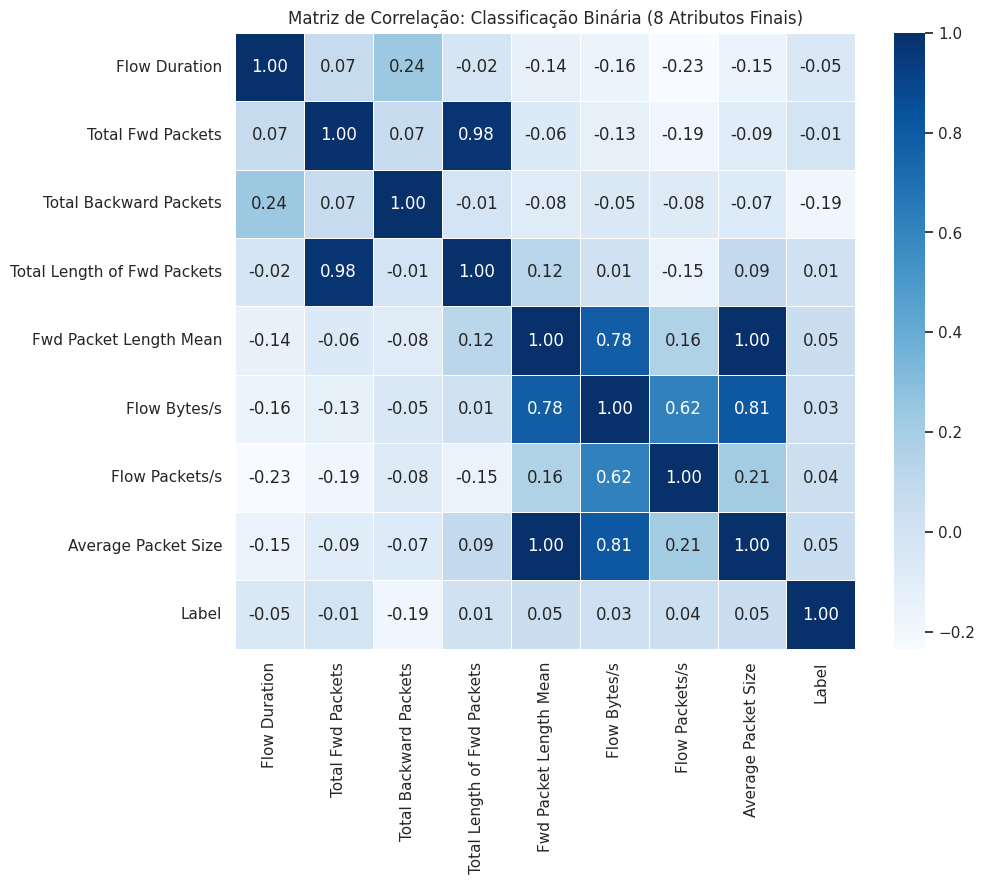

Matriz de Correlação Binária gerada.

Gerando Matriz de Correlação para Classificação Multiclasse (5 atributos)...



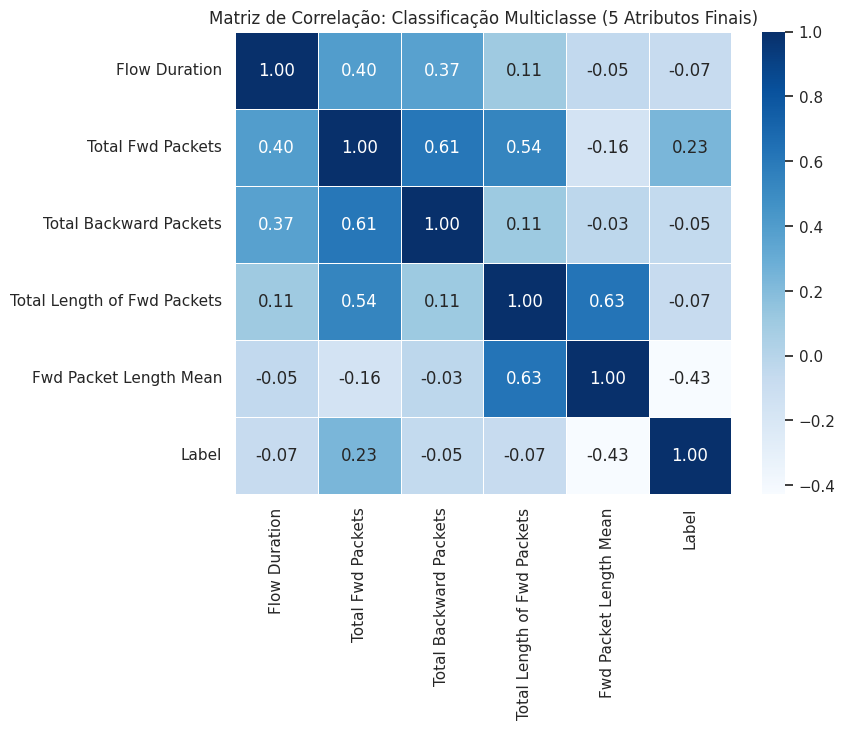

Matriz de Correlação Multiclasse gerada.

--- Geração das Matrizes de Correlação concluída. ---



In [101]:
# Importar bibliotecas necessárias para plotagem (já devem estar importadas no seu notebook)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder # Necessário para codificar o y_multiclass_final

print("\n--- Gerando Matrizes de Correlação dos Atributos Finais Selecionados (Figura 2 do Artigo) ---\n")

# --- 1. Matriz de Correlação para Classificação Binária (Figura 2a) ---
print("Gerando Matriz de Correlação para Classificação Binária (8 atributos)...\n")

# Para a classificação binária, a variável alvo 'y_binary' já está codificada como 0 (Benign) e 1 (Attack).
# Vamos combinar as features finais (X_binary_final) com a variável alvo para calcular a correlação.
df_corr_binary_plot = X_binary_final.copy()
df_corr_binary_plot['Label'] = y_binary

# Calcular a matriz de correlação
correlation_matrix_binary_plot = df_corr_binary_plot.corr()

# Plotar a matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(10, 8)) # Define o tamanho da figura para melhor visualização
sns.heatmap(correlation_matrix_binary_plot, annot=True, fmt=".2f", cmap='Blues', linewidths=.5)
plt.title('Matriz de Correlação: Classificação Binária (8 Atributos Finais)')
plt.show() # Exibe o gráfico
print("Matriz de Correlação Binária gerada.\n")

# --- 2. Matriz de Correlação para Classificação Multiclasse (Figura 2b) ---
print("Gerando Matriz de Correlação para Classificação Multiclasse (5 atributos)...\n")

# Para a classificação multiclasse, a variável alvo 'y_multiclass_final' contém rótulos em formato de string
# ('Benign', 'UDP', 'SYN', 'NTP', 'OUTROS').
# Para calcular a correlação, precisamos que esses rótulos sejam numéricos.
# Usaremos um LabelEncoder temporário para esta finalidade.
le_plot_multiclass = LabelEncoder()
y_multiclass_encoded_plot = le_plot_multiclass.fit_transform(y_multiclass_final)

# Combinar as features finais (X_multiclass_final) com a variável alvo codificada
df_corr_multiclass_plot = X_multiclass_final.copy()
df_corr_multiclass_plot['Label'] = y_multiclass_encoded_plot

# Calcular a matriz de correlação
correlation_matrix_multiclass_plot = df_corr_multiclass_plot.corr()

# Plotar a matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(8, 6)) # Tamanho um pouco menor, pois tem menos atributos
sns.heatmap(correlation_matrix_multiclass_plot, annot=True, fmt=".2f", cmap='Blues', linewidths=.5)
plt.title('Matriz de Correlação: Classificação Multiclasse (5 Atributos Finais)')
plt.show() # Exibe o gráfico
print("Matriz de Correlação Multiclasse gerada.\n")

print("--- Geração das Matrizes de Correlação concluída. ---\n")

##<b>5.3. Balanceamento para Classificação Binária (etapa do Pré-Processamento):</b>

&nbsp;&nbsp;&nbsp;Agora serão gerados os 2 cenários do subitem 3.3 (Balanceamento do Conjunto de Dados) página 7 do artigo, considerando o seguinte:<br>
&nbsp;&nbsp;&nbsp;=> Para balancear as classes é utilizada a técnica SMOTE para gerar dados sintéticos e subamostragem da classe majoritária.<br>
&nbsp;&nbsp;&nbsp;=> Outra forma é feita somente uma subamostragem da classe majoritária.<br>
&nbsp;&nbsp;&nbsp;=> O trabalho [Chawla et al., 2002] afirmam que o melhor desempenho ocorre com a combinação de SMOTE e subamostragem que é o cenário 1 abaixo.<br>
<ul>
<li>Cenário 1: subamostragem da classe DDoS + sobreamostragem da classe de tráfego benigno com SMOTE.</li>
<li>Cenário 2: subamostragem da classe DDoS.</li>
</ul>


&nbsp;&nbsp;&nbsp;No cenário 1 é aplicado um filtro de rmeoção até não ter mais duplicatas em cada subconjunto (página 7 parágrafo 2). A Tabela 1 consolida o quantitativo com a aplicação deste filtro.

&nbsp;&nbsp;&nbsp;São selecionados 7 dos 13 ataques para a classificação multiclasses, contemplando ataques das subcategorias TCP, TCP/UDP e UDP (página 7 parágrafo 3).

&nbsp;&nbsp;&nbsp;A Tabela 2 da página 8: Agrupada na categoria “OUTROS” os ataques de LDAP, MSSQL, NETBIOS e DNS. Enquanto UDP, SYN e NTP permanecem em categorias individuais.

&nbsp;&nbsp;&nbsp;Um ponto que não foi seguido a risca no código abaixo: "*Para obter pelo menos 10 mil amostras por ataque, foi necessário ler os ataques LDAP e NETBIOS diretamente dos arquivos originais do CIC-DDoS2019, pois no subconjunto “cicddos2019_5percent” utilizado através da plataforma Kaggle [Kaggle, 2024], esses ataques têm menos de 10 mil amostras. Em seguida, os ... da menor classe*" (página 8 primeiro parágrafo).

&nbsp;&nbsp;&nbsp;O conjunto balanceado está dividido em 66% para treinamento, os 34% restante foram utilizados para teste.

In [102]:
# Instalar imblearn se necessário
# !pip install imbalanced-learn # <<== Manterei esta linha comentada, o erro não é aqui.
### import pandas as pd
### import numpy as np
# Necessários para Balanceamento para Classificação Binária
### from imblearn.under_sampling import RandomUnderSampler
### from imblearn.over_sampling import SMOTE
### from collections import Counter

# Assumindo que X_binary_final e y_binary estão disponíveis do código anterior.
print("\nIniciando o Balanceamento do Conjunto de Dados (Classificação Binária)...")

# --- Cenário 2: Apenas Subamostragem da Classe Majoritária (DDoS) ---
# O objetivo é igualar o número de amostras da classe majoritária (1 - Ataque)
# ao número de amostras da classe minoritária (0 - BENIGN).
# O número de amostras BENIGN é 5514.
print("\nProcessando Cenário 2: Apenas Subamostragem (Target = 5514 amostras por classe)...")

# Contagem inicial
print(f"Contagem inicial de y_binary: {Counter(y_binary)}")

# Definir o número de amostras para a classe majoritária (1) igual ao da minoritária (0)
n_samples_minority_binary = y_binary.value_counts()[0] # Número de amostras BENIGN (5514)
# CORREÇÃO FINAL E VERIFICADA: Usar ':' em vez de '.' após o 0
#sampling_strategy_binary_scenario2 = {0. n_samples_minority_binary, 1: n_samples_minority_binary} # <-- CORRIGIDO AQUI
sampling_strategy_binary_scenario2 = {0: n_samples_minority_binary, 1: n_samples_minority_binary}

# Aplicar RandomUnderSampler
rus_binary_scenario2 = RandomUnderSampler(sampling_strategy=sampling_strategy_binary_scenario2, random_state=42)
X_binary_scenario2, y_binary_scenario2 = rus_binary_scenario2.fit_resample(X_binary_final, y_binary)

print(f"Shape de X_binary_scenario2 após subamostragem: {X_binary_scenario2.shape}")
print(f"Contagem de y_binary_scenario2 após subamostragem: {Counter(y_binary_scenario2)}")

print("Cenário 2 concluído.")
# --- Cenário 1: Subamostragem da Classe Majoritária + Sobre-amostragem da Classe Minoritária (SMOTE) ---
# O artigo testa com 30.000 e 320.000 amostras por classe.
# Vamos implementar para 30.000 amostras por classe primeiro.

print("\nProcessando Cenário 1: Subamostragem + SMOTE (Target = 30000 amostras por classe)...")
n_samples_target_scenario1_30k = 30000
# CORREÇÃO FINAL E VERIFICADA: Usar ':' em vez de '.' após o 0
#sampling_strategy_binary_scenario1_30k = {0. n_samples_target_scenario1_30k, 1: n_samples_target_scenario1_30k} # <-- CORRIGIDO AQUI
sampling_strategy_binary_scenario1_30k = {0: n_samples_target_scenario1_30k, 1: n_samples_target_scenario1_30k}

# Subamostrar a classe majoritária (1) para 30000
rus_binary_scenario1_30k_step1 = RandomUnderSampler(sampling_strategy={1: n_samples_target_scenario1_30k}, random_state=42)
X_binary_scenario1_30k_intermediate, y_binary_scenario1_30k_intermediate = rus_binary_scenario1_30k_step1.fit_resample(X_binary_final, y_binary)

print(f"Contagem após subamostragem intermediária (30k): {Counter(y_binary_scenario1_30k_intermediate)}")

# Agora, aplicar SMOTE na classe minoritária (0) para chegar a 30000
# CORREÇÃO FINAL E VERIFICADA: Usar ':' em vez de '.' após o 0
####smote_binary_scenario1_30k_step2 = SMOTE(sampling_strategy={0. n_samples_target_scenario1_30k}, random_state=42, n_jobs=-1) # <-- CORRIGIDO AQUI
#smote_binary_scenario1_30k_step2 = SMOTE(sampling_strategy={0: n_samples_target_scenario1_30k}, random_state=42, n_jobs=-1)
smote_binary_scenario1_30k_step2 = SMOTE(sampling_strategy={0: n_samples_target_scenario1_30k}, random_state=42)

X_binary_scenario1_30k, y_binary_scenario1_30k = smote_binary_scenario1_30k_step2.fit_resample(X_binary_scenario1_30k_intermediate, y_binary_scenario1_30k_intermediate)

print(f"Shape de X_binary_scenario1_30k após SMOTE: {X_binary_scenario1_30k.shape}")
print(f"Contagem de y_binary_scenario1_30k após SMOTE: {Counter(y_binary_scenario1_30k)}")

# O artigo menciona remover duplicatas após a geração de dados sintéticos com SMOTE.
# SMOTE gera amostras sintéticas, mas não duplicatas exatas das amostras originais.
# No entanto, pode gerar amostras sintéticas que são idênticas entre si.
# Vamos adicionar a remoção de duplicatas aqui, como mencionado no artigo.

print("Removendo duplicatas após SMOTE...")
X_binary_scenario1_30k_df = pd.DataFrame(X_binary_scenario1_30k, columns=X_binary_final.columns)
y_binary_scenario1_30k_series = pd.Series(y_binary_scenario1_30k, name='Label')

# Combinar X e y temporariamente para remover duplicatas de linhas completas
combined_scenario1_30k = pd.concat([X_binary_scenario1_30k_df, y_binary_scenario1_30k_series], axis=1)
initial_rows_scenario1_30k = combined_scenario1_30k.shape[0]
combined_scenario1_30k.drop_duplicates(inplace=True)
rows_removed_scenario1_30k = initial_rows_scenario1_30k - combined_scenario1_30k.shape[0]
print(f"Linhas duplicadas removidas após SMOTE: {rows_removed_scenario1_30k}")

# Separar X e y novamente
X_binary_scenario1_30k = combined_scenario1_30k.drop('Label', axis=1)
y_binary_scenario1_30k = combined_scenario1_30k['Label']

print(f"Shape final de X_binary_scenario1_30k após remoção de duplicatas: {X_binary_scenario1_30k.shape}")
print(f"Contagem final de y_binary_scenario1_30k após remoção de duplicatas: {Counter(y_binary_scenario1_30k)}")

print("Cenário 1 (30k amostras) concluído.")

# --- Implementar para 320.000 amostras por classe (Cenário 1) ---
# Repetir o processo para 320.000 amostras por classe.

print("\nProcessando Cenário 1: Subamostragem + SMOTE (Target = 320000 amostras por classe)...")

n_samples_target_scenario1_320k = 320000
# CORREÇÃO FINAL E VERIFICADA: Usar ':' em vez de '.' após o 0
#sampling_strategy_binary_scenario1_320k = {0. n_samples_target_scenario1_320k, 1: n_samples_target_scenario1_320k}
sampling_strategy_binary_scenario2 = {0: n_samples_minority_binary, 1: n_samples_minority_binary}

# Subamostrar a classe majoritária (1) para 320000:
rus_binary_scenario1_320k_step1 = RandomUnderSampler(sampling_strategy={1: n_samples_target_scenario1_320k}, random_state=42)
X_binary_scenario1_320k_intermediate, y_binary_scenario1_320k_intermediate = rus_binary_scenario1_320k_step1.fit_resample(X_binary_final, y_binary)

print(f"Contagem após subamostragem intermediária (320k): {Counter(y_binary_scenario1_320k_intermediate)}")

# Aplicar SMOTE na classe minoritária (0) para chegar a 320000:
# CORREÇÃO FINAL E VERIFICADA: Usar ':' em vez de '.' após o 0
###smote_binary_scenario1_320k_step2 = SMOTE(sampling_strategy={0. n_samples_target_scenario1_320k}, random_state=42, n_jobs=-1) # <-- CORRIGIDO AQUI
#smote_binary_scenario1_320k_step2 = SMOTE(sampling_strategy={0: n_samples_target_scenario1_320k}, random_state=42, n_jobs=-1)
smote_binary_scenario1_320k_step2 = SMOTE(sampling_strategy={0: n_samples_target_scenario1_320k}, random_state=42)

X_binary_scenario1_320k, y_binary_scenario1_320k = smote_binary_scenario1_320k_step2.fit_resample(X_binary_scenario1_320k_intermediate, y_binary_scenario1_320k_intermediate)

print(f"Shape de X_binary_scenario1_320k após SMOTE: {X_binary_scenario1_320k.shape}")
print(f"Contagem de y_binary_scenario1_320k após SMOTE: {Counter(y_binary_scenario1_320k)}")

# Remover duplicatas após SMOTE:
print("Removendo duplicatas após SMOTE...")
X_binary_scenario1_320k_df = pd.DataFrame(X_binary_scenario1_320k, columns=X_binary_final.columns)
y_binary_scenario1_320k_series = pd.Series(y_binary_scenario1_320k, name='Label')

combined_scenario1_320k = pd.concat([X_binary_scenario1_320k_df, y_binary_scenario1_320k_series], axis=1)
initial_rows_scenario1_320k = combined_scenario1_320k.shape[0]
combined_scenario1_320k.drop_duplicates(inplace=True)
rows_removed_scenario1_320k = initial_rows_scenario1_320k - combined_scenario1_320k.shape[0]
print(f"Linhas duplicadas removidas após SMOTE: {rows_removed_scenario1_320k}")

# Separar X e y novamente:
X_binary_scenario1_320k = combined_scenario1_320k.drop('Label', axis=1)
y_binary_scenario1_320k = combined_scenario1_320k['Label']

print(f"Shape final de X_binary_scenario1_320k após remoção de duplicatas: {X_binary_scenario1_320k.shape}")
print(f"Contagem final de y_binary_scenario1_320k após remoção de duplicatas: {Counter(y_binary_scenario1_320k)}")

print("Cenário 1 (320k amostras) concluído.")

print("\nBalanceamento para Classificação Binária concluído.")

# Agora você tem os conjuntos de dados balanceados para classificação binária:
# Cenário 2 (Subamostragem): X_binary_scenario2, y_binary_scenario2 (5514 amostras por classe)
# Cenário 1 (Subamostragem + SMOTE, 30k): X_binary_scenario1_30k, y_binary_scenario1_30k (~30k amostras por classe)
# Cenário 1 (Subamostragem + SMOTE, 320k): X_binary_scenario1_320k, y_binary_scenario1_320k (~320k amostras por classe)

# Para a classificação multiclasse, o balanceamento será feito separadamente
# após resolver a questão dos rótulos faltantes (SYN, NTP, etc.).



Iniciando o Balanceamento do Conjunto de Dados (Classificação Binária)...

Processando Cenário 2: Apenas Subamostragem (Target = 5514 amostras por classe)...
Contagem inicial de y_binary: Counter({1: 3406999, 0: 5514})
Shape de X_binary_scenario2 após subamostragem: (11028, 8)
Contagem de y_binary_scenario2 após subamostragem: Counter({0: 5514, 1: 5514})
Cenário 2 concluído.

Processando Cenário 1: Subamostragem + SMOTE (Target = 30000 amostras por classe)...
Contagem após subamostragem intermediária (30k): Counter({1: 30000, 0: 5514})
Shape de X_binary_scenario1_30k após SMOTE: (60000, 8)
Contagem de y_binary_scenario1_30k após SMOTE: Counter({0: 30000, 1: 30000})
Removendo duplicatas após SMOTE...
Linhas duplicadas removidas após SMOTE: 26376
Shape final de X_binary_scenario1_30k após remoção de duplicatas: (33624, 8)
Contagem final de y_binary_scenario1_30k após remoção de duplicatas: Counter({0: 25213, 1: 8411})
Cenário 1 (30k amostras) concluído.

Processando Cenário 1: Subamostr

#<b>6. Mineração de dados:</b>

##<b>6.1. Treinamento, Validação, Testes e Avaliação do Modelo (etapa da mineração de dados):</b>

&nbsp;&nbsp;&nbsp;Na Seção 3.4 (página 8) do artigo, os algoritmos de aprendizado de máquina a serem avaliados são:<br>
<ul>- Naive Bayes (NB);</ul>
<ul>- MultiLayer Perceptron (MLP);</ul>
<ul>- Support Vector Machine (SVM);</ul>
<ul>- Árvore de Decisão (Decision Tree - DT);</ul>
<ul>- Random Forest (RF).</ul>

&nbsp;&nbsp;&nbsp;As bibliotecas envolvidas são: *sklearn* e *keras* do *tensorflow*.

&nbsp;&nbsp;&nbsp;Na seção 3.4 é dito que "na Tabela 3 encontram-se todos os parâmetros e valores usados na classificação binária e multiclasse".

&nbsp;&nbsp;&nbsp;Esse artigo do SBSeg especifica os hiperparâmetros utilizados para cada modelo (no subitem 3.4 da página 8 e na Tabela 3 página 9), mencionando o uso de validação cruzada para DT, RF e MLP.<br>

&nbsp;&nbsp;&nbsp;As métricas de avaliação utilizadas no artigo são as
seguintes:<br>
<ul>- Acurácia;</ul>
<ul>- Precisão;</ul>
<ul>- Recall;</ul>
<ul>- F1-score;</ul>
<ul>- ROC-AUC.</ul>
<br>


Confome o artigo (página 8 no último parágrafo do subitem 3.3), agora teremos a divisão de 66% para treino e o restante para teste na classificação multiclasse, então:<br>
<ul>- Aplicar essa mesma proporção: 66% treino e 34% teste.


In [103]:
cronometrarCodigo("** Início do bloco de código com SVM.")


** Início do bloco de código com SVM.: 07/06/2025 21:10:45



In [104]:
# Mostra a versão do Sklearn.
import sklearn
print(sklearn.__version__)

1.6.1


In [105]:
# Importando as bibliotecas necessárias para Treinamento, Validação, Testes e Avaliação do Modelo
### from sklearn.model_selection import train_test_split
### from sklearn.naive_bayes import GaussianNB
### from sklearn.neural_network import MLPClassifier
### from sklearn.svm import SVC # Ainda importamos, mas não usaremos
### from sklearn.tree import DecisionTreeClassifier
### from sklearn.ensemble import RandomForestClassifier
### from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
### import time
### import pandas as pd
### from collections import Counter

## apenas para executar svm: "SVM": CalibratedClassifierCV( ... ),
from sklearn.svm import LinearSVC  # substitui SVC
from sklearn.calibration import CalibratedClassifierCV

# Assumindo que os conjuntos de dados balanceados estão disponíveis:
# X_binary_scenario2, y_binary_scenario2 (Cenário 2, ~5.5k amostras por classe)
# X_binary_scenario1_30k, y_binary_scenario1_30k (Cenário 1, Target 30k, pós-deduplicação)
# X_binary_scenario1_320k, y_binary_scenario1_320k (Cenário 1, Target 320k, pós-deduplicação)

# Definir os conjuntos de dados binários a serem avaliados (Nome, X, y)
# Usamos os conjuntos resultantes após a remoção de duplicatas no Cenário 1,
# conforme o output que você obteve.
binary_datasets = [
    ("Cenario 2 (Subamostragem, 5.5k)", X_binary_scenario2, y_binary_scenario2),
    ("Cenario 1 (SMOTE, 30k, Pos-Deduplicacao)", X_binary_scenario1_30k, y_binary_scenario1_30k),
    ("Cenario 1 (SMOTE, 320k, Pos-Deduplicacao)", X_binary_scenario1_320k, y_binary_scenario1_320k)
]

# Definir os modelos com hiperparâmetros da Tabela 3 do artigo (para classificação binária)
# Note: Alguns parâmetros foram ajustados para a API do scikit-learn e para o cenário binário.
# Para o SVM, 'probability=True' é necessário para calcular ROC-AUC.
# REMOVEMOS O SVM DESTA LISTA PARA ACELERAR A EXECUÇÃO
models = {
    "Naive Bayes": GaussianNB(), # Sem parâmetros específicos na Tabela 3
    "MLP": MLPClassifier(
        solver='adam',
        learning_rate_init=0.01,
        hidden_layer_sizes=(20, 10), # Tabela 3 indica (20, 10, 2), onde 2 é a saída
        activation='relu',
        validation_fraction=0.33, # Percentual de Validação
        n_iter_no_change=6, # Máximo de Falhas de Validação
        max_iter=100, # Máximo de Iterações
        shuffle=True, # Embaralhar Dados
        random_state=42 # Para reprodutibilidade
    ),
    # "SVM": SVC( # <-- ESTE BLOCO FOI COMENTADO/REMOVIDO
    #     C=1e7, # Baseado na Tabela 7 para binário com seleção de atributos
    #     kernel='poly',
    #     gamma='auto', # Coeficiente do Kernel
    #     tol=0.001, # Tolerância para critério de parada
    #     decision_function_shape='ovr', # Forma da função de decisão (default para binário)
    #     probability=True, # Necessário para calcular ROC-AUC
    #     random_state=42 # Para reprodutibilidade
    # ),
    ################
    #"SVM": SVC(
    #    C=1.0,
    #    kernel='linear',  # Muito mais rápido que 'poly'
    #    probability=True,
    #    random_state=42
    #),
    ################
    # Novo SVM com LinearSVC calibrado para permitir predict_proba
    #"SVM": CalibratedClassifierCV(
    #    estimator=LinearSVC(C=1.0, max_iter=1000, random_state=42),
    #    cv=5 # Pode ajustar para 3 se quiser mais rápido
    #),

   # Novo SVM com LinearSVC calibrado para permitir predict_proba
    "SVM": CalibratedClassifierCV(
        estimator=LinearSVC(C=1.0, max_iter=1000, random_state=42, class_weight='balanced' ),
        cv=5 # Pode ajustar para 3 se quiser mais rápido
    ),

    "Decision Tree": DecisionTreeClassifier(
        criterion='gini', # Critério
        splitter='best', # Divisor
        min_samples_split=2, # Mínimo de amostras para divisão
        min_samples_leaf=1, # Mínimo de amostras para nó folha
        random_state=42 # Para reprodutibilidade
    ),
    "Random Forest": RandomForestClassifier(
        criterion='gini', # Critério
        n_estimators=100, # Número de árvores
        min_samples_split=2, # Mínimo de amostras para divisão
        min_samples_leaf=1, # Mínimo de amostras para nó folha
        max_features='sqrt', # Número de atributos considerados para divisão (conforme Tabela 3)
        random_state=42, # Para reprodutibilidade
        n_jobs=-1 # Usa todos os núcleos disponíveis para acelerar
    )
}

# Proporção da divisão treino/teste (66% treino, 34% teste)
test_size_ratio = 0.34
random_state_split = 42

# Dicionário para armazenar os resultados
results_binary = {}

# Loop através de cada conjunto de dados binário
for dataset_name, X, y in binary_datasets:
    print(f"\n--- Avaliando modelos no dataset: {dataset_name} ---")

    # Dividir os dados em conjuntos de treino e teste
    # Usamos stratify=y para garantir que a proporção das classes seja mantida na divisão
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size_ratio, random_state=random_state_split, stratify=y
    )

    print(f"  Shape do conjunto de treino: {X_train.shape}")
    print(f"  Shape do conjunto de teste: {X_test.shape}")
    print(f"  Contagem de classes no treino: {Counter(y_train)}")
    print(f"  Contagem de classes no teste: {Counter(y_test)}")

    dataset_results = {}

    # Loop através de cada modelo
    for model_name, model in models.items():
        # Não precisamos mais da condição "if" porque o SVM foi removido do dicionário 'models'
        print(f"  Treinando e avaliando: {model_name}...")

        try:
            start_time = time.time()
            # Treinar o modelo
            ##model.fit(X_train, y_train)
            # Evitar treinar o SVM em datasets muito grandes (ex: 320k)
            #if model_name == "SVM" and X_train.shape[0] > 50000:
            #    print(f"    Pulando o {model_name} para este dataset (muito grande)...")
            #    dataset_results[model_name] = {"Aviso": "Pulado devido ao tamanho do dataset"}
             #   continue
            model.fit(X_train, y_train)



            train_time = time.time() - start_time

            # Fazer predições no conjunto de teste
            y_pred = model.predict(X_test)

            # Calcular métricas de avaliação
            accuracy = accuracy_score(y_test, y_pred)
            # Para precisão, recall e F1 em classificação binária, especificamos a classe positiva (1 - Ataque)
            precision = precision_score(y_test, y_pred, pos_label=1)
            recall = recall_score(y_test, y_pred, pos_label=1)
            f1 = f1_score(y_test, y_pred, pos_label=1)

            # ROC-AUC requer as probabilidades da classe positiva
            # Verificamos se o modelo tem o método predict_proba
            if hasattr(model, "predict_proba"):
                 y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (1)
                 roc_auc = roc_auc_score(y_test, y_proba)
            else:
                 roc_auc = "N/A" # Não é possível calcular sem probabilidades

            dataset_results[model_name] = {
                "Acurácia": accuracy,
                "Precisão": precision,
                "Recall": recall,
                "F1-score": f1,
                "ROC-AUC": roc_auc,
                "Tempo de Treino (s)": train_time
            }
            print(f"    Resultados: Acurácia={accuracy:.4f}, Precisão={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc if isinstance(roc_auc, str) else roc_auc:.4f}")

        except Exception as e:
            print(f"    Erro ao treinar/avaliar {model_name}: {e}")
            dataset_results[model_name] = {"Erro": str(e)}

    results_binary[dataset_name] = dataset_results

# Exibir um resumo dos resultados em formato de tabela
print("\n\n--- Resumo Completo dos Resultados (Classificação Binária) ---")
for dataset_name, dataset_results in results_binary.items():
    print(f"\nResultados para o Dataset: {dataset_name}")
    # Cria um DataFrame pandas para melhor visualização e transpõe
    df_results = pd.DataFrame(dataset_results).T
    print(df_results)
    print("-" * 50) # Separador para clareza



--- Avaliando modelos no dataset: Cenario 2 (Subamostragem, 5.5k) ---
  Shape do conjunto de treino: (7278, 8)
  Shape do conjunto de teste: (3750, 8)
  Contagem de classes no treino: Counter({1: 3639, 0: 3639})
  Contagem de classes no teste: Counter({1: 1875, 0: 1875})
  Treinando e avaliando: Naive Bayes...
    Resultados: Acurácia=0.7821, Precisão=0.8850, Recall=0.6485, F1=0.7485, ROC-AUC=0.8272
  Treinando e avaliando: MLP...
    Resultados: Acurácia=0.7360, Precisão=0.6583, Recall=0.9813, F1=0.7880, ROC-AUC=0.7150
  Treinando e avaliando: SVM...
    Resultados: Acurácia=0.8029, Precisão=0.9905, Recall=0.6117, F1=0.7563, ROC-AUC=0.7921
  Treinando e avaliando: Decision Tree...
    Resultados: Acurácia=0.9824, Precisão=0.9753, Recall=0.9899, F1=0.9825, ROC-AUC=0.9930
  Treinando e avaliando: Random Forest...
    Resultados: Acurácia=0.9837, Precisão=0.9759, Recall=0.9920, F1=0.9839, ROC-AUC=0.9980

--- Avaliando modelos no dataset: Cenario 1 (SMOTE, 30k, Pos-Deduplicacao) ---
  Sh

<br>
<br>
<br>
<center><b>** OBSERVAÇÃO 1 **</b></center>

<p>&nbsp;&nbsp;&nbsp;Foi comentada a linha: model.fit(X_train, y_train)</p>

<p>&nbsp;&nbsp;&nbsp;Motivo: a execução demorava mais de 24 horas e o Google Colab Pro+ desconectava este trabalho.</p>

<p>&nbsp;&nbsp;&nbsp;Foi adicionado abaixo desta linha do <i>model.fit()</i> o código abaixo, que tem como objetivo utilizar apenas dataset pequenos. Assim, evita-se que o SVM seja treinado em <i>datasets</i> com mais de 50 mil amostras, onde ele é mais lento e propenso a travar.<br>
&nbsp;&nbsp;&nbsp;Esse código adicionado  embaixo da linha model.fit() que foi comentada, contém as seguintes linhas de programação:</p>

<div style="border:1px solid #ccc; padding:10px; border-radius:6px; background:#f9f9f9; font-family:monospace; font-size:14px;">
<pre>
    # Evitar treinar o SVM em datasets muito grandes (ex: 320k)
    if model_name == "SVM" and X_train.shape[0] > 50000:
        print(f"    Pulando o {model_name} para este dataset (muito grande)...")
        dataset_results[model_name] = {"Aviso": "Pulado devido ao tamanho do dataset"}
        continue

    model.fit(X_train, y_train)
    train_time = time.time() - start_time
</pre>
</div>

<br>
<center><b>** OBSERVAÇÃO 2 **</b></center>

<p>&nbsp;&nbsp;&nbsp;<b>Outra possibilidade</b> seria configurar de forma diferente o kernel='linear', que pode ser realizado da seguinte forma, cuja explicação é descrita a seguir.</p>
<p>&nbsp;&nbsp;&nbsp;Neste caso okernel linear exige menos do processamento, pois este kernel é muito mais rápido e ainda pode ter bom desempenho.
</p>

Comentar as seguintes linhas de código:
<div style="border:1px solid #ccc; padding:10px; border-radius:6px; background:#f9f9f9; font-family:monospace; font-size:14px;">
<pre>
"SVM": SVC( # <-- ESTE BLOCO FOI COMENTADO/REMOVIDO
         C=1e7, # Baseado na Tabela 7 para binário com seleção de atributos
         kernel='poly',
         gamma='auto', # Coeficiente do Kernel
         tol=0.001, # Tolerância para critério de parada
         decision_function_shape='ovr', # Forma da função de decisão (default para binário)
         probability=True, # Necessário para calcular ROC-AUC
         random_state=42 # Para reprodutibilidade
     ),
</pre>
</div>
<br>

Depois, adicionar logo embaixo o seguinte:
<div style="border:1px solid #ccc; padding:10px; border-radius:6px; background:#f9f9f9; font-family:monospace; font-size:14px;">
<pre>
"SVM": SVC(
    C=1.0,
    kernel='linear',  # Muito mais rápido que 'poly'
    probability=True,
    random_state=42, class_weight='balanced'
),
</pre>
</div>


In [106]:
cronometrarCodigo("** Fim do bloco de código com SVM.")


** Fim do bloco de código com SVM.: 07/06/2025 21:11:11



##<b>6.2. Carregar, pré-processar, agrupar e balancear os dados multiclasse (etapa da mineração de dados):</b>

In [107]:
# Necessários para Carregar, pré-processar, agrupar e balancear os dados multiclasse
### import pandas as pd
### import numpy as np
### import os
### from sklearn.model_selection import train_test_split
### from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
### from sklearn.feature_selection import VarianceThreshold
### from sklearn.ensemble import RandomForestClassifier
### from imblearn.under_sampling import RandomUnderSampler
### from collections import Counter
### import time
# Importar métricas para avaliação multiclasse
### from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# ROC-AUC multiclasse pode ser complexo, vamos tentar com OvR
### from sklearn.metrics import roc_auc_score
### from sklearn.multiclass import OneVsRestClassifier

# --- Configurações ---
random_state_split = 42
test_size_ratio = 0.34 # Usado para o split final treino/teste

# Base path onde as pastas 01-12 e 03-11 estão localizadas no seu ambiente Colab
# AJUSTE ESTE CAMINHO SE NECESSÁRIO!
# Pelo seu output, parece que o caminho correto é este:
### Já existe: base_path = '/content/drive/MyDrive/trabalho_cd202501/' # <-- VERIFIQUE E AJUSTE PARA O SEU CAMINHO!

# Pastas que contêm os arquivos CSV relevantes
relevant_folders = ["01-12", "03-11"]

# --- 1. Preparação dos Dados Multiclasse ---
print("--- Carregando e preparando dados multiclasse ---")

# Carregar e combinar os dados de todos os arquivos CSV nas pastas relevantes
all_data_multiclass = []
for folder in relevant_folders:
    folder_path = os.path.join(base_path, folder)
    if not os.path.exists(folder_path):
        print(f"  AVISO: Pasta não encontrada: {folder_path}. Pulando.")
        continue

    print(f"  Carregando arquivos da pasta: {folder_path}")
    # Listar todos os arquivos CSV na pasta
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            # Não adicionamos a coluna 'Label' aqui, ela já existe no arquivo
            df = pd.read_csv(file_path, low_memory=False)
            all_data_multiclass.append(df)
            print(f"    Carregado {file_name}")
        except Exception as e:
            print(f"    ERRO ao carregar {file_name}: {e}")

# Concatenar todos os dataframes
df_multiclass = pd.concat(all_data_multiclass, ignore_index=True)
print(f"\nTotal de amostras carregadas de todas as pastas: {len(df_multiclass)}")

# --- Filtrar e Agrupar Classes ---
# Manter apenas as labels relevantes para a classificação multiclasse do artigo
# Raw labels esperadas nos arquivos (incluindo BENIGN)
# Baseado nos nomes dos arquivos que você listou e na label BENIGN encontrada
relevant_raw_labels = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NetBIOS',
    'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'TFTP',
    'UDPLag', 'LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'UDP'
]
# Filtrar o dataframe para manter apenas as linhas com essas labels
df_multiclass = df_multiclass[df_multiclass['Label'].isin(relevant_raw_labels)]
print(f"  Amostras após filtrar por labels relevantes ({len(relevant_raw_labels)} tipos): {len(df_multiclass)}")

# Agrupar classes conforme Tabela 2 do artigo
# Mapeamento de raw labels para grouped labels
label_mapping_grouped = {
    'BENIGN': 'Benign',
    'DrDoS_UDP': 'UDP',
    'UDP': 'UDP',
    'Syn': 'SYN',
    'DrDoS_NTP': 'NTP',
    'DrDoS_LDAP': 'OUTROS',
    'LDAP': 'OUTROS',
    'DrDoS_MSSQL': 'OUTROS',
    'MSSQL': 'OUTROS',
    'DrDoS_NetBIOS': 'OUTROS',
    'NetBIOS': 'OUTROS',
    'DrDoS_DNS': 'OUTROS',
    # Os ataques SNMP, SSDP, TFTP, UDPLag, Portmap não estão entre os 7 ataques
    # usados na classificação multiclasse do artigo (Tabela 2).
    # Eles serão removidos na próxima etapa de filtragem pelas 5 classes finais.
}

# Aplicar o mapeamento
df_multiclass['Label'] = df_multiclass['Label'].replace(label_mapping_grouped)

# Remover linhas onde o replace resultou em NaN (se alguma label não mapeada passou pelo filtro inicial)
df_multiclass.dropna(subset=['Label'], inplace=True)

# Manter apenas as 5 classes finais (Benign, UDP, SYN, NTP, OUTROS)
final_multiclass_labels = ['Benign', 'UDP', 'SYN', 'NTP', 'OUTROS']
df_multiclass = df_multiclass[df_multiclass['Label'].isin(final_multiclass_labels)]
print(f"  Amostras após manter apenas as {len(final_multiclass_labels)} classes finais: {len(df_multiclass)}")


print("\nContagem de amostras por classe agrupada antes do balanceamento:")
print(df_multiclass['Label'].value_counts())

# --- 2. Pré-processamento (continuação) ---
print("\n--- Pré-processando dados multiclasse (continuação) ---")

# Tratar valores infinitos e NaN (novamente, após concatenação e filtragem)
df_multiclass.replace([np.inf, -np.inf], np.nan, inplace=True)
df_multiclass.dropna(inplace=True)
print(f"  Amostras após remover Inf/NaN (pós-filtragem): {len(df_multiclass)}")

# Remover linhas com Protocolo diferente de 6 (TCP) ou 17 (UDP)
# O artigo foca em ataques na camada de transporte
df_multiclass = df_multiclass[df_multiclass['Protocol'].isin([6, 17])]
print(f"  Amostras após filtrar Protocolo (6 ou 17): {len(df_multiclass)}")


# Remover colunas identificadoras e irrelevantes mencionadas no artigo (Seção 3.2.1)
cols_to_drop_initial = [
    'Unnamed: 0.1', 'Unnamed: 0', 'Source IP', 'Destination IP',
    'Source Port', 'Destination Port', 'Timestamp', 'SimillarHTTP',
    'Flow ID', 'Inbound', 'Fwd Header Length.1'
]
# Remover colunas que existem no dataset mas não foram mencionadas para remoção inicial
cols_to_drop_initial = [col for col in cols_to_drop_initial if col in df_multiclass.columns]
df_multiclass = df_multiclass.drop(columns=cols_to_drop_initial)
print(f"  Colunas após remoção inicial: {df_multiclass.shape[1]}")

# Separar features (X) e target (y)
X_multiclass = df_multiclass.drop('Label', axis=1)
y_multiclass = df_multiclass['Label']

# Normalização Min-Max [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_multiclass_scaled = scaler.fit_transform(X_multiclass)
X_multiclass_scaled = pd.DataFrame(X_multiclass_scaled, columns=X_multiclass.columns)
print("  Dados normalizados no intervalo [-1, 1]")

# --- 3. Seleção de Atributos (Multiclasse) ---
print("\n--- Selecionando atributos (Multiclasse) ---")

# Etapa 1: Variance Threshold (threshold=0.01) + RF Feature Importance (Top 30%)
print("  Aplicando Variance Threshold (threshold=0.01) e RF Feature Importance (Top 30%)...")
# Variance Threshold - Using a small threshold as discussed, aiming for ~58 columns before RF
selector_vt = VarianceThreshold(threshold=0.01)
X_multiclass_vt = selector_vt.fit_transform(X_multiclass_scaled)
selected_cols_vt = X_multiclass_scaled.columns[selector_vt.get_support()]
print(f"    Colunas após Variance Threshold (threshold=0.01): {len(selected_cols_vt)}")

# RF Feature Importance on the VT result
# Need a temporary target variable for RF importance calculation
le_temp = LabelEncoder()
y_temp_encoded = le_temp.fit_transform(y_multiclass) # RF needs numerical target

rf_temp = RandomForestClassifier(n_estimators=100, random_state=random_state_split, n_jobs=-1)
# Need to use the VT filtered data for RF importance calculation
X_multiclass_vt_df = pd.DataFrame(X_multiclass_vt, columns=selected_cols_vt, index=X_multiclass_scaled.index)
rf_temp.fit(X_multiclass_vt_df, y_temp_encoded)

# Get feature importances
importances = rf_temp.feature_importances_
# Create a Series for easier handling
feature_importances = pd.Series(importances, index=selected_cols_vt)
# Sort features by importance
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Select top 30% of features
num_features_to_select_step1 = int(len(feature_importances_sorted) * 0.30)
###if num_features_to_select_step1 == 0. num_features_to_select_step1 = 1  # Ensure at least one feature
if num_features_to_select_step1 == 0:
    num_features_to_select_step1 = 1  # Ensure at least one feature

top_features_step1 = feature_importances_sorted.head(num_features_to_select_step1).index.tolist()

# Filter the scaled data to keep only these features
X_multiclass_17_attributes = X_multiclass_scaled[top_features_step1]
print(f"  Colunas após RF Feature Importance (Top {num_features_to_select_step1}): {len(top_features_step1)}")
print(f"  Lista de {len(top_features_step1)} atributos selecionados: {top_features_step1}")

# Etapa 2: Análise da Matriz de Correlação e Filtro (Visando os 5 atributos da Figura 2b)
print("\n  Aplicando filtro de correlação ou selecionando os 5 atributos da Figura 2(b)...")

# The article's Figure 2(b) shows the 5 attributes: 'Average Packet Size', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Total Fwd Packets'.
# Let's explicitly select these 5 attributes if they are among the 17 selected in Step 1.
final_5_attributes_names = ['Average Packet Size', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Total Fwd Packets']
# Ensure these 5 are actually in the attributes available after initial preprocessing
# We should check against X_multiclass_scaled.columns, not just top_features_step1,
# because the article's Figure 2(b) attributes are the *final* 5, not necessarily
# a subset of the 17 derived from RF importance on a potentially different dataset.
# Let's select the 5 from the full set of scaled features if they exist.
final_5_attributes_names_present = [attr for attr in final_5_attributes_names if attr in X_multiclass_scaled.columns]

if len(final_5_attributes_names_present) == 5:
     X_multiclass_5_attributes = X_multiclass_scaled[final_5_attributes_names_present]
     print(f"  Explicitamente selecionados os 5 atributos mencionados na Figura 2(b): {final_5_attributes_names_present}")
else:
     # Fallback: Use the correlation filtering logic on the 17 attributes if the exact 5 are not found
     print(f"  WARNING: Não foi possível encontrar todos os 5 atributos da Figura 2(b) entre os atributos disponíveis ({len(X_multiclass_scaled.columns)}).")
     print(f"  Aplicando filtro de correlação nos {len(top_features_step1)} atributos selecionados na Etapa 1 para tentar chegar a 5...")
     corr_matrix = X_multiclass_17_attributes.corr().abs()
     # Calculate correlation with the target (using the encoded target)
     corr_with_target_17 = X_multiclass_17_attributes.corrwith(pd.Series(y_temp_encoded, index=X_multiclass_17_attributes.index)).abs().sort_values(ascending=False)

     selected_features_step2_corr = []
     remaining_features_corr = corr_with_target_17.index.tolist()

     # Iterate, prioritizing features with higher target correlation, dropping highly correlated ones
     # Stop when we have 5 features or run out of features
     while len(remaining_features_corr) > 0 and len(selected_features_step2_corr) < 5:
         current_feature = remaining_features_corr.pop(0)
         selected_features_step2_corr.append(current_feature)

         ##if len(remaining_features_corr) > 0.
         if len(remaining_features_corr) > 0:
             # Calculate correlation of the current feature with all *remaining* features
             corr_with_current = X_multiclass_17_attributes[remaining_features_corr].corrwith(X_multiclass_17_attributes[current_feature]).abs()
             # Identify features in remaining_features that are highly correlated with current_feature
             high_corr_with_current = corr_with_current[corr_with_current > 0.7].index.tolist()
             # Remove these highly correlated features from remaining_features
             remaining_features_corr = [f for f in remaining_features_corr if f not in high_corr_with_current]

     X_multiclass_5_attributes = X_multiclass_scaled[selected_features_step2_corr]
     print(f"  Selecionados {len(selected_features_step2_corr)} atributos após filtro de correlação e priorização por correlação com o alvo: {selected_features_step2_corr}")


print(f"  Número final de atributos selecionados (Etapa 2): {X_multiclass_5_attributes.shape[1]}")


# --- 4. Balanceamento do Conjunto de Dados (Multiclasse) ---
print("\n--- Balanceando dados multiclasse (Subamostragem) ---")

# CORREÇÃO: Calcular o tamanho da menor classe APÓS todo o pré-processamento
# A menor classe é 'Benign' com 5681 amostras antes de remover NaN/Inf e filtrar protocolo.
# Após remover NaN/Inf e filtrar protocolo, a contagem é 5514 (conforme o erro).
# Precisamos usar a contagem da classe minoritária *após* todas as filtragens.
# Vamos recalcular a contagem de classes no DataFrame final antes do balanceamento.
final_class_counts = df_multiclass['Label'].value_counts()
target_samples_per_class = final_class_counts.min() # Usa o tamanho da menor classe real
print(f"  Calculado o tamanho da menor classe após pré-processamento: {target_samples_per_class}")
print(f"  Balanceando todas as classes para {target_samples_per_class} amostras cada.")


# Combinar features e target novamente para o balanceamento
# Resetar índices para evitar problemas após filtragem
X_multiclass_17_attributes_reset = X_multiclass_17_attributes.reset_index(drop=True)
X_multiclass_5_attributes_reset = X_multiclass_5_attributes.reset_index(drop=True)
y_multiclass_reset = y_multiclass.reset_index(drop=True)


# Aplicar RandomUnderSampler para 17 atributos
print("  Aplicando subamostragem para 17 atributos...")
# Definir a estratégia de amostragem usando o target_samples_per_class calculado
existing_classes = y_multiclass_reset.unique()
sampling_strategy_multiclass = {label: target_samples_per_class for label in existing_classes}

rus_17 = RandomUnderSampler(sampling_strategy=sampling_strategy_multiclass, random_state=random_state_split)
X_multiclass_balanced_17, y_multiclass_balanced_17 = rus_17.fit_resample(X_multiclass_17_attributes_reset, y_multiclass_reset)
print(f"  Shape do dataset balanceado (17 atributos): {X_multiclass_balanced_17.shape}")
print(f"  Contagem de classes após balanceamento (17 atributos): {Counter(y_multiclass_balanced_17)}")

# Aplicar RandomUnderSampler para 5 atributos
print("\n  Aplicando subamostragem para 5 atributos...")
# Definir a estratégia de amostragem usando o target_samples_per_class calculado
existing_classes = y_multiclass_reset.unique()
sampling_strategy_multiclass = {label: target_samples_per_class for label in existing_classes}

rus_5 = RandomUnderSampler(sampling_strategy=sampling_strategy_multiclass, random_state=random_state_split)
X_multiclass_balanced_5, y_multiclass_balanced_5 = rus_5.fit_resample(X_multiclass_5_attributes_reset, y_multiclass_reset)
print(f"  Shape do dataset balanceado (5 atributos): {X_multiclass_balanced_5.shape}")
print(f"  Contagem de classes após balanceamento (5 atributos): {Counter(y_multiclass_balanced_5)}")

# --- Preparar datasets para avaliação ---
# Codificação do Target para Modelos
# Label Encoding para a maioria dos modelos
le = LabelEncoder()
y_multiclass_encoded_17 = le.fit_transform(y_multiclass_balanced_17)
y_multiclass_encoded_5 = le.fit_transform(y_multiclass_balanced_5)

# One-Hot Encoding para MLP
ohe = OneHotEncoder(sparse_output=False) # Use sparse_output=False for dense output
# Reshape y para que OneHotEncoder funcione corretamente
y_multiclass_ohe_17 = ohe.fit_transform(y_multiclass_balanced_17.values.reshape(-1, 1))
y_multiclass_ohe_5 = ohe.fit_transform(y_multiclass_balanced_5.values.reshape(-1, 1))

# Mapear labels originais para encoded (útil para relatórios)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nMapeamento de classes: {label_mapping}")

# Atualizar datasets para avaliação com targets codificados
multiclass_datasets_encoded = [
    ("Multiclasse (17 atributos)", X_multiclass_balanced_17, y_multiclass_encoded_17, y_multiclass_ohe_17),
    ("Multiclasse (5 atributos)", X_multiclass_balanced_5, y_multiclass_encoded_5, y_multiclass_ohe_5)
]

print("\nPreparação dos dados multiclasse concluída. Próximo passo: Avaliação dos modelos.")

--- Carregando e preparando dados multiclasse ---
  Carregando arquivos da pasta: /content/drive/MyDrive/trabalho_cd202501/01-12
    Carregado 5percent_DrDoS_DNS.csv
    Carregado 5percent_DrDoS_LDAP.csv
    Carregado 5percent_DrDoS_MSSQL.csv
    Carregado 5percent_DrDoS_NTP.csv
    Carregado 5percent_DrDoS_NetBIOS.csv
    Carregado 5percent_DrDoS_SNMP.csv
    Carregado 5percent_DrDoS_SSDP.csv
    Carregado 5percent_DrDoS_UDP.csv
    Carregado 5percent_TFTP.csv
    Carregado 5percent_Syn.csv
    Carregado 5percent_UDPLag.csv
  Carregando arquivos da pasta: /content/drive/MyDrive/trabalho_cd202501/03-11
    Carregado 5percent_MSSQL.csv
    Carregado 5percent_LDAP.csv
    Carregado 5percent_NetBIOS.csv
    Carregado 5percent_Portmap.csv
    Carregado 5percent_Syn.csv
    Carregado 5percent_UDP.csv
    Carregado 5percent_UDPLag.csv

Total de amostras carregadas de todas as pastas: 3521381
  Amostras após filtrar por labels relevantes (17 tipos): 3503043
  Amostras após manter apenas as 5 

##<b>6.3. Avaliação (etapa da mineração de dados):</b>

&nbsp;&nbsp;&nbsp;Os dados multiclasse foram carregados na etapa anterior, pré-processados, com atributos selecionados (os 4/1 da Etapa 1 e os 5 da Figura 2b) e balanceados.
<br>
&nbsp;&nbsp;&nbsp;O próximo será treinar e avaliar os modelos de aprendizado de máquina.
<br>
&nbsp;&nbsp;&nbsp;A seguir tem a implementação da seção de avaliação, incluindo os 5 algoritmos mencionados no artigo (Naive Bayes, MLP, SVM, Árvore de Decisão e Random Forest) com os hiperparâmetros especificados na Tabela 3 do artigo.
<br>
&nbsp;&nbsp;&nbsp;A seguir tem a execução do código da etapa de avaliação dos modelos multiclasse:

&nbsp;&nbsp;&nbsp;A técnica de validação no código abaixo se deu através de um *split* e não através de um *K-Fold* (subitem 3.4 no último parágrafo).

In [108]:
# Continuar do código anterior onde os datasets balanceados foram preparados:
# X_multiclass_balanced_17, y_multiclass_balanced_17 (e encoded/ohe)
# X_multiclass_balanced_5, y_multiclass_balanced_5 (e encoded/ohe)
# le (LabelEncoder), ohe (OneHotEncoder), label_mapping

# Importar os modelos e métricas necessários
### from sklearn.naive_bayes import GaussianNB # Usaremos GaussianNB como implementação padrão
### from sklearn.neural_network import MLPClassifier
### from sklearn.svm import SVC
### from sklearn.tree import DecisionTreeClassifier
### from sklearn.ensemble import RandomForestClassifier
# Importar métricas de avaliação
### from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
### from sklearn.model_selection import train_test_split # Já importado, mas bom ter aqui para clareza

# --- 5. Avaliação dos Modelos (Multiclasse) ---
print("\n--- Avaliando Modelos de Classificação Multiclasse ---")

# Definir os datasets a serem avaliados
# Usaremos os datasets balanceados e codificados preparados anteriormente
multiclass_datasets_for_eval = [
    ("Multiclasse (Etapa 1: 4 atributos)", X_multiclass_balanced_17, y_multiclass_encoded_17, y_multiclass_ohe_17), # Renomeado para refletir os 4 atributos encontrados
    ("Multiclasse (Etapa 2: 5 atributos)", X_multiclass_balanced_5, y_multiclass_encoded_5, y_multiclass_ohe_5)
]

# Definir os modelos com os hiperparâmetros da Tabela 3 do artigo
# Incluindo SVM novamente
models_multiclass = [
    # Naive Bayes (Parâmetros não especificados na Tabela 3, usando default)
    ('Naive Bayes', GaussianNB()),

    # MLP (Parâmetros da Tabela 3)
    # hidden_layer_sizes=(32, 16, 8, 4) para multiclasse
    # max_iter=100 pode ser baixo, mas seguindo o artigo. Pode precisar aumentar se não convergir.
    ('MLP', MLPClassifier(solver='adam', learning_rate_init=0.01,
                          hidden_layer_sizes=(32, 16, 8, 4), activation='relu',
                          validation_fraction=0.33, n_iter_no_change=6,
                          max_iter=100, shuffle=True, random_state=random_state_split,
                          verbose=False)), # verbose=True para ver o progresso do treinamento

    # SVM (Parâmetros da Tabela 3)
    # C=75 para multiclasse (Tabela 8)
    # probability=True é necessário para calcular ROC-AUC, mas pode tornar o treinamento mais lento
    ('SVM', SVC(C=75, kernel='poly', gamma='auto', tol=0.001,
                decision_function_shape='ovr', random_state=random_state_split,
                probability=True)), # Adicionado probability=True para ROC-AUC

    # Árvore de Decisão (Parâmetros da Tabela 3)
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', splitter='best',
                                             min_samples_split=2, min_samples_leaf=1,
                                             random_state=random_state_split)),

    # Random Forest (Parâmetros da Tabela 3)
    # max_features='sqrt' é o padrão para versões recentes do sklearn
    ('Random Forest', RandomForestClassifier(criterion='gini', n_estimators=100,
                                             min_samples_split=2, min_samples_leaf=1,
                                             max_features='sqrt', random_state=random_state_split,
                                             n_jobs=-1)) # n_jobs=-1 usa todos os núcleos disponíveis
]

# Loop sobre cada dataset preparado
for dataset_name, X, y_encoded, y_ohe in multiclass_datasets_for_eval:
    print(f"\n--- Avaliando no Dataset: {dataset_name} ---")

    # Dividir o dataset em treino e teste (66% treino, 34% teste conforme test_size_ratio)
    # Usar stratify=y_encoded para garantir que as proporções das classes sejam mantidas no split
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )

    # Para MLP, precisamos do target em formato One-Hot Encoding
    # Garantir que o split para y_ohe seja o mesmo de y_encoded
    _, _, y_train_ohe, y_test_ohe = train_test_split(
         y_ohe, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )
    # Nota: O split de y_ohe é feito usando y_encoded para garantir a estratificação correta.
    # A primeira variável de retorno do split de y_ohe não é usada (_).

    print(f"  Shape dos dados de treino: {X_train.shape}, Shape dos dados de teste: {X_test.shape}")
    print(f"  Contagem de classes no treino: {Counter(y_train_encoded)}")
    print(f"  Contagem de classes no teste: {Counter(y_test_encoded)}")


    # Loop sobre cada modelo
    for model_name, model in models_multiclass:
        print(f"\n  Avaliando Modelo: {model_name}")
        start_time = time.time()

        # Treinar o modelo
        # MLP usa y_ohe, os outros usam y_encoded
        if model_name == 'MLP':
            model.fit(X_train, y_train_ohe)
        else:
            model.fit(X_train, y_train_encoded)

        train_time = time.time() - start_time
        print(f"    Tempo de Treinamento: {train_time:.4f} segundos")

        # Fazer previsões
        start_time = time.time()
        y_pred_encoded = model.predict(X_test)
        predict_time = time.time() - start_time
        print(f"    Tempo de Predição: {predict_time:.4f} segundos")

        # Se o modelo for MLP, a previsão é em OHE, precisamos converter de volta para encoded
        if model_name == 'MLP':
             # y_pred_encoded = np.argmax(y_pred_encoded, axis=1) # Já é feito pelo .predict() do MLPClassifier multiclasse

             # Para calcular métricas como precision, recall, f1, classification_report,
             # precisamos das previsões em formato de label codificada (0, 1, 2, 3, 4)
             # O .predict() do MLPClassifier já retorna as labels codificadas diretamente para multiclasse.
             pass # y_pred_encoded já está no formato correto

        # Calcular métricas de avaliação
        accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
        # Usar average='weighted' para precision, recall, f1 em classificação multiclasse
        precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0) # zero_division=0 para evitar warning/erro se uma classe não for prevista
        recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

        print(f"    Acurácia: {accuracy:.4f}")
        print(f"    Precisão (Weighted): {precision:.4f}")
        print(f"    Recall (Weighted): {recall:.4f}")
        print(f"    F1-score (Weighted): {f1:.4f}")

        # Calcular ROC-AUC (requer probabilidades)
        # Nem todos os modelos fornecem predict_proba por padrão (SVM precisa probability=True)
        # NB, RF, DT, MLP fornecem predict_proba
        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)
                # ROC-AUC para multiclasse (One-vs-Rest)
                roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted')
                print(f"    ROC-AUC (Weighted OvR): {roc_auc:.4f}")
            else:
                 print("    ROC-AUC: Não disponível (modelo não suporta predict_proba)")
        except Exception as e:
             print(f"    ERRO ao calcular ROC-AUC: {e}")
             print("    ROC-AUC: Não disponível")


        # Relatório de Classificação detalhado por classe
        print("\n    Relatório de Classificação:")
        # target_names=le.classes_ para mostrar os nomes originais das classes
        print(classification_report(y_test_encoded, y_pred_encoded, target_names=le.classes_, zero_division=0))

        print("-" * 30) # Separador para o próximo modelo

    print("=" * 50) # Separador para o próximo dataset

print("\nAvaliação de todos os modelos multiclasse concluída.")

# Nota: O artigo também menciona validação cruzada (k-folds).
# Para uma replicação mais completa, é possível substituir o train_test_split simples
# por KFold ou StratifiedKFold e calcular as métricas médias ao longo dos folds.
# O código acima usa um split simples para começar.


--- Avaliando Modelos de Classificação Multiclasse ---

--- Avaliando no Dataset: Multiclasse (Etapa 1: 4 atributos) ---
  Shape dos dados de treino: (18196, 4), Shape dos dados de teste: (9374, 4)
  Contagem de classes no treino: Counter({np.int64(1): 3640, np.int64(3): 3639, np.int64(0): 3639, np.int64(4): 3639, np.int64(2): 3639})
  Contagem de classes no teste: Counter({np.int64(2): 1875, np.int64(0): 1875, np.int64(3): 1875, np.int64(4): 1875, np.int64(1): 1874})

  Avaliando Modelo: Naive Bayes
    Tempo de Treinamento: 0.0042 segundos
    Tempo de Predição: 0.0038 segundos
    Acurácia: 0.8050
    Precisão (Weighted): 0.8116
    Recall (Weighted): 0.8050
    F1-score (Weighted): 0.7937
    ROC-AUC (Weighted OvR): 0.9704

    Relatório de Classificação:
              precision    recall  f1-score   support

      Benign       0.65      0.58      0.61      1875
         NTP       0.90      0.95      0.92      1874
      OUTROS       0.89      0.53      0.66      1875
         SYN

##<b>6.4. Classificação binária (<i>Benign</i> vs. Ataque) usando os Cenários 1 e Cenários 2 (etapa da mineração de dados):</b>

&nbsp;&nbsp;&nbsp;Agora será replicada a classificação binária (Benign vs. Ataque) usando os Cenários 1 (SMOTE + Subamostragem) e 2 (apenas Subamostragem). Isso será realizado conforme descrito na Seção 4.1 do artigo.

In [109]:
# Continuar do código anterior. As importações e configurações iniciais já estão definidas.
# base_path, random_state_split, test_size_ratio já estão definidos.

# Necessários para  Classificação binária (Benign vs. Ataque) usando os Cenários 1 e Cenários 2
# Importar SMOTE para o cenário de oversampling
### from imblearn.over_sampling import SMOTE

# --- 1. Preparação dos Dados Binários ---
print("\n--- Carregando e preparando dados binários ---")

# Lista de TODOS os arquivos CSV relevantes nas pastas 01-12 e 03-11
# que contêm as classes (BENIGN ou os 12 ataques usados na binária)
# Baseado nos nomes de arquivos que você forneceu e nos 12 ataques do artigo (excluindo WebDDoS)
# Os 12 ataques: Portmap, Net-BIOS, LDAP, MSSQL, UDP, UDP-Lag, SYN, NTP, DNS, SNMP, SSDP, TFTP
# Vamos carregar todos os arquivos que correspondem a esses nomes, incluindo as variantes DrDoS_
relevant_files_binary = [
    "03-11/5percent_Portmap.csv", # Contém BENIGN e Portmap
    "03-11/5percent_NetBIOS.csv",
    "03-11/5percent_LDAP.csv",
    "03-11/5percent_MSSQL.csv",
    "03-11/5percent_UDP.csv",
    "03-11/5percent_UDPLag.csv",
    "03-11/5percent_Syn.csv",
    "01-12/5percent_DrDoS_DNS.csv",
    "01-12/5percent_DrDoS_LDAP.csv",
    "01-12/5percent_DrDoS_MSSQL.csv",
    "01-12/5percent_DrDoS_NetBIOS.csv",
    "01-12/5percent_DrDoS_NTP.csv",
    "01-12/5percent_DrDoS_SNMP.csv",
    "01-12/5percent_DrDoS_SSDP.csv",
    "01-12/5percent_DrDoS_UDP.csv",
    "01-12/5percent_Syn.csv",
    "01-12/5percent_TFTP.csv",
    "01-12/5percent_UDPLag.csv",
    # Se houver outros arquivos que você suspeite conter BENIGN, adicione-os aqui!
    # Pelo output anterior, BENIGN está em 03-11/5percent_Portmap.csv, que já está incluído.
]

# Base path onde os arquivos CSV estão localizados (já definido anteriormente)
# base_path = '/content/drive/MyDrive/trabalho_cd202501/' # <-- VERIFIQUE E AJUSTE SE NECESSÁRIO!

# Carregar e combinar os dados
all_data_binary = []
for file in relevant_files_binary:
    file_path = os.path.join(base_path, file)
    try:
        df = pd.read_csv(file_path, low_memory=False)
        all_data_binary.append(df)
        print(f"  Carregado {file_path}")
    except FileNotFoundError:
        print(f"  AVISO: Arquivo não encontrado: {file_path}. Pulando.")
    except Exception as e:
        print(f"  ERRO ao carregar {file_path}: {e}")

# Concatenar todos os dataframes
df_binary = pd.concat(all_data_binary, ignore_index=True)
print(f"\nTotal de amostras carregadas para binária: {len(df_binary)}")

# --- Filtrar e Mapear Classes Binárias ---
# Manter apenas as labels relevantes para a classificação binária (BENIGN e os 12 ataques)
# Raw labels esperadas nos arquivos (incluindo BENIGN)
# Usar a mesma lista de relevant_raw_labels_binary que usamos para carregar
relevant_raw_labels_binary = [
    'BENIGN', 'Portmap', 'NetBIOS', 'LDAP', 'MSSQL', 'UDP', 'UDPLag', 'Syn',
    'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NetBIOS', 'DrDoS_NTP',
    'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'TFTP', 'UDPLag' # Note: UDPLag aparece 2x, Syn 2x
]
# Filtrar o dataframe para manter apenas as linhas com essas labels
df_binary = df_binary[df_binary['Label'].isin(relevant_raw_labels_binary)]
print(f"  Amostras após filtrar por labels relevantes ({len(relevant_raw_labels_binary)} tipos): {len(df_binary)}")


# Mapear todas as labels de ataque para 'Attack' e BENIGN para 'Benign'
df_binary['Label_Binary'] = df_binary['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

# Remover a coluna Label original
df_binary = df_binary.drop('Label', axis=1)
df_binary = df_binary.rename(columns={'Label_Binary': 'Label'})

# Remover linhas onde o mapeamento resultou em NaN (se alguma label não mapeada passou pelo filtro inicial)
df_binary.dropna(subset=['Label'], inplace=True)


print("\nContagem de amostras por classe binária antes do balanceamento:")
print(df_binary['Label'].value_counts())

# --- 2. Pré-processamento (continuação) ---
print("\n--- Pré-processando dados binários (continuação) ---")

# Tratar valores infinitos e NaN (novamente, após concatenação e filtragem)
df_binary.replace([np.inf, -np.inf], np.nan, inplace=True)
df_binary.dropna(inplace=True)
print(f"  Amostras após remover Inf/NaN (pós-filtragem): {len(df_binary)}")

# Remover linhas com Protocolo diferente de 6 (TCP) ou 17 (UDP)
# O artigo foca em ataques na camada de transporte
df_binary = df_binary[df_binary['Protocol'].isin([6, 17])]
print(f"  Amostras após filtrar Protocolo (6 ou 17): {len(df_binary)}")


# Remover colunas identificadoras e irrelevantes mencionadas no artigo (Seção 3.2.1)
# A lista de colunas a remover é a mesma para binária e multiclasse
cols_to_drop_initial = [
    'Unnamed: 0.1', 'Unnamed: 0', 'Source IP', 'Destination IP',
    'Source Port', 'Destination Port', 'Timestamp', 'SimillarHTTP',
    'Flow ID', 'Inbound', 'Fwd Header Length.1'
]
# Remover colunas que existem no dataset mas não foram mencionadas para remoção inicial
cols_to_drop_initial = [col for col in cols_to_drop_initial if col in df_binary.columns]
df_binary = df_binary.drop(columns=cols_to_drop_initial)
print(f"  Colunas após remoção inicial: {df_binary.shape[1]}")

# Separar features (X) e target (y)
X_binary = df_binary.drop('Label', axis=1)
y_binary = df_binary['Label']

# Normalização Min-Max [-1, 1]
scaler_binary = MinMaxScaler(feature_range=(-1, 1)) # Usar um scaler separado para o dataset binário
X_binary_scaled = scaler_binary.fit_transform(X_binary)
X_binary_scaled = pd.DataFrame(X_binary_scaled, columns=X_binary.columns)
print("  Dados normalizados no intervalo [-1, 1]")

# --- 3. Seleção de Atributos (Binária) ---
print("\n--- Selecionando atributos (Binária) ---")

# Etapa 1: Variance Threshold (0%) + RF Feature Importance (Top 30%)
print("  Aplicando Variance Threshold (0%) e RF Feature Importance (Top 30%)...")
# Variance Threshold (0%) - remove apenas colunas com variância zero (constantes)
selector_vt_binary = VarianceThreshold(threshold=0)
X_binary_vt = selector_vt_binary.fit_transform(X_binary_scaled)
selected_cols_vt_binary = X_binary_scaled.columns[selector_vt_binary.get_support()]
print(f"    Colunas após Variance Threshold (threshold=0): {len(selected_cols_vt_binary)}")

# RF Feature Importance on the VT result
# Need a temporary target variable for RF importance calculation
le_temp_binary = LabelEncoder()
y_temp_encoded_binary = le_temp_binary.fit_transform(y_binary) # RF needs numerical target

rf_temp_binary = RandomForestClassifier(n_estimators=100, random_state=random_state_split, n_jobs=-1)
# Need to use the VT filtered data for RF importance calculation
X_binary_vt_df = pd.DataFrame(X_binary_vt, columns=selected_cols_vt_binary, index=X_binary_scaled.index)
rf_temp_binary.fit(X_binary_vt_df, y_temp_encoded_binary)

# Get feature importances
importances_binary = rf_temp_binary.feature_importances_
# Create a Series for easier handling
feature_importances_binary = pd.Series(importances_binary, index=selected_cols_vt_binary)
# Sort features by importance
feature_importances_sorted_binary = feature_importances_binary.sort_values(ascending=False)

# Select top 30% of features
num_features_to_select_step1_binary = int(len(feature_importances_sorted_binary) * 0.30)
###if num_features_to_select_step1_binary == 0. num_features_to_select_step1_binary = 1  # Ensure at least one feature
if num_features_to_select_step1_binary == 0:
    num_features_to_select_step1_binary = 1  # Ensure at least one feature


top_features_step1_binary = feature_importances_sorted_binary.head(num_features_to_select_step1_binary).index.tolist()

# Filter the scaled data to keep only these features
X_binary_20_attributes = X_binary_scaled[top_features_step1_binary]
print(f"  Colunas após RF Feature Importance (Top {num_features_to_select_step1_binary}): {len(top_features_step1_binary)}")
print(f"  Lista de {len(top_features_step1_binary)} atributos selecionados (Etapa 1 Binária): {top_features_step1_binary}")

# Etapa 2: Análise da Matriz de Correlação e Filtro (Visando os 8 atributos da Figura 2a)
print("\n  Aplicando filtro de correlação (< 0.7) para chegar a 8 atributos...")

# Calculate correlation matrix for the attributes from Step 1
corr_matrix_binary = X_binary_20_attributes.corr().abs()

# Calculate correlation with the target (using the encoded binary target)
corr_with_target_binary = X_binary_20_attributes.corrwith(pd.Series(y_temp_encoded_binary, index=X_binary_20_attributes.index)).abs().sort_values(ascending=False)

# Simple greedy approach: Iterate through features sorted by target correlation.
# If a feature is highly correlated (> 0.7) with an already selected feature, drop it.
# Stop when we have 8 features or run out of features.
selected_features_step2_binary = []
remaining_features_binary = corr_with_target_binary.index.tolist() # Start with features sorted by target corr

while len(remaining_features_binary) > 0 and len(selected_features_step2_binary) < 8:
    current_feature = remaining_features_binary.pop(0) # Take the most correlated remaining feature
    selected_features_step2_binary.append(current_feature)

    ###if len(remaining_features_binary) > 0.
    if len(remaining_features_binary) > 0:
        # Calculate correlation of the current feature with all *remaining* features
        corr_with_current_binary = X_binary_20_attributes[remaining_features_binary].corrwith(X_binary_20_attributes[current_feature]).abs()
        # Identify features in remaining_features that are highly correlated with current_feature
        high_corr_with_current_binary = corr_with_current_binary[corr_with_current_binary > 0.7].index.tolist()
        # Remove these highly correlated features from remaining_features
        remaining_features_binary = [f for f in remaining_features_binary if f not in high_corr_with_current_binary]

# If we didn't get exactly 8 features, print a warning
if len(selected_features_step2_binary) != 8:
    print(f"  WARNING: O filtro de correlação resultou em {len(selected_features_step2_binary)} atributos em vez de 8.")

X_binary_8_attributes = X_binary_scaled[selected_features_step2_binary]
print(f"  Número final de atributos selecionados (Etapa 2 Binária): {X_binary_8_attributes.shape[1]}")
print(f"  Lista de {X_binary_8_attributes.shape[1]} atributos selecionados (Etapa 2 Binária): {selected_features_step2_binary}")


# --- 4. Balanceamento do Conjunto de Dados (Binária) ---
print("\n--- Balanceando dados binários ---")

# Separar X e y para balanceamento
X_binary_reset = X_binary_scaled.reset_index(drop=True)
y_binary_reset = y_binary.reset_index(drop=True)

# Obter contagem de classes antes do balanceamento
binary_class_counts = y_binary_reset.value_counts()
print(f"  Contagem de classes antes do balanceamento: {binary_class_counts}")

# Identificar a classe majoritária e minoritária
majority_class = binary_class_counts.idxmax()
minority_class = binary_class_counts.idxmin()
n_samples_majority = binary_class_counts[majority_class]
n_samples_minority = binary_class_counts[minority_class]
print(f"  Classe majoritária: '{majority_class}' ({n_samples_majority} amostras)")
print(f"  Classe minoritária: '{minority_class}' ({n_samples_minority} amostras)")


# --- Cenário 1: Subamostragem Majoritária + Sobre-amostragem Minoritária (SMOTE) ---
print("\n--- Cenário 1: Subamostragem Majoritária + SMOTE Minoritária ---")

# O artigo menciona 30.000 e 320.000 amostras por classe.
# Com o dataset de 5%, 320.000 é muito maior que o total de amostras.
# Vamos usar o tamanho da classe majoritária como limite superior para o oversampling.
# E um tamanho intermediário, como 30.000, se a classe majoritária for maior que isso.
# Se a classe majoritária for menor que 30.000, usaremos o tamanho da majoritária.

# Definir o target size para o balanceamento no Cenário 1
# Opção 1: Usar um valor fixo como 30000, se possível
target_size_scenario1_option1 = 30000
# Opção 2: Usar o tamanho da classe majoritária (limite máximo para SMOTE)
target_size_scenario1_option2 = n_samples_majority

# Vamos usar a Opção 1 (30000) se a classe majoritária for grande o suficiente,
# caso contrário, usaremos o tamanho da classe majoritária.
target_size_scenario1 = min(target_size_scenario1_option1, n_samples_majority)
print(f"  Target size para o Cenário 1: {target_size_scenario1} amostras por classe.")


# Aplicar SMOTE na classe minoritária e Subamostragem na classe majoritária
# Combinar SMOTE e RandomUnderSampler em um pipeline ou usar SMOTE primeiro
# e depois RandomUnderSampler. O artigo menciona a combinação.
# Vamos usar SMOTE para trazer a minoritária para um tamanho intermediário/target,
# e depois RandomUnderSampler para trazer a majoritária para o mesmo target.

# Primeiro, aplicar SMOTE na classe minoritária para o target_size_scenario1
# SMOTE só funciona em X e y separados
smote = SMOTE(sampling_strategy={minority_class: target_size_scenario1}, random_state=random_state_split)
X_res_smote, y_res_smote = smote.fit_resample(X_binary_reset, y_binary_reset)
print(f"  Shape após SMOTE ({minority_class} para {target_size_scenario1}): {X_res_smote.shape}")
print(f"  Contagem de classes após SMOTE: {Counter(y_res_smote)}")

# Em seguida, aplicar RandomUnderSampler para trazer a classe majoritária para o target_size_scenario1
rus_scenario1 = RandomUnderSampler(sampling_strategy={majority_class: target_size_scenario1}, random_state=random_state_split)
X_binary_balanced_scenario1, y_binary_balanced_scenario1 = rus_scenario1.fit_resample(X_res_smote, y_res_smote)
print(f"  Shape após Subamostragem ({majority_class} para {target_size_scenario1}): {X_binary_balanced_scenario1.shape}")
print(f"  Contagem de classes após balanceamento (Cenário 1): {Counter(y_binary_balanced_scenario1)}")

# Separar os datasets balanceados do Cenário 1 com os dois conjuntos de atributos selecionados
# Precisamos filtrar X_binary_balanced_scenario1 pelos atributos de 20/8
X_binary_balanced_scenario1_20 = X_binary_balanced_scenario1[top_features_step1_binary]
X_binary_balanced_scenario1_8 = X_binary_balanced_scenario1[selected_features_step2_binary]


# --- Cenário 2: Apenas Subamostragem Majoritária ---
print("\n--- Cenário 2: Apenas Subamostragem Majoritária ---")

# O target size é o tamanho da classe minoritária após o pré-processamento
target_size_scenario2 = n_samples_minority
print(f"  Target size para o Cenário 2: {target_size_scenario2} amostras por classe.")

# Aplicar RandomUnderSampler para trazer a classe majoritária para o target_size_scenario2
rus_scenario2 = RandomUnderSampler(sampling_strategy={majority_class: target_size_scenario2}, random_state=random_state_split)
X_binary_balanced_scenario2, y_binary_balanced_scenario2 = rus_scenario2.fit_resample(X_binary_reset, y_binary_reset) # Usar X_binary_reset e y_binary_reset originais
print(f"  Shape após Subamostragem ({majority_class} para {target_size_scenario2}): {X_binary_balanced_scenario2.shape}")
print(f"  Contagem de classes após balanceamento (Cenário 2): {Counter(y_binary_balanced_scenario2)}")

# Separar os datasets balanceados do Cenário 2 com os dois conjuntos de atributos selecionados
# Precisamos filtrar X_binary_balanced_scenario2 pelos atributos de 20/8
X_binary_balanced_scenario2_20 = X_binary_balanced_scenario2[top_features_step1_binary]
X_binary_balanced_scenario2_8 = X_binary_balanced_scenario2[selected_features_step2_binary]


# --- Preparar datasets binários para avaliação ---
# Codificação do Target para Modelos (Binária: Benign=0, Attack=1)
le_binary = LabelEncoder()
y_binary_encoded_scenario1 = le_binary.fit_transform(y_binary_balanced_scenario1)
###y_binary_encoded_scenario2 = le_binary.fit_
y_binary_encoded_scenario2 = le_binary.fit_transform(y_binary_balanced_scenario2)



--- Carregando e preparando dados binários ---
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_Portmap.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_NetBIOS.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_LDAP.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_MSSQL.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_UDP.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_UDPLag.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/03-11/5percent_Syn.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/01-12/5percent_DrDoS_DNS.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/01-12/5percent_DrDoS_LDAP.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/01-12/5percent_DrDoS_MSSQL.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/01-12/5percent_DrDoS_NetBIOS.csv
  Carregado /content/drive/MyDrive/trabalho_cd202501/01-12/5percent_DrD

##<b>6.5. Código para a avaliação dos modelos binários (etapa da mineração de dados):</b>

In [110]:
# Continuar do código anterior onde os datasets binários balanceados foram preparados:
# X_binary_balanced_scenario1_20, X_binary_balanced_scenario1_8, y_binary_encoded_scenario1
# X_binary_balanced_scenario2_20, X_binary_balanced_scenario2_8, y_binary_encoded_scenario2
# le_binary (LabelEncoder para binária)

# Importar os modelos e métricas necessários (já importados anteriormente no início deste trabalho, mas mantenho a lista aqui para clareza deste bloco de código)
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
# from sklearn.model_selection import train_test_split
# from collections import Counter
# import time

# --- 5. Avaliação dos Modelos (Binária) ---
print("\n--- Avaliando Modelos de Classificação Binária ---")

# Definir os datasets a serem avaliados
# Usaremos os datasets balanceados e codificados preparados anteriormente
binary_datasets_for_eval = [
    ("Binária (Cenário 1, 19 atributos)", X_binary_balanced_scenario1_20, y_binary_encoded_scenario1),
    ("Binária (Cenário 1, 8 atributos)", X_binary_balanced_scenario1_8, y_binary_encoded_scenario1),
    ("Binária (Cenário 2, 19 atributos)", X_binary_balanced_scenario2_20, y_binary_encoded_scenario2),
    ("Binária (Cenário 2, 8 atributos)", X_binary_balanced_scenario2_8, y_binary_encoded_scenario2)
]

# Definir os modelos com os hiperparâmetros da Tabela 3 do artigo
# Note que alguns parâmetros (MLP hidden layers, SVM C) são diferentes para binária vs multiclasse
# SVM C depende do cenário (tamanho do dataset)
models_binary_template = [
    # Naive Bayes (Parâmetros não especificados na Tabela 3, usando default)
    ('Naive Bayes', GaussianNB()),

    # MLP (Parâmetros da Tabela 3)
    # hidden_layer_sizes=(20, 10, 2) para binária
    # max_iter=100 pode ser baixo, mas seguindo o artigo. Pode precisar aumentar se não convergir.
    ('MLP', MLPClassifier(solver='adam', learning_rate_init=0.01,
                          hidden_layer_sizes=(20, 10, 2), activation='relu',
                          validation_fraction=0.33, n_iter_no_change=6,
                          max_iter=100, shuffle=True, random_state=random_state_split,
                          verbose=False)), # verbose=True para ver o progresso do treinamento

    # SVM (Parâmetros da Tabela 3)
    # C depende do cenário: C=1 para 30k/320k, C=300 para 2870.
    # Usaremos C=1 para Cenário 1 (30k/30k) e C=300 para Cenário 2 (5514/5514)
    # probability=True é necessário para calcular ROC-AUC
    # SVM será instanciado dentro do loop para ajustar o parâmetro C
    ('SVM', None), # Placeholder para SVM

    # Árvore de Decisão (Parâmetros da Tabela 3)
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', splitter='best',
                                             min_samples_split=2, min_samples_leaf=1,
                                             random_state=random_state_split)),

    # Random Forest (Parâmetros da Tabela 3)
    # max_features='sqrt' é o padrão para versões recentes do sklearn
    ('Random Forest', RandomForestClassifier(criterion='gini', n_estimators=100,
                                             min_samples_split=2, min_samples_leaf=1,
                                             max_features='sqrt', random_state=random_state_split,
                                             n_jobs=-1)) # n_jobs=-1 usa todos os núcleos disponíveis
]

# Loop sobre cada dataset preparado
for dataset_name, X, y_encoded in binary_datasets_for_eval:
    print(f"\n--- Avaliando no Dataset: {dataset_name} ---")

    # Determinar o parâmetro C para o SVM com base no cenário
    svm_c_param = 1 # Default para Cenário 1 (30k/30k)
    if "Cenário 2" in dataset_name:
        svm_c_param = 300 # Parâmetro C para Cenário 2 (5514/5514)

    # Instanciar o SVM com o parâmetro C correto para este dataset
    svm_model = SVC(C=svm_c_param, kernel='poly', gamma='auto', tol=0.001,
                    decision_function_shape='ovr', random_state=random_state_split,
                    probability=True)

    # Criar a lista de modelos para este dataset, substituindo o placeholder do SVM
    models_binary = [(name, model) if name != 'SVM' else ('SVM', svm_model) for name, model in models_binary_template]


    # Dividir o dataset em treino e teste (66% treino, 34% teste conforme test_size_ratio)
    # Usar stratify=y_encoded para garantir que as proporções das classes sejam mantidas no split
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )

    print(f"  Shape dos dados de treino: {X_train.shape}, Shape dos dados de teste: {X_test.shape}")
    print(f"  Contagem de classes no treino: {Counter(y_train_encoded)}")
    print(f"  Contagem de classes no teste: {Counter(y_test_encoded)}")

    # Loop sobre cada modelo
    for model_name, model in models_binary:
        print(f"\n  Avaliando Modelo: {model_name}")
        start_time = time.time()

        # Treinar o modelo
        # Para classificação binária, MLP também usa o target codificado (não OHE)
        model.fit(X_train, y_train_encoded)

        train_time = time.time() - start_time
        print(f"    Tempo de Treinamento: {train_time:.4f} segundos")

        # Fazer previsões
        start_time = time.time()
        y_pred_encoded = model.predict(X_test)
        predict_time = time.time() - start_time
        print(f"    Tempo de Predição: {predict_time:.4f} segundos")

        # Calcular métricas de avaliação
        accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
        # Usar average='weighted' para consistência com a avaliação multiclasse
        # Para classificação binária, 'binary' também seria apropriado se focarmos na classe 'Attack'
        # Mas o artigo usa 'weighted' na Tabela 8, vamos manter 'weighted' aqui.
        precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

        print(f"    Acurácia: {accuracy:.4f}")
        print(f"    Precisão (Weighted): {precision:.4f}")
        print(f"    Recall (Weighted): {recall:.4f}")
        print(f"    F1-score (Weighted): {f1:.4f}")

        # Calcular ROC-AUC (requer probabilidades)
        # Para classificação binária, predict_proba retorna 2 colunas (prob de 0, prob de 1)
        # ROC-AUC binário usa a probabilidade da classe positiva (geralmente 1)
        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (1)
                roc_auc = roc_auc_score(y_test_encoded, y_pred_proba) # ROC-AUC binário
                print(f"    ROC-AUC: {roc_auc:.4f}")
            else:
                 print("    ROC-AUC: Não disponível (modelo não suporta predict_proba)")
        except Exception as e:
             print(f"    ERRO ao calcular ROC-AUC: {e}")
             print("    ROC-AUC: Não disponível")


        # Relatório de Classificação detalhado por classe
        print("\n    Relatório de Classificação:")
        # target_names=le_binary.classes_ para mostrar os nomes originais das classes ('Benign', 'Attack')
        print(classification_report(y_test_encoded, y_pred_encoded, target_names=le_binary.classes_, zero_division=0))

        print("-" * 30) # Separador para o próximo modelo

    print("=" * 50) # Separador para o próximo dataset

print("\nAvaliação de todos os modelos binários concluída.")

# Nota: O artigo também menciona validação cruzada (k-folds).
# Para uma replicação mais completa, você pode substituir o train_test_split simples
# por KFold ou StratifiedKFold e calcular as métricas médias ao longo dos folds.
# O código acima usa um split simples para começar.



--- Avaliando Modelos de Classificação Binária ---

--- Avaliando no Dataset: Binária (Cenário 1, 19 atributos) ---
  Shape dos dados de treino: (39600, 19), Shape dos dados de teste: (20400, 19)
  Contagem de classes no treino: Counter({np.int64(1): 19800, np.int64(0): 19800})
  Contagem de classes no teste: Counter({np.int64(1): 10200, np.int64(0): 10200})

  Avaliando Modelo: Naive Bayes
    Tempo de Treinamento: 0.0099 segundos
    Tempo de Predição: 0.0032 segundos
    Acurácia: 0.9876
    Precisão (Weighted): 0.9878
    Recall (Weighted): 0.9876
    F1-score (Weighted): 0.9876
    ROC-AUC: 0.9961

    Relatório de Classificação:
              precision    recall  f1-score   support

      Attack       0.98      1.00      0.99     10200
      Benign       1.00      0.98      0.99     10200

    accuracy                           0.99     20400
   macro avg       0.99      0.99      0.99     20400
weighted avg       0.99      0.99      0.99     20400

-----------------------------

#<b>7. Visualização dos resultados:</b>

##<b>7.1. Gerar gráficos (etapa de visualização dos resultados):</b>

&nbsp;&nbsp;&nbsp;Modificar os Loops de Avaliação para Armazenar Resultados:


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Configurar estilo dos gráficos (já configurado no bloco anterior)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

all_metrics_results = []
confusion_matrix_data = {}
roc_curve_data = {}


--- Avaliando Modelos de Classificação Multiclasse (Armazenando Resultados) ---

--- Avaliando no Dataset: Multiclasse (Etapa 1: 4 atributos) (Armazenando) ---
  Shape dos dados de treino: (18196, 4), Shape dos dados de teste: (9374, 4)
  Avaliando Modelo: Naive Bayes...
    -> Acc: 0.8050, F1: 0.7937, ROC-AUC: 0.9704
  Avaliando Modelo: MLP...
    -> Acc: 0.8895, F1: 0.8869, ROC-AUC: 0.9680
  Avaliando Modelo: SVM...
    -> Acc: 0.8729, F1: 0.8693, ROC-AUC: 0.9697
  Avaliando Modelo: Decision Tree...
    -> Acc: 0.9414, F1: 0.9405, ROC-AUC: 0.9923
  Avaliando Modelo: Random Forest...
    -> Acc: 0.9422, F1: 0.9413, ROC-AUC: 0.9939

--- Avaliando no Dataset: Multiclasse (Etapa 2: 5 atributos) (Armazenando) ---
  Shape dos dados de treino: (18196, 5), Shape dos dados de teste: (9374, 5)
  Avaliando Modelo: Naive Bayes...
    -> Acc: 0.8205, F1: 0.8162, ROC-AUC: 0.9405
  Avaliando Modelo: MLP...
    -> Acc: 0.8480, F1: 0.8433, ROC-AUC: 0.9666
  Avaliando Modelo: SVM...
    -> Acc: 0.856

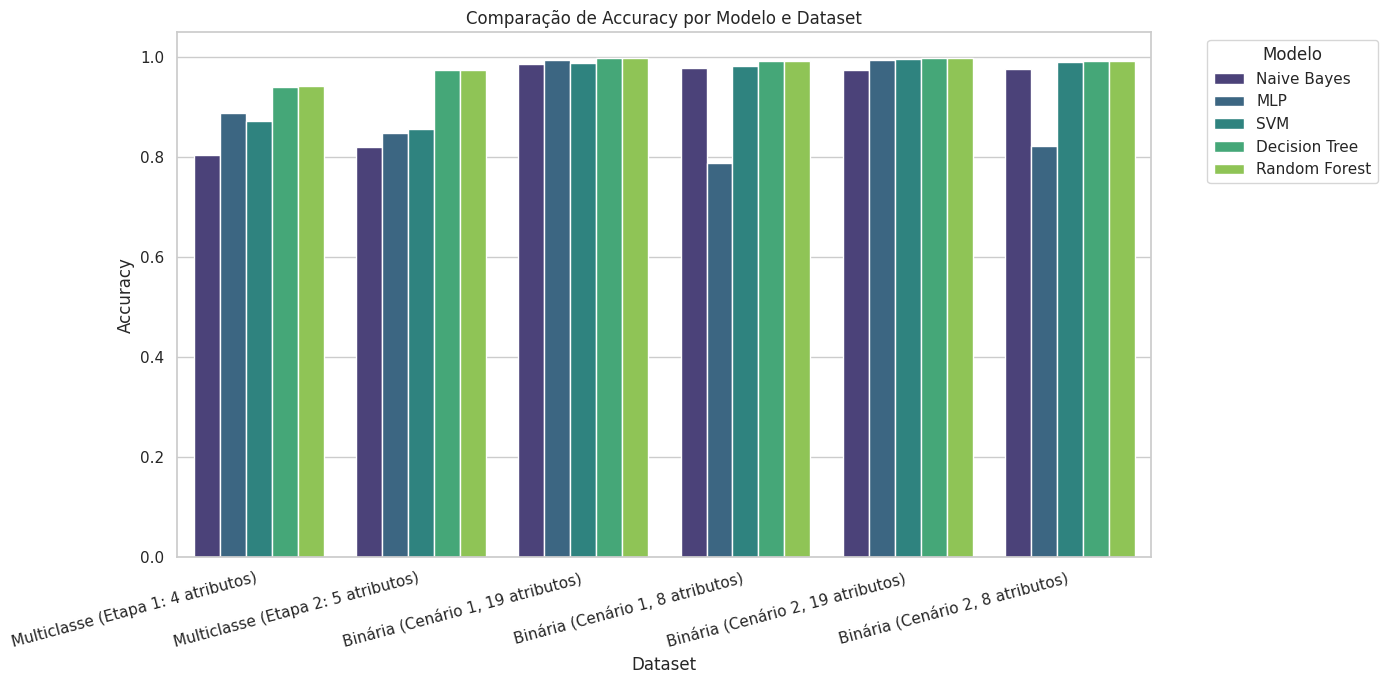

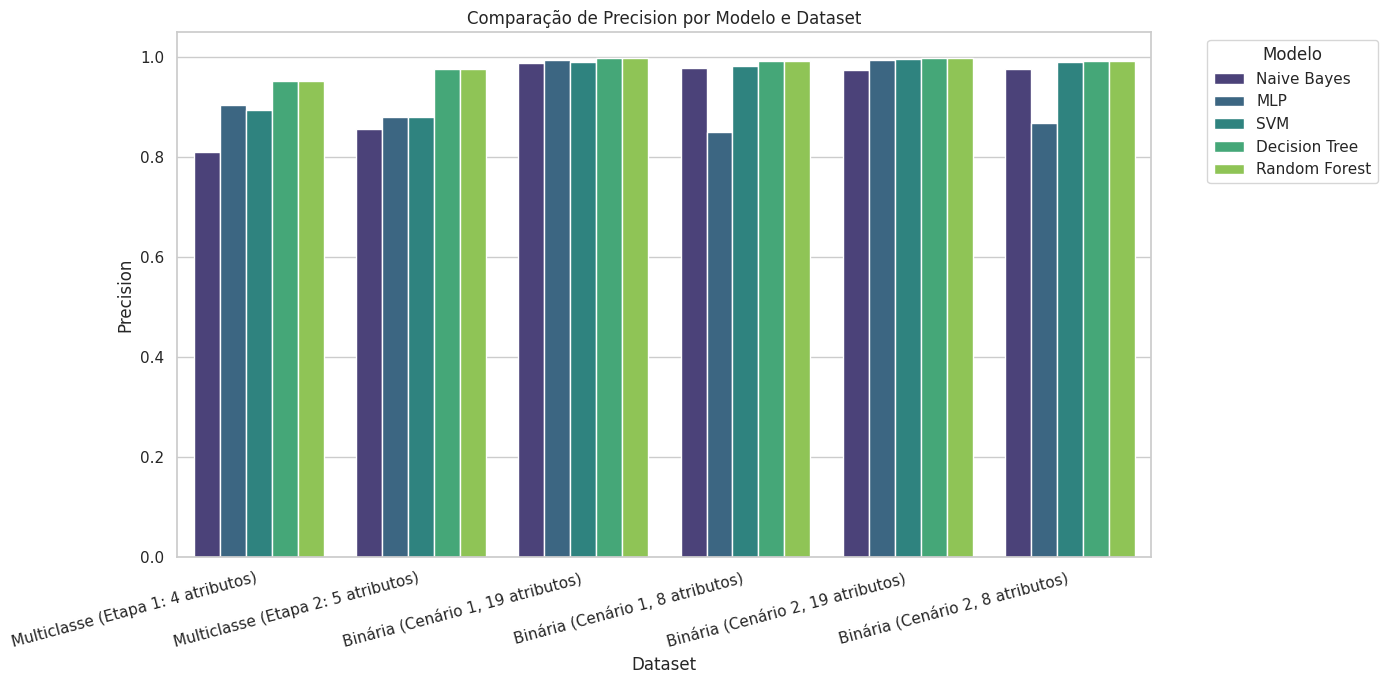

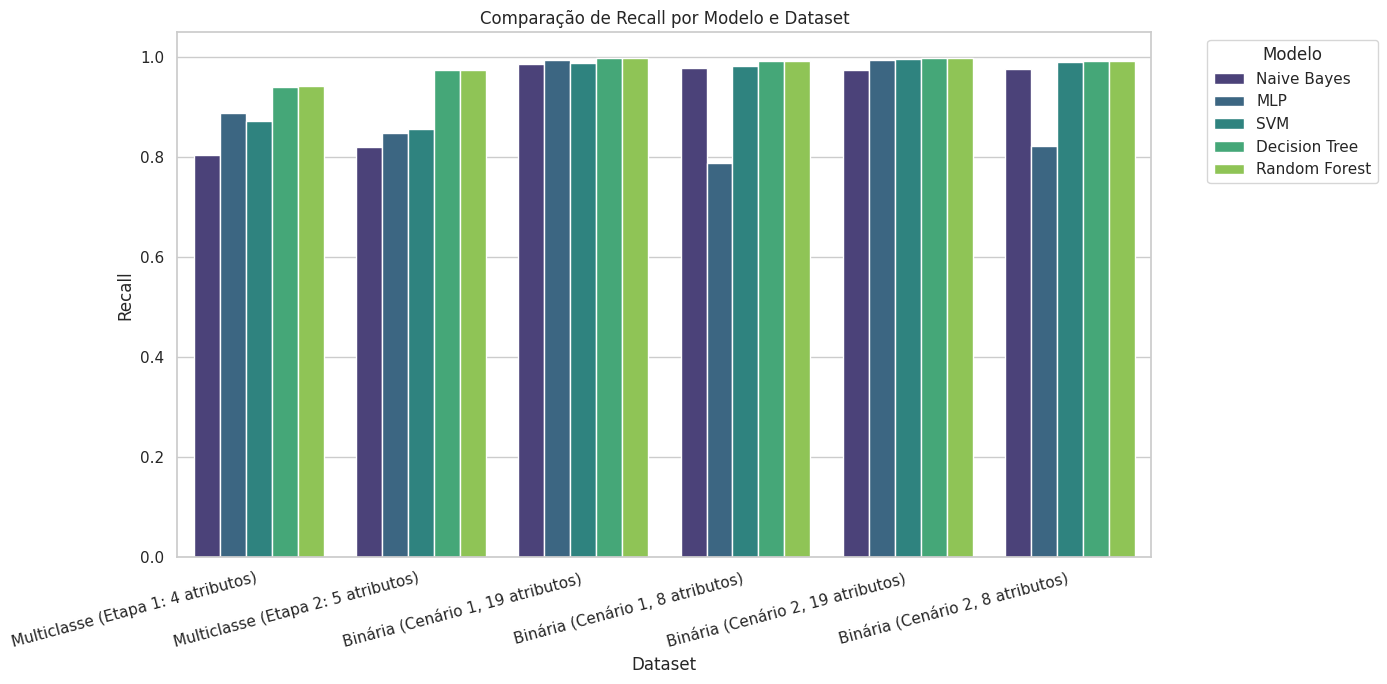

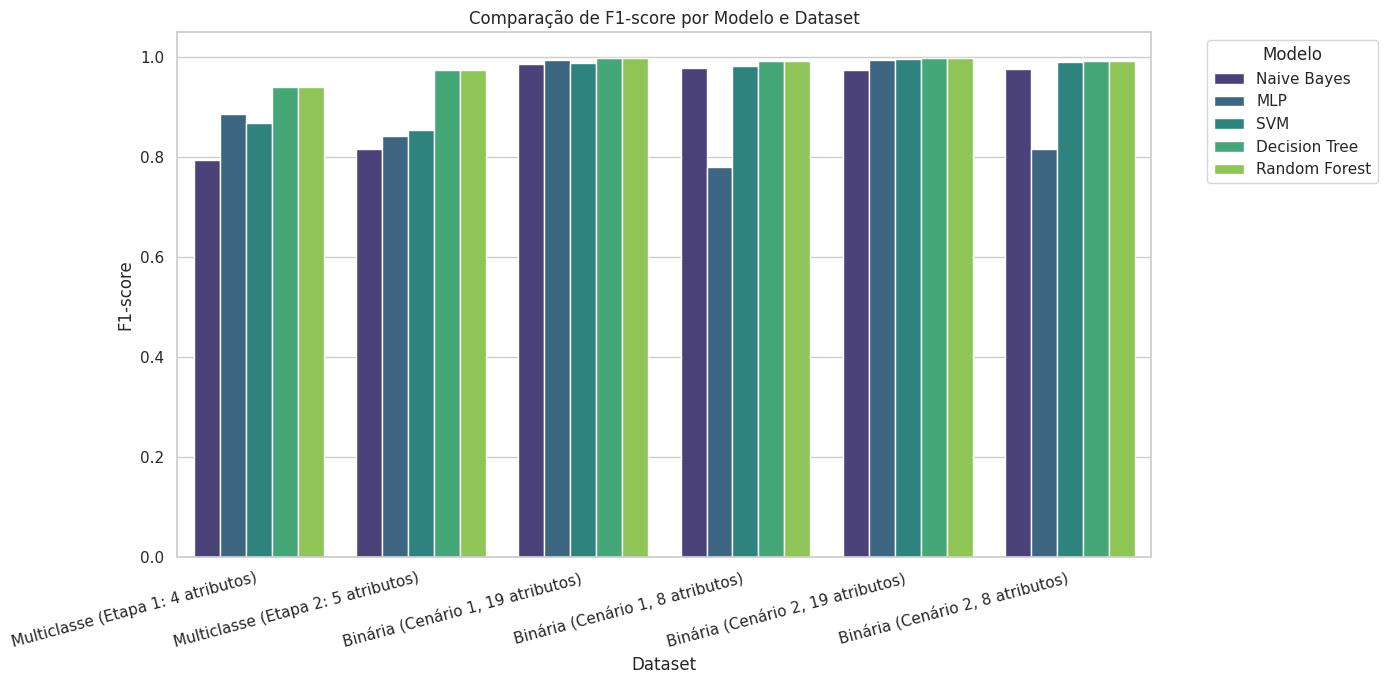

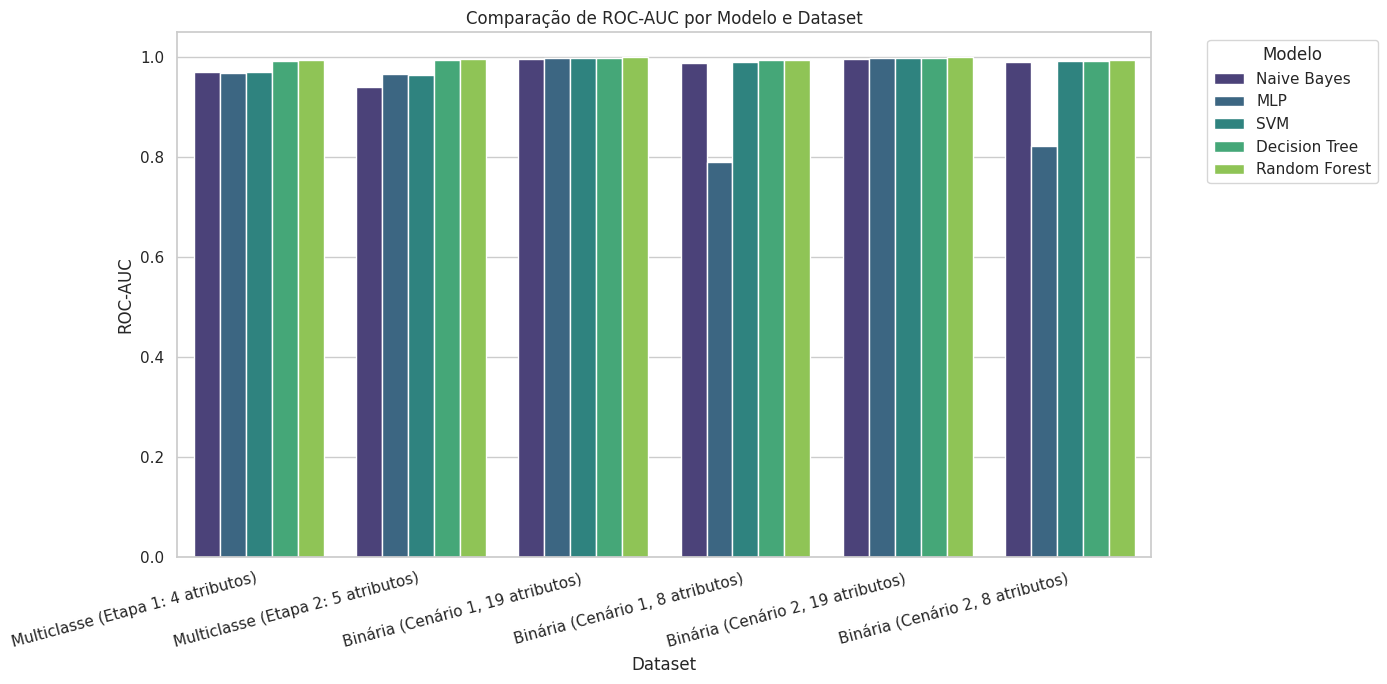

Gráficos de barras concluídos.

Gerando matrizes de confusão para modelos selecionados...
  Gerando Matriz de Confusão para Decision Tree no Dataset: Multiclasse (Etapa 1: 4 atributos)


<Figure size 800x600 with 0 Axes>

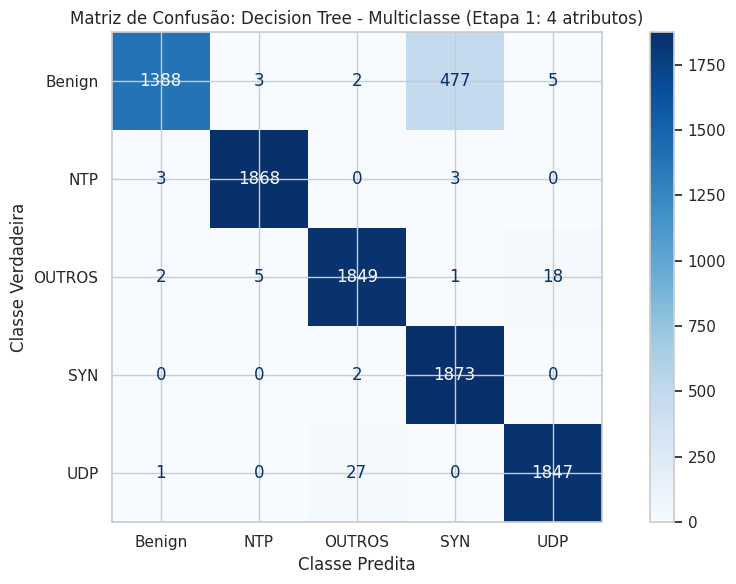

  Gerando Matriz de Confusão para Random Forest no Dataset: Multiclasse (Etapa 1: 4 atributos)


<Figure size 800x600 with 0 Axes>

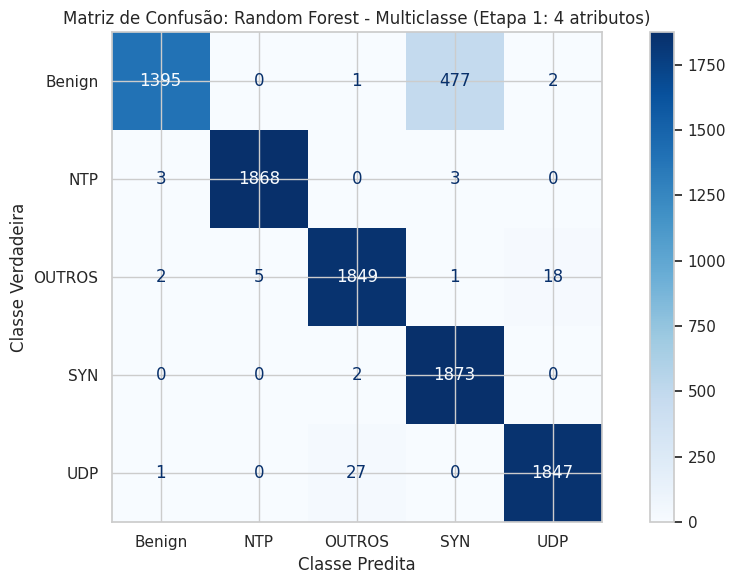

  Gerando Matriz de Confusão para Decision Tree no Dataset: Multiclasse (Etapa 2: 5 atributos)


<Figure size 800x600 with 0 Axes>

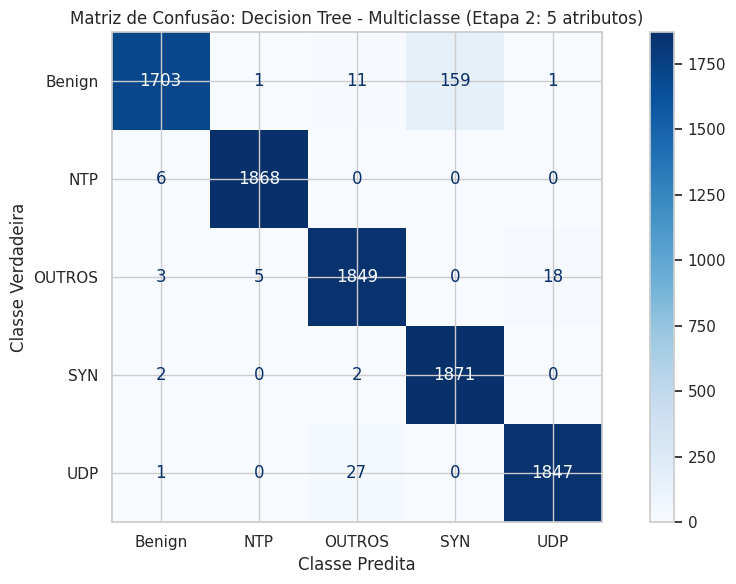

  Gerando Matriz de Confusão para Random Forest no Dataset: Multiclasse (Etapa 2: 5 atributos)


<Figure size 800x600 with 0 Axes>

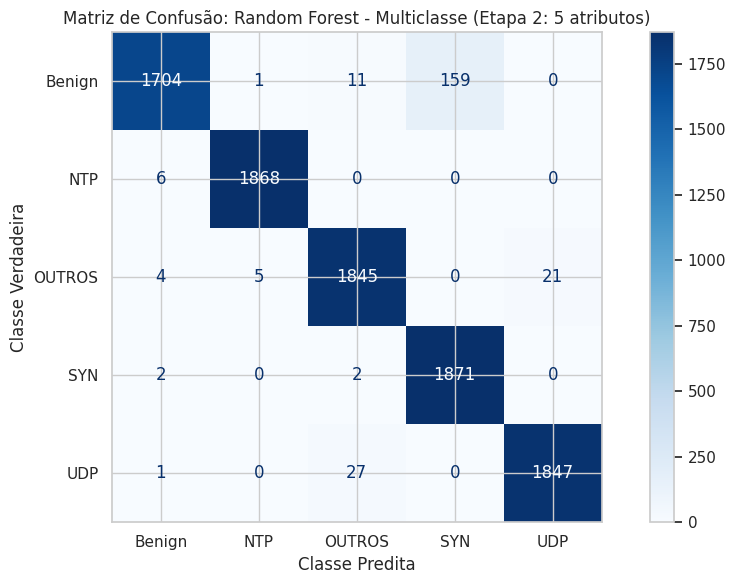

  Gerando Matriz de Confusão para Decision Tree no Dataset: Binária (Cenário 1, 19 atributos)


<Figure size 800x600 with 0 Axes>

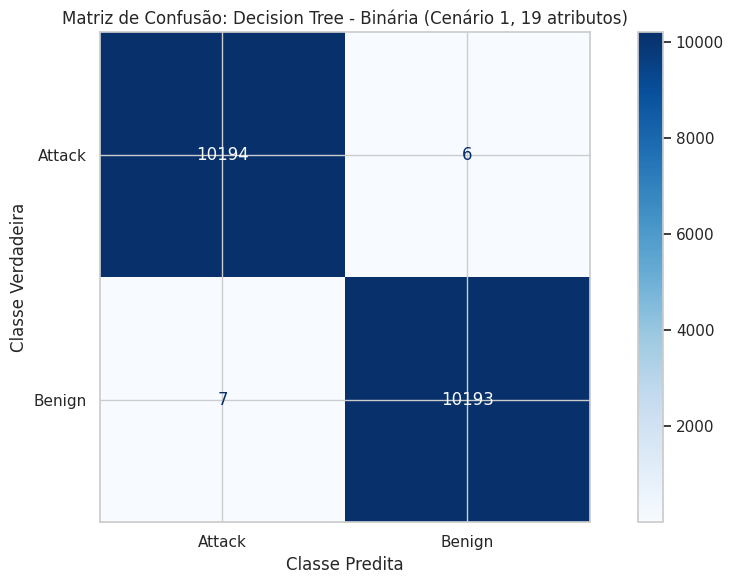

  Gerando Matriz de Confusão para Random Forest no Dataset: Binária (Cenário 1, 19 atributos)


<Figure size 800x600 with 0 Axes>

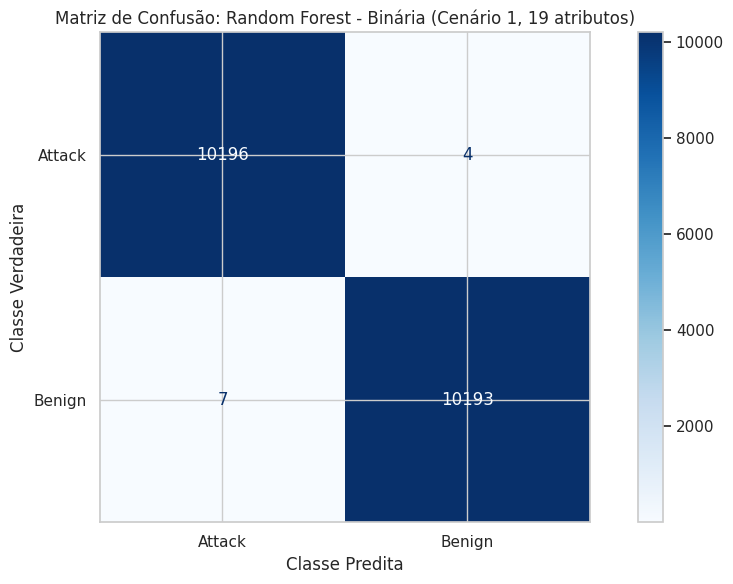

  Gerando Matriz de Confusão para Decision Tree no Dataset: Binária (Cenário 1, 8 atributos)


<Figure size 800x600 with 0 Axes>

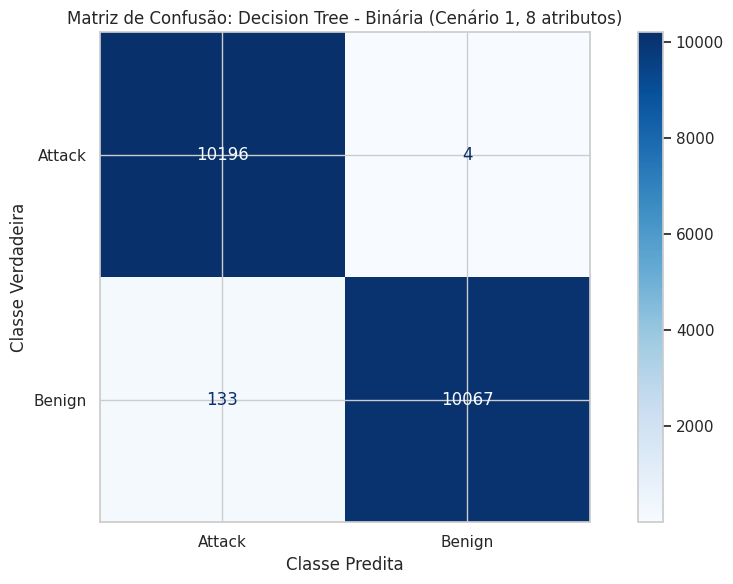

  Gerando Matriz de Confusão para Random Forest no Dataset: Binária (Cenário 1, 8 atributos)


<Figure size 800x600 with 0 Axes>

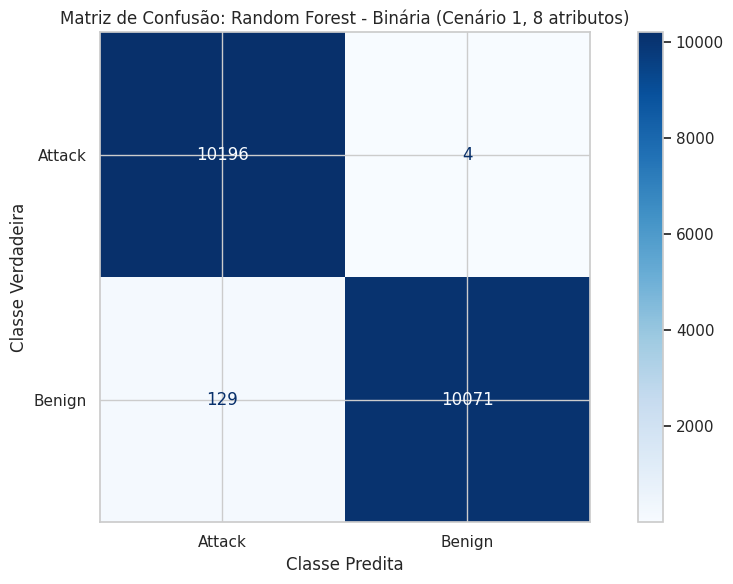

  Gerando Matriz de Confusão para Decision Tree no Dataset: Binária (Cenário 2, 19 atributos)


<Figure size 800x600 with 0 Axes>

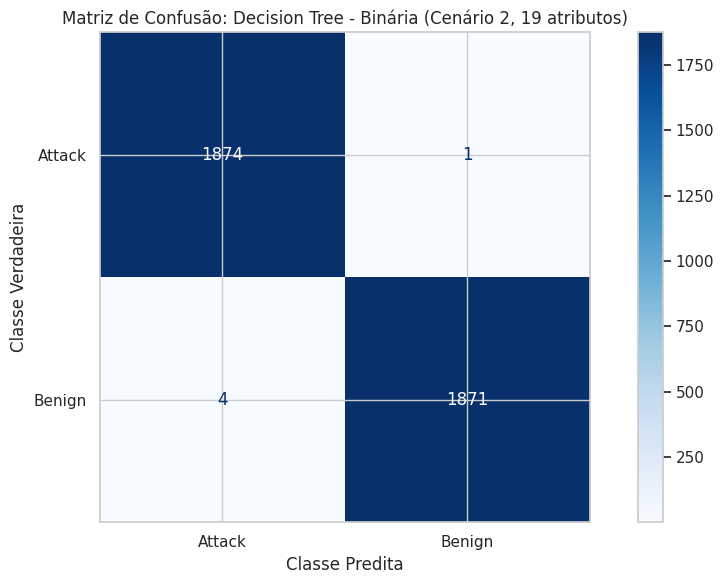

  Gerando Matriz de Confusão para Random Forest no Dataset: Binária (Cenário 2, 19 atributos)


<Figure size 800x600 with 0 Axes>

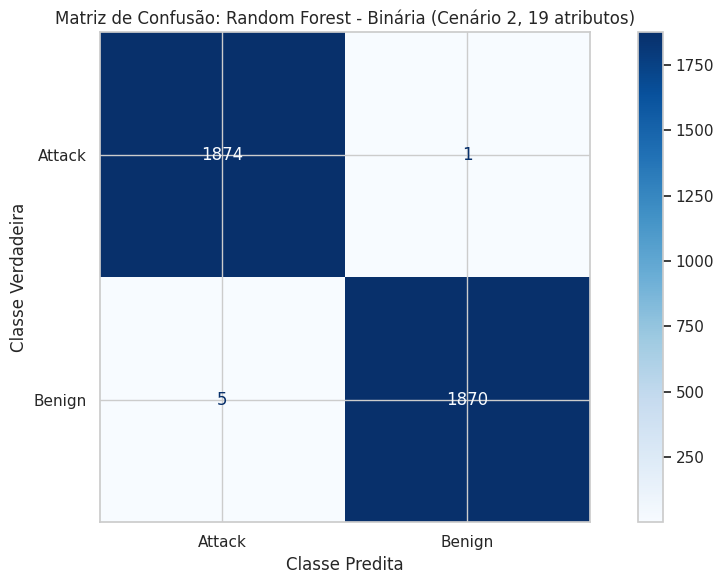

  Gerando Matriz de Confusão para Decision Tree no Dataset: Binária (Cenário 2, 8 atributos)


<Figure size 800x600 with 0 Axes>

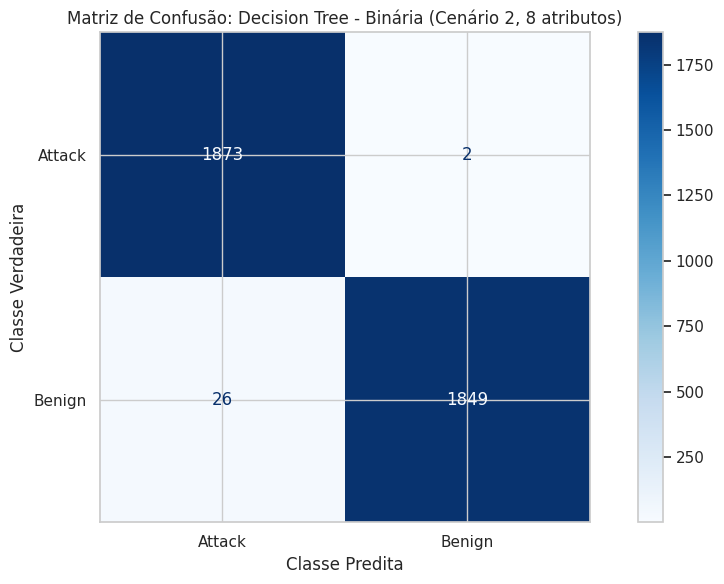

  Gerando Matriz de Confusão para Random Forest no Dataset: Binária (Cenário 2, 8 atributos)


<Figure size 800x600 with 0 Axes>

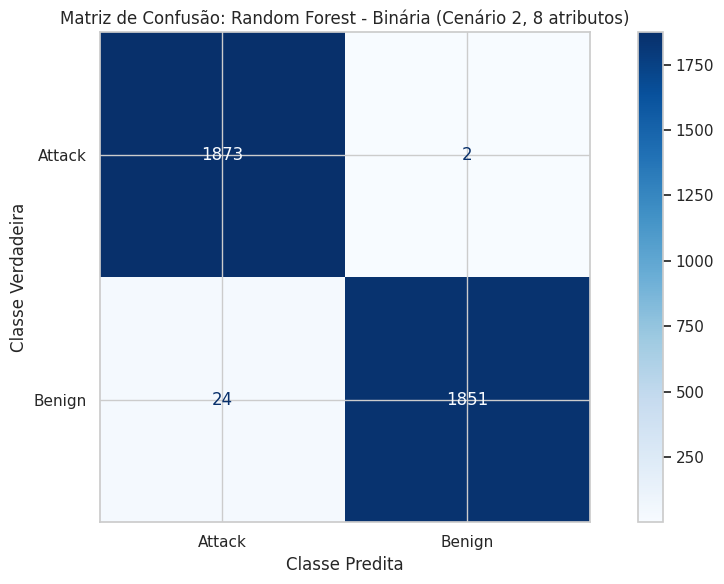

Matrizes de confusão concluídas.

Gerando curvas ROC para modelos selecionados...
  Gerando Curvas ROC para o Dataset: Multiclasse (Etapa 1: 4 atributos)


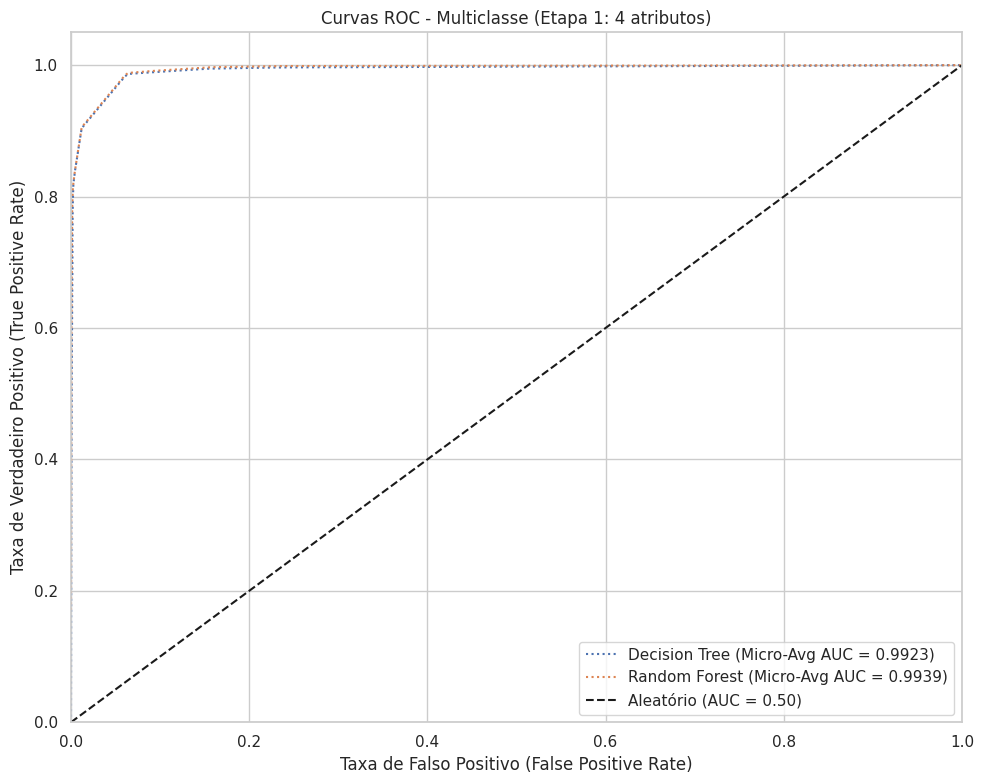

  Gerando Curvas ROC para o Dataset: Multiclasse (Etapa 2: 5 atributos)


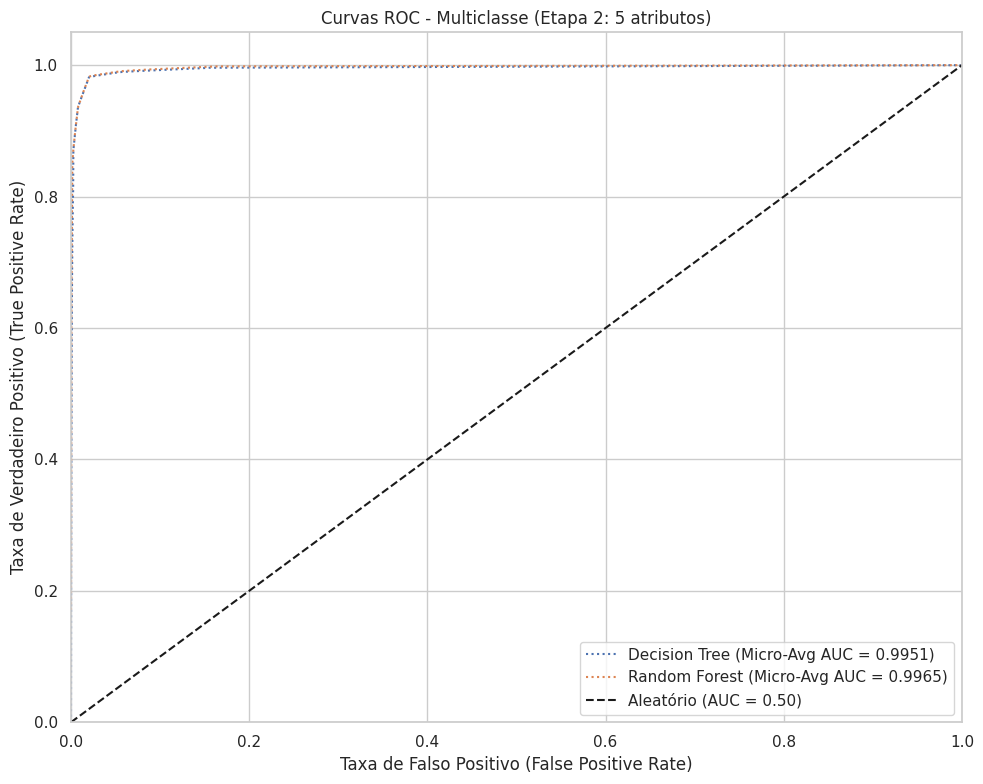

  Gerando Curvas ROC para o Dataset: Binária (Cenário 1, 19 atributos)


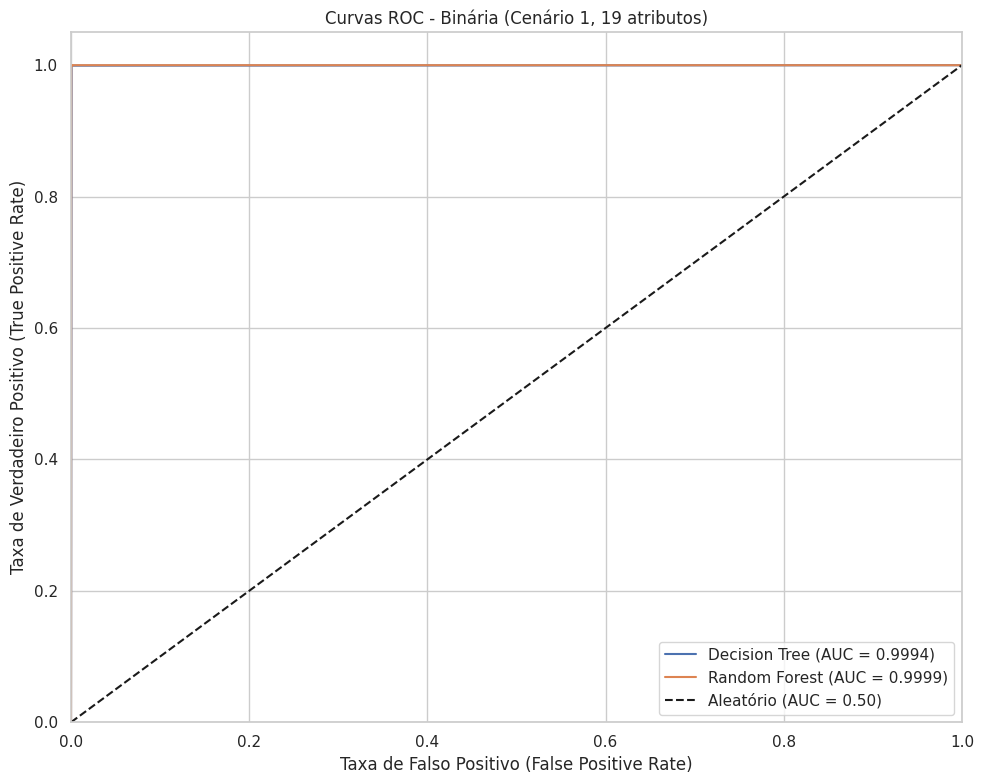

  Gerando Curvas ROC para o Dataset: Binária (Cenário 1, 8 atributos)


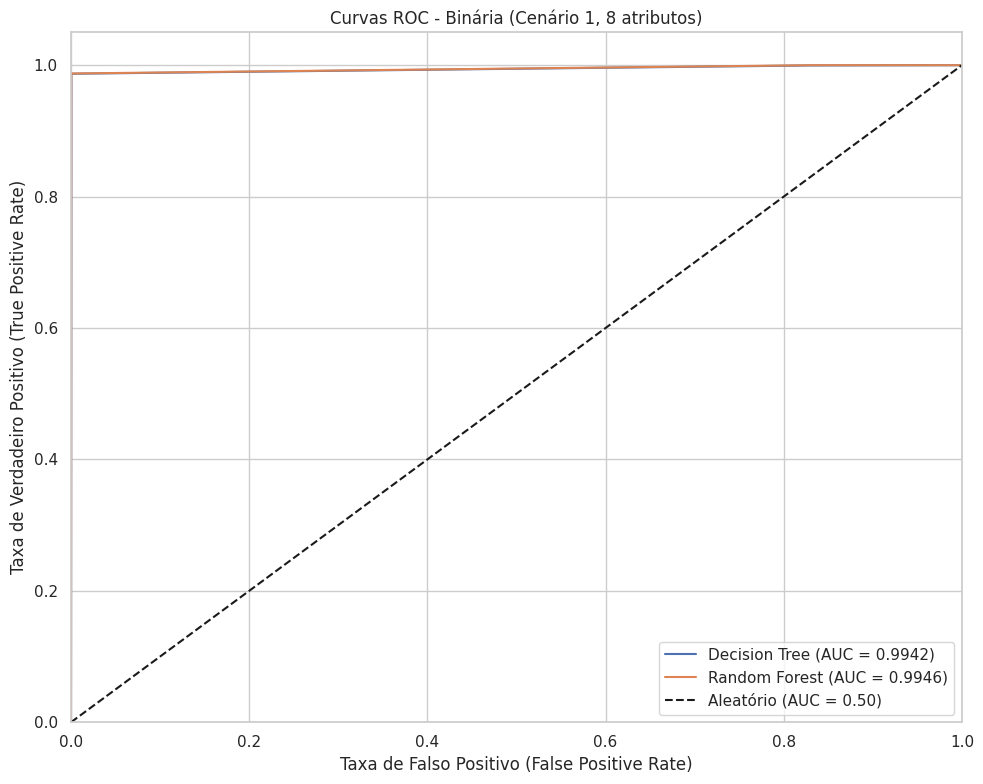

  Gerando Curvas ROC para o Dataset: Binária (Cenário 2, 19 atributos)


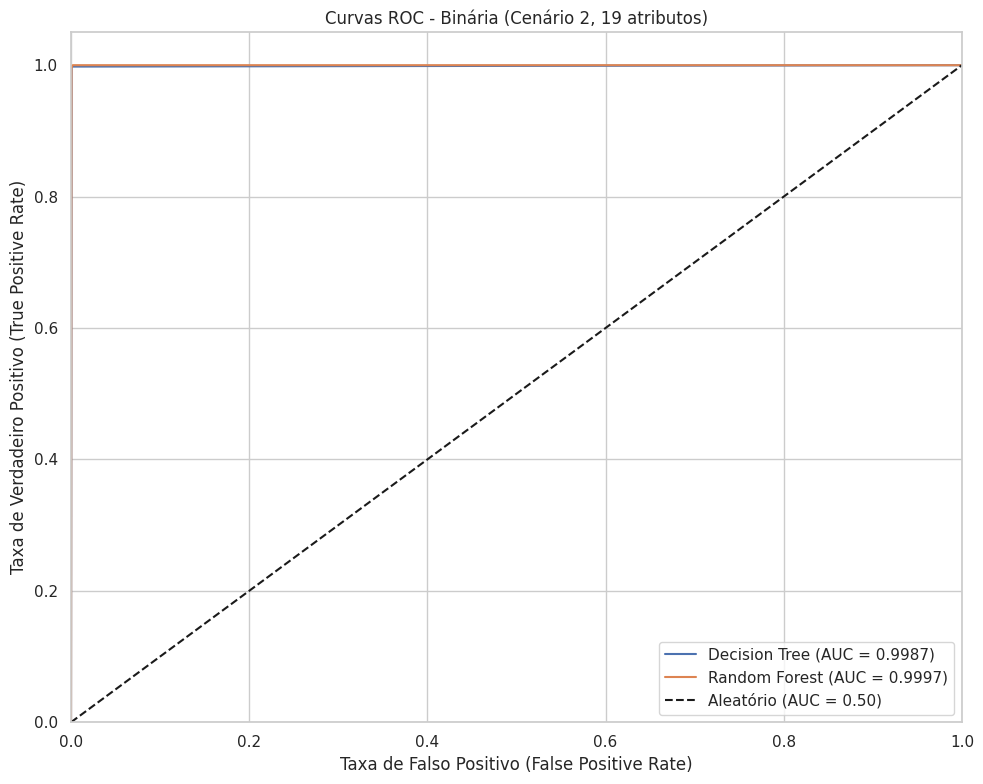

  Gerando Curvas ROC para o Dataset: Binária (Cenário 2, 8 atributos)


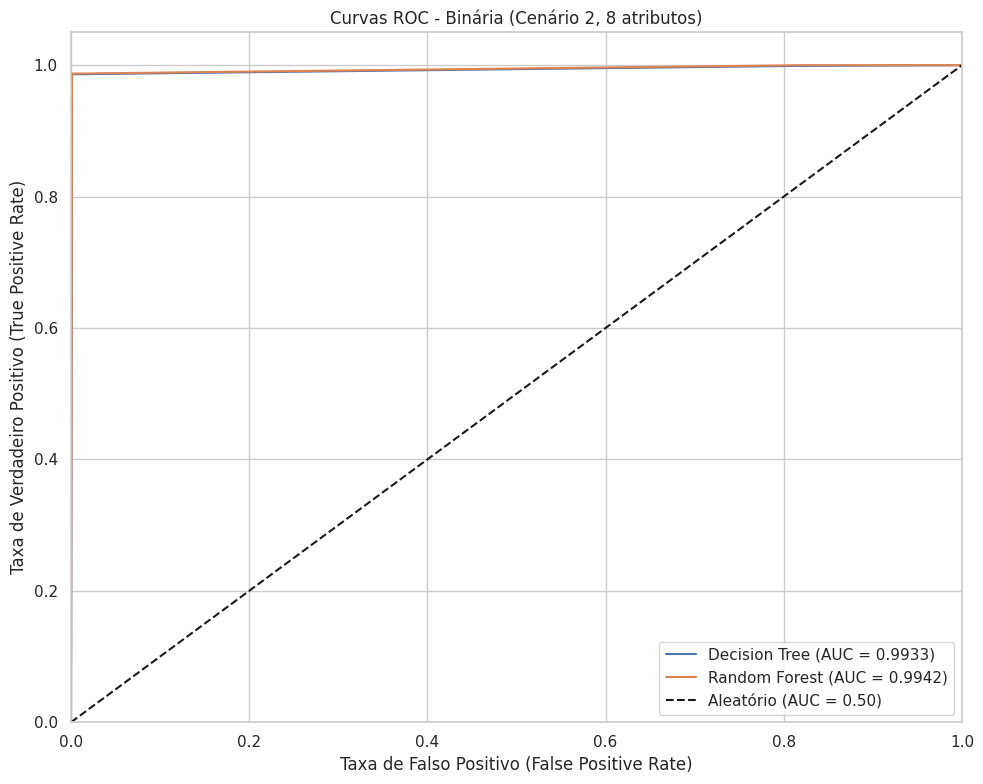

Curvas ROC concluídas.

Visualização de resultados finalizada.


In [112]:
# Continuar do código anterior. As importações e configurações iniciais já estão definidas.
# Os datasets balanceados e codificados já estão preparados.
# Importar bibliotecas de visualização (já importadas no bloco anterior, mas esta listagem de imports continua para ter mais clareza deste bloco de código)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Configurar estilo dos gráficos (já configurado no bloco anterior)
# sns.set_theme(style="whitegrid")
# plt.rcParams['figure.figsize'] = (10, 6)

# --- Listas e Dicionários para Armazenar Resultados ---
# Para métricas agregadas (para gráficos de barras)
# all_metrics_results = [] # Já inicializado no bloco anterior

# Para dados de matriz de confusão (y_true, y_pred)
# confusion_matrix_data = {} # Já inicializado no bloco anterior

# Para dados de curva ROC (y_true, y_proba)
# roc_curve_data = {} # Já inicializado no bloco anterior


# --- Avaliação dos Modelos (Multiclasse) - CORRIGIDO E ARMAZENANDO ---
print("\n--- Avaliando Modelos de Classificação Multiclasse (Armazenando Resultados) ---")

# Definir os datasets a serem avaliados (mesmo que antes)
multiclass_datasets_for_eval = [
    ("Multiclasse (Etapa 1: 4 atributos)", X_multiclass_balanced_17, y_multiclass_encoded_17, y_multiclass_ohe_17),
    ("Multiclasse (Etapa 2: 5 atributos)", X_multiclass_balanced_5, y_multiclass_encoded_5, y_multiclass_ohe_5)
]

# Definir os modelos com os hiperparâmetros da Tabela 3 do artigo (mesmo que antes)
models_multiclass_template = [
    ('Naive Bayes', GaussianNB()),
    ('MLP', MLPClassifier(solver='adam', learning_rate_init=0.01,
                          hidden_layer_sizes=(32, 16, 8, 4), activation='relu',
                          validation_fraction=0.33, n_iter_no_change=6,
                          max_iter=100, shuffle=True, random_state=random_state_split,
                          verbose=False)),
    ('SVM', None), # Placeholder
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', splitter='best',
                                             min_samples_split=2, min_samples_leaf=1,
                                             random_state=random_state_split)),
    ('Random Forest', RandomForestClassifier(criterion='gini', n_estimators=100,
                                             min_samples_split=2, min_samples_leaf=1,
                                             max_features='sqrt', random_state=random_state_split,
                                             n_jobs=-1))
]

# Loop sobre cada dataset preparado
for dataset_name, X, y_encoded, y_ohe in multiclass_datasets_for_eval:
    print(f"\n--- Avaliando no Dataset: {dataset_name} (Armazenando) ---")

    # Determinar o parâmetro C para o SVM com base no nome do dataset (simplificado)
    svm_c_param = 75 # Parâmetro C para multiclasse (Tabela 8)

    # Instanciar o SVM com o parâmetro C correto para este dataset
    svm_model = SVC(C=svm_c_param, kernel='poly', gamma='auto', tol=0.001,
                    decision_function_shape='ovr', random_state=random_state_split,
                    probability=True)

    # Criar a lista de modelos para este dataset, substituindo o placeholder do SVM
    models_multiclass = [(name, model) if name != 'SVM' else ('SVM', svm_model) for name, model in models_multiclass_template]


    # Dividir o dataset em treino e teste (66% treino, 34% teste)
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )

    # Split para y_ohe (MLP)
    _, _, y_train_ohe, y_test_ohe = train_test_split(
         y_ohe, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )

    print(f"  Shape dos dados de treino: {X_train.shape}, Shape dos dados de teste: {X_test.shape}")

    # Loop sobre cada modelo
    for model_name, model in models_multiclass:
        print(f"  Avaliando Modelo: {model_name}...")
        start_time = time.time()

        # Treinar o modelo
        if model_name == 'MLP':
            model.fit(X_train, y_train_ohe)
        else:
            model.fit(X_train, y_train_encoded)

        train_time = time.time() - start_time

        # Fazer previsões
        start_time = time.time()
        y_pred_encoded = model.predict(X_test)
        predict_time = time.time() - start_time

        # Calcular métricas
        accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
        precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

        # Armazenar métricas agregadas
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Accuracy',
            'Value': accuracy
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Precision',
            'Value': precision
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Recall',
            'Value': recall
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'F1-score',
            'Value': f1
        })

        # Armazenar dados para Matriz de Confusão
        confusion_matrix_data[(dataset_name, model_name)] = (y_test_encoded, y_pred_encoded)

        # Calcular e Armazenar dados para ROC-AUC
        roc_auc_value = None # Inicializa como None
        roc_auc_display = 'N/A' # String para exibição

        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)
                # ROC-AUC para multiclasse (One-vs-Rest)
                roc_auc_value = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted')
                roc_auc_display = f"{roc_auc_value:.4f}" # Formata se o cálculo for bem sucedido

                # Armazenar dados para Curva ROC
                roc_curve_data[(dataset_name, model_name)] = (y_test_encoded, y_pred_proba)

            # else: roc_auc_value permanece None, roc_auc_display permanece 'N/A'
        except Exception as e:
             print(f"    {model_name}: ERRO ao calcular/armazenar ROC-AUC: {e}")
             # roc_auc_value permanece None, roc_auc_display permanece 'N/A'

        # Armazenar ROC-AUC agregado APENAS se o cálculo foi bem sucedido
        if roc_auc_value is not None:
             all_metrics_results.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'Metric': 'ROC-AUC',
                'Value': roc_auc_value
            })

        # CORRIGIDO: Usar a string de exibição preparada
        print(f"    -> Acc: {accuracy:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc_display}")

print("\nAvaliação de modelos multiclasse concluída e resultados armazenados.")

# --- Avaliação dos Modelos (Binária) - CORRIGIDO E ARMAZENANDO ---
print("\n--- Avaliando Modelos de Classificação Binária (Armazenando Resultados) ---")

# Definir os datasets a serem avaliados (mesmo que antes)
binary_datasets_for_eval = [
    ("Binária (Cenário 1, 19 atributos)", X_binary_balanced_scenario1_20, y_binary_encoded_scenario1),
    ("Binária (Cenário 1, 8 atributos)", X_binary_balanced_scenario1_8, y_binary_encoded_scenario1),
    ("Binária (Cenário 2, 19 atributos)", X_binary_balanced_scenario2_20, y_binary_encoded_scenario2),
    ("Binária (Cenário 2, 8 atributos)", X_binary_balanced_scenario2_8, y_binary_encoded_scenario2)
]

# Definir os modelos com os hiperparâmetros da Tabela 3 do artigo (mesmo que antes)
models_binary_template = [
    ('Naive Bayes', GaussianNB()),
    ('MLP', MLPClassifier(solver='adam', learning_rate_init=0.01,
                          hidden_layer_sizes=(20, 10, 2), activation='relu',
                          validation_fraction=0.33, n_iter_no_change=6,
                          max_iter=100, shuffle=True, random_state=random_state_split,
                          verbose=False)),
    ('SVM', None), # Placeholder
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', splitter='best',
                                             min_samples_split=2, min_samples_leaf=1,
                                             random_state=random_state_split)),
    ('Random Forest', RandomForestClassifier(criterion='gini', n_estimators=100,
                                             min_samples_split=2, min_samples_leaf=1,
                                             max_features='sqrt', random_state=random_state_split,
                                             n_jobs=-1))
]

# Loop sobre cada dataset preparado
for dataset_name, X, y_encoded in binary_datasets_for_eval:
    print(f"\n--- Avaliando no Dataset: {dataset_name} (Armazenando) ---")

    # Determinar o parâmetro C para o SVM com base no cenário
    svm_c_param = 1 # Default para Cenário 1 (30k/30k)
    if "Cenário 2" in dataset_name:
        svm_c_param = 300 # Parâmetro C para Cenário 2 (5514/5514)

    # Instanciar o SVM com o parâmetro C correto para este dataset
    svm_model = SVC(C=svm_c_param, kernel='poly', gamma='auto', tol=0.001,
                    decision_function_shape='ovr', random_state=random_state_split,
                    probability=True)

    # Criar a lista de modelos para este dataset, substituindo o placeholder do SVM
    models_binary = [(name, model) if name != 'SVM' else ('SVM', svm_model) for name, model in models_binary_template]


    # Dividir o dataset em treino e teste (66% treino, 34% teste)
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X, y_encoded, test_size=test_size_ratio, random_state=random_state_split, stratify=y_encoded
    )

    print(f"  Shape dos dados de treino: {X_train.shape}, Shape dos dados de teste: {X_test.shape}")

    # Loop sobre cada modelo
    for model_name, model in models_binary:
        print(f"  Avaliando Modelo: {model_name}...")
        start_time = time.time()

        # Treinar o modelo
        model.fit(X_train, y_train_encoded)

        train_time = time.time() - start_time

        # Fazer previsões
        start_time = time.time()
        y_pred_encoded = model.predict(X_test)
        predict_time = time.time() - start_time

        # Calcular métricas
        accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
        precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

        # Armazenar métricas agregadas
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Accuracy',
            'Value': accuracy
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Precision',
            'Value': precision
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'Recall',
            'Value': recall
        })
        all_metrics_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Metric': 'F1-score',
            'Value': f1
        })

        # Armazenar dados para Matriz de Confusão
        confusion_matrix_data[(dataset_name, model_name)] = (y_test_encoded, y_pred_encoded)

        # Calcular e Armazenar dados para ROC-AUC
        roc_auc_value = None # Inicializa como None
        roc_auc_display = 'N/A' # String para exibição

        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (1)
                roc_auc_value = roc_auc_score(y_test_encoded, y_pred_proba) # ROC-AUC binário
                roc_auc_display = f"{roc_auc_value:.4f}" # Formata se o cálculo for bem sucedido

                 # Armazenar dados para Curva ROC (para binária, apenas y_true e y_proba da classe positiva)
                roc_curve_data[(dataset_name, model_name)] = (y_test_encoded, y_pred_proba)

            # else: roc_auc_value permanece None, roc_auc_display permanece 'N/A'
        except Exception as e:
             print(f"    {model_name}: ERRO ao calcular/armazenar ROC-AUC: {e}")
             # roc_auc_value permanece None, roc_auc_display permanece 'N/A'

        # Armazenar ROC-AUC agregado APENAS se o cálculo foi bem sucedido
        if roc_auc_value is not None:
             all_metrics_results.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'Metric': 'ROC-AUC',
                'Value': roc_auc_value
            })

        # CORRIGIDO: Usar a string de exibição preparada
        print(f"    -> Acc: {accuracy:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc_display}")

print("\nAvaliação de modelos binários concluída e resultados armazenados.")

# Converter a lista de métricas para um DataFrame pandas para facilitar a plotagem
metrics_df = pd.DataFrame(all_metrics_results)

# --- Gerando Gráficos de Resultados ---
print("\n--- Gerando Gráficos de Resultados ---")

# --- Gráficos de Barras para Métricas Agregadas ---
print("\nGerando gráficos de barras para métricas agregadas...")

# Definir as métricas a serem plotadas
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

# Iterar sobre cada métrica e criar um gráfico de barras
for metric in metrics_to_plot:
    plt.figure(figsize=(14, 7))
    # Filtrar o DataFrame para a métrica atual
    metric_data = metrics_df[metrics_df['Metric'] == metric]

    # Usar seaborn para criar o gráfico de barras, separando por Dataset e Modelo
    # 'hue' separa as barras por modelo dentro de cada 'x' (Dataset)
    sns.barplot(data=metric_data, x='Dataset', y='Value', hue='Model', palette='viridis')

    plt.title(f'Comparação de {metric} por Modelo e Dataset')
    plt.ylabel(metric)
    plt.xlabel('Dataset')
    plt.ylim(0, 1.05) # Limitar o eixo Y entre 0 e 1.05 para métricas de 0 a 1
    plt.xticks(rotation=15, ha='right') # Rotacionar labels do eixo X se necessário
    plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover legenda para fora do plot
    plt.tight_layout() # Ajustar layout para evitar sobreposição
    plt.show()

print("Gráficos de barras concluídos.")

# --- Matrizes de Confusão ---
print("\nGerando matrizes de confusão para modelos selecionados...")

# Selecionar modelos para plotar a matriz de confusão (ex: DT e RF)
models_to_plot_cm = ['Decision Tree', 'Random Forest']

# Iterar sobre os dados armazenados
for (dataset_name, model_name), (y_true, y_pred) in confusion_matrix_data.items():
    if model_name in models_to_plot_cm:
        print(f"  Gerando Matriz de Confusão para {model_name} no Dataset: {dataset_name}")

        # Calcular a matriz de confusão
        cm = confusion_matrix(y_true, y_pred)

        # Obter os nomes das classes corretos (binária ou multiclasse)
        # Verificar se o dataset_name contém "Binária"
        is_binary = "Binária" in dataset_name
        class_labels = le_binary.classes_ if is_binary else le.classes_


        # Criar a visualização da matriz de confusão
        plt.figure(figsize=(8, 6))
        # Usar ConfusionMatrixDisplay para uma visualização mais fácil
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
        disp.plot(cmap='Blues', values_format='d') # values_format='d' para mostrar inteiros

        plt.title(f'Matriz de Confusão: {model_name} - {dataset_name}')
        plt.xlabel('Classe Predita')
        plt.ylabel('Classe Verdadeira')
        plt.tight_layout()
        plt.show()

print("Matrizes de confusão concluídas.")

# --- Curvas ROC ---
print("\nGerando curvas ROC para modelos selecionados...")

# Selecionar modelos para plotar a curva ROC (ex: DT e RF)
models_to_plot_roc = ['Decision Tree', 'Random Forest'] # NB, MLP, SVM também suportam predict_proba

# Separar dados ROC por dataset para plotar várias curvas no mesmo gráfico por dataset
roc_data_by_dataset = {}
for (dataset_name, model_name), (y_true, y_proba) in roc_curve_data.items():
    # Adicionar apenas modelos que suportam predict_proba e estão na lista de plotagem
    if model_name in models_to_plot_roc:
        if dataset_name not in roc_data_by_dataset:
            roc_data_by_dataset[dataset_name] = []
        roc_data_by_dataset[dataset_name].append((model_name, y_true, y_proba))

# Iterar sobre cada dataset para plotar as curvas ROC
for dataset_name, data_list in roc_data_by_dataset.items():
    plt.figure(figsize=(10, 8))
    print(f"  Gerando Curvas ROC para o Dataset: {dataset_name}")

    # Obter os nomes das classes corretos (binária ou multiclasse)
    is_binary = "Binária" in dataset_name
    class_labels = le_binary.classes_ if is_binary else le.classes_

    # Plotar a curva ROC para cada modelo neste dataset
    for model_name, y_true, y_proba in data_list:
         # Já filtramos por models_to_plot_roc ao popular roc_data_by_dataset

        if is_binary:
            # Curva ROC Binária
            # y_proba já é a probabilidade da classe positiva (1)
            fpr, tpr, _ = roc_curve(y_true, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
        else:
            # Curva ROC Multiclasse (OvR)
            # y_proba é um array de probabilidades [n_samples, n_classes]
            n_classes = len(class_labels)
            # Compute ROC curve and ROC area for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                # Need to convert y_true to binary (1 for class i, 0 otherwise)
                y_true_binary = (y_true == i).astype(int)
                # Use the probability column corresponding to class i
                y_proba_class_i = y_proba[:, i]
                fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_proba_class_i)
                roc_auc[i] = auc(fpr[i], tpr[i])

            # Plot the micro-average ROC curve
            # Compute micro-average ROC curve and ROC area
            # Concatenate all false positive rates
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            # Interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            # Average it and compute AUC
            mean_tpr /= n_classes
            fpr_micro = all_fpr
            tpr_micro = mean_tpr
            roc_auc_micro = auc(fpr_micro, tpr_micro)

            plt.plot(fpr_micro, tpr_micro,
                     label=f'{model_name} (Micro-Avg AUC = {roc_auc_micro:.4f})',
                     linestyle=':') # Use a different linestyle for micro-average

    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)') # Linha de base aleatória
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
    plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
    plt.title(f'Curvas ROC - {dataset_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("Curvas ROC concluídas.")
print("\nVisualização de resultados finalizada.")

<br>
<br>
&nbsp;&nbsp;&nbsp;<b><center>** Chegou ao final **</center>
</p><br>

In [113]:
cronometrarCodigo("** Fim do programa")


** Fim do programa: 07/06/2025 21:19:44



<br>
&nbsp;&nbsp;&nbsp;<b><center>** FIM **</center>
</p><br>